In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [65]:
N = 150 #number of particles
lattice_size = 20
grid_constant = 0.8 #size of unit cell
box_size = 20.11
rc = 2**(1/6)
ecut = 4*(1/(rc**12) - 1/(rc**6))
dt = 0.001
duration = 1000
pivot = 1
time_steps = int(duration / dt)
#nt((duration-pivot)/dt) + int(pivot/dt_)

Kn = np.zeros(shape = (time_steps,1))
Entot = np.zeros(shape = (time_steps,1))
Un = np.zeros(shape = (time_steps,1))
r = np.zeros(shape = (time_steps,N,2)) # column1 = time , column2 = particle number , column3 = coordinates
#r_high_res = np.zeros(shape = (time_steps,N,2))
rabs = np.zeros(shape = (time_steps,N,2))
#rabs_high = np.zeros(shape = (time_steps,N,2))
#v = np.zeros(shape = (time_steps,N,2))
xm = np.zeros(shape = (N,2)) 
xmabs = np.zeros(shape = (N,2))
#xmabs_high = np.zeros(shape = (N,2))
force = np.zeros(shape = (N,2)) # 2D forces of N particles
#force_high = np.zeros(shape = (time_steps,N,2)) # 2D forces of N particles



In [82]:
def setup():
    force = np.zeros(shape = (time_steps,N,2)) # 2D forces of N particles
    counter = 0
    temp = 10
    vx = np.random.uniform(-2,2,N)
    vy = np.random.uniform(-2,2,N)

   
    
    for i in range(int(lattice_size/grid_constant)):
        for j in range(int(lattice_size/grid_constant)):
            if counter >= N:
                break
            r[0,counter,0] = j*grid_constant + grid_constant/2
            r[0,counter,1] = 10 + i*grid_constant + grid_constant/2
            rabs[0,counter,0] = j*grid_constant + grid_constant/2
            rabs[0,counter,1] = 10 + i*grid_constant + grid_constant/2
            v[0,counter,0] = vx[counter]
            v[0,counter,1] = vy[counter]
            counter += 1
    meanvx = np.mean(v[0,:,0])
    meanvy = np.mean(v[0,:,1])
    meanv2 = np.mean(v[0,:,0]**2 + v[0,:,1]**2)
    fs = np.sqrt(3*temp/meanv2)
    fs = 1
    v[0,:,0] = (v[0,:,0] - meanvx) * fs
    v[0,:,1] = (v[0,:,1] - meanvy) * fs

    xm[:,0] = r[0,:,0] - v[0,:,0]*dt # initilize xm poistions
    xm[:,1] = r[0,:,1] - v[0,:,1]*dt
    xmabs[:,0] = xm[:,0]
    xmabs[:,1] = xm[:,1]
    
    



[0.23926771 0.18799606 0.27344881 0.22217716 0.30762991 0.23926771
 0.27344881 0.27344881 0.27344881 0.27344881]


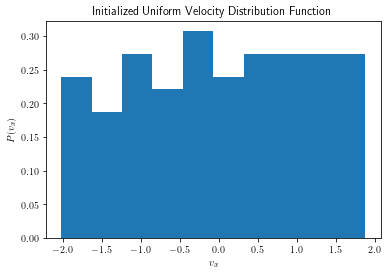

In [66]:
setup()
#print(v[0,:,0])
count, bins, ignored = plt.hist(v[0,:,0],10, density=True)

print(count)
#plt.plot(bins, linewidth=2, color='r')
plt.xlabel("$v_x$")
plt.ylabel("$P(v_x)$")
plt.title("Initialized Uniform Velocity Distribution Function")
plt.show()


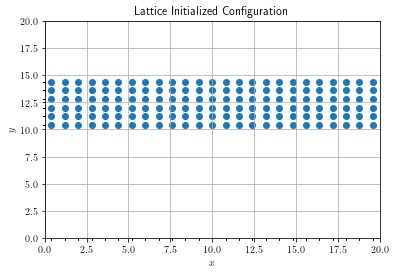

In [67]:
fig = plt.figure()
plt.rc('text', usetex=True)
ax = plt.axes(xlim=(0, 20), ylim=(0,20))
ax.scatter(rabs[0,:,0],rabs[0,:,1])
ax.set_yticks(r[0,:,1], minor = True)
ax.set_xticks(r[0,:,0], minor = True)
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True)
#plt.axes('eqaul')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.title("Lattice Initialized Configuration")
plt.show()

In [6]:
force_calculation(0)

#r[0,0,0]
#r[0,10,1] - r[0,135,1]
#box_size/2

NameError: name 'force_calculation' is not defined

In [68]:
def force_calculation(t):
    un = 0
    force[:,0] = 0
    force[:,1] = 0
    for i in range(N):
        for j in range(i+1,N):
            absdistx = r[t,j,0] - r[t,i,0] #absolute distance in x-direction
            absdisty = r[t,j,1] - r[t,i,1] #absolute distance in y-direction
            imgdistx = absdistx
            imgdisty = absdisty
            if absdistx > box_size/2:
                imgdistx = absdistx - box_size
                
            if absdistx < -box_size/2:
                imgdistx = absdistx + box_size

            if absdisty > box_size/2:
                
                imgdisty = absdisty - box_size
                
            if absdisty < -box_size/2:
                imgdisty = absdisty + box_size
            
            
            r2 = imgdistx**2 + imgdisty**2
               
            if r2 <= rc**2:
                r2i = 1 / r2
                r6i = r2i**3
                ff = -48*r2i*r6i*(r6i - 0.5)
                force[i,0] += ff * imgdistx 
                force[i,1] += ff * imgdisty
                force[j,0] -= ff * imgdistx
                force[j,1] -= ff * imgdisty
                un = un + 4*r6i*(r6i - 1) - ecut
    return un
    
    


In [69]:
def integrate_motion():
    
    xx = np.zeros(shape = (N,2))
    xx_heigh = np.zeros(shape = (N,2))

    xxabs = np.zeros(shape = (N,2))
    xxabs_high = np.zeros(shape = (N,2))
    vi = np.zeros(shape = (N,2))
    sumvx = 0
    sumvy = 0
    sumv2 = 0
    for t in range(time_steps-1):
        if t%1000 == 0:
            print(t)
        Un[t] = force_calculation(t)
        
        xxabs[:,0] = 2*rabs[t,:,0] - xmabs[:,0] + force[:,0]*dt**2
        xxabs[:,1] = 2*rabs[t,:,1] - xmabs[:,1] + force[:,1]*dt**2  
        xmabs[:,0] = rabs[t,:,0] #xm(i) = x(i)
        xmabs[:,1] = rabs[t,:,1]
        rabs[t+1,:,0] = xxabs[:,0] #updating position and velocity
        rabs[t+1,:,1] = xxabs[:,1]
        
     
        xx[:,0] = 2*r[t,:,0] - xm[:,0] + force[:,0]*dt**2   #xx = 2*x(i) - xm(i) + f(i)*dt^2
        xx[:,1] = 2*r[t,:,1] - xm[:,1] + force[:,1]*dt**2  
        vi[:,0] = (xx[:,0] - xm[:,0])/(2*dt)     #v(i) = (xx - xm(i))/2dt 
        vi[:,1] = (xx[:,1] - xm[:,1])/(2*dt)
        
        xm[:,0] = r[t,:,0] #xm(i) = x(i)
        xm[:,1] = r[t,:,1]
        r[t+1,:,0] = xx[:,0] #updating position and velocity
        r[t+1,:,1] = xx[:,1]
       
        r[t+1,r[t+1,:,0] > box_size,0] -= box_size
        r[t+1,r[t+1,:,1] > box_size,1] -= box_size
        r[t+1,r[t+1,:,0] < 0,0] += box_size
        r[t+1,r[t+1,:,1] < 0,1] += box_size
        
        
        
       
        
        #v[t,:,0] = vi[:,0]
        #v[t,:,1] = vi[:,1]
        
        
        
        
        #sumvx = np.sum(vi[:,0])
        #sumvy = np.sum(vi[:,1])
        sumv2 = np.mean(vi[(vi[:,0]**2 + vi[:,1]**2)<100,0]**2+vi[(vi[:,0]**2 + vi[:,1]**2)<100,1]**2)
        #Kn[t] = 0.5*sumv2
        #Entot[t] = (Un[t]/N + Kn[t])


3.0674404090756977

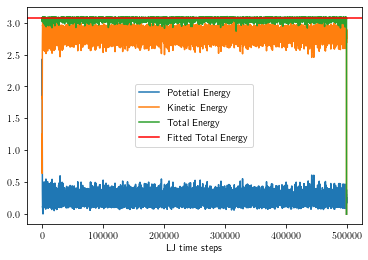

In [41]:
#plt.plot(range(time_steps),Entot*N - Un )
plt.plot(range(time_steps),Un/N,label = "Potetial Energy")
plt.plot(range(time_steps),Kn,label = "Kinetic Energy")
plt.plot(range(time_steps),Entot,label = "Total Energy")
plt.axhline(y = np.mean(Entot[1000:]) , color = 'r', linestyle = '-', label = "Fitted Total Energy")

plt.xlabel("LJ time steps")
plt.legend()
np.mean(Entot[1000:])

2.828734507593511


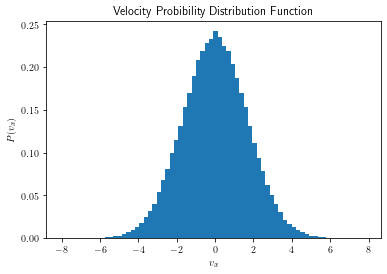

In [53]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit




count, bins, ignored = plt.hist(v[(v[:,:,0]<20000) & (v[:,:,0]>-20000),0],70,density=True)
#print(np.mean(v[1900,:,0]))
plt.xlabel("$v_x$")
plt.ylabel("$P(v_x)$")
plt.title("Velocity Probibility Distribution Function")



temp = np.mean(Kn)

print(temp)
#def gaus(x,a,x0,sigma):
#    return a*exp(-(x-x0)**2/(2*sigma**2))
#plt.plot(bins)
#plt.show()

A exp[-0.5((x-mu)/sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
0.2366676706138156 0.11633243006066608 1.685388965416798 1.0460462905677148e-05


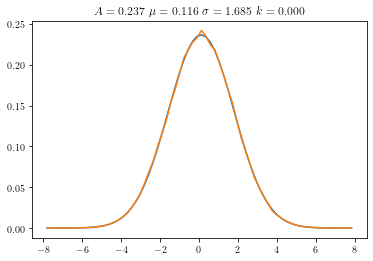

In [29]:
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq

fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
errfunc  = lambda p, x, y: (y - fitfunc(p, x))

xdata    = bins[1:]
ydata    = count

init  = [1.0, 0.5, 0.5, 0.5]

out   = leastsq( errfunc, init, args=(xdata, ydata))
c = out[0]

print ("A exp[-0.5((x-mu)/sigma)^2] + k ")
print ("Parent Coefficients:")
print ("1.000, 0.200, 0.300, 0.625")
print ("Fit Coefficients:")
print (c[0],c[1],abs(c[2]),c[3])

plot(xdata, fitfunc(c, xdata))
plot(xdata, ydata)

title(r'$A = %.3f\  \mu = %.3f\  \sigma = %.3f\ k = %.3f $' %(c[0],c[1],abs(c[2]),c[3]));

show()

In [86]:
a_file = open("high_res_data1.txt", "w+")

for t in range(time_steps):
 #   print (rabs[t])
    for row in rabs[t]:
        np.savetxt(a_file, row)
a_file.close()


KeyboardInterrupt: 

In [57]:
%prun setup()
%prun integrate_motion()

 0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
2

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981


8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621


10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
1021

11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
1158

12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
1295

14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
1432

15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
1568

16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
1705

18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
1842

19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
1978

20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
2115

22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
2252

23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
2389

25090
25091
25092
25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
2525

26456
26457
26458
26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26478
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
2662

27822
27823
27824
27825
27826
27827
27828
27829
27830
27831
27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
2798

29188
29189
29190
29191
29192
29193
29194
29195
29196
29197
29198
29199
29200
29201
29202
29203
29204
29205
29206
29207
29208
29209
29210
29211
29212
29213
29214
29215
29216
29217
29218
29219
29220
29221
29222
29223
29224
29225
29226
29227
29228
29229
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
2935

30554
30555
30556
30557
30558
30559
30560
30561
30562
30563
30564
30565
30566
30567
30568
30569
30570
30571
30572
30573
30574
30575
30576
30577
30578
30579
30580
30581
30582
30583
30584
30585
30586
30587
30588
30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
3072

31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
3208

33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
3345

34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
3482

36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
3619

37395
37396
37397
37398
37399
37400
37401
37402
37403
37404
37405
37406
37407
37408
37409
37410
37411
37412
37413
37414
37415
37416
37417
37418
37419
37420
37421
37422
37423
37424
37425
37426
37427
37428
37429
37430
37431
37432
37433
37434
37435
37436
37437
37438
37439
37440
37441
37442
37443
37444
37445
37446
37447
37448
37449
37450
37451
37452
37453
37454
37455
37456
37457
37458
37459
37460
37461
37462
37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
3756

38764
38765
38766
38767
38768
38769
38770
38771
38772
38773
38774
38775
38776
38777
38778
38779
38780
38781
38782
38783
38784
38785
38786
38787
38788
38789
38790
38791
38792
38793
38794
38795
38796
38797
38798
38799
38800
38801
38802
38803
38804
38805
38806
38807
38808
38809
38810
38811
38812
38813
38814
38815
38816
38817
38818
38819
38820
38821
38822
38823
38824
38825
38826
38827
38828
38829
38830
38831
38832
38833
38834
38835
38836
38837
38838
38839
38840
38841
38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
3893

40133
40134
40135
40136
40137
40138
40139
40140
40141
40142
40143
40144
40145
40146
40147
40148
40149
40150
40151
40152
40153
40154
40155
40156
40157
40158
40159
40160
40161
40162
40163
40164
40165
40166
40167
40168
40169
40170
40171
40172
40173
40174
40175
40176
40177
40178
40179
40180
40181
40182
40183
40184
40185
40186
40187
40188
40189
40190
40191
40192
40193
40194
40195
40196
40197
40198
40199
40200
40201
40202
40203
40204
40205
40206
40207
40208
40209
40210
40211
40212
40213
40214
40215
40216
40217
40218
40219
40220
40221
40222
40223
40224
40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
4029

41500
41501
41502
41503
41504
41505
41506
41507
41508
41509
41510
41511
41512
41513
41514
41515
41516
41517
41518
41519
41520
41521
41522
41523
41524
41525
41526
41527
41528
41529
41530
41531
41532
41533
41534
41535
41536
41537
41538
41539
41540
41541
41542
41543
41544
41545
41546
41547
41548
41549
41550
41551
41552
41553
41554
41555
41556
41557
41558
41559
41560
41561
41562
41563
41564
41565
41566
41567
41568
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
4166

42866
42867
42868
42869
42870
42871
42872
42873
42874
42875
42876
42877
42878
42879
42880
42881
42882
42883
42884
42885
42886
42887
42888
42889
42890
42891
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
42908
42909
42910
42911
42912
42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
42933
42934
42935
42936
42937
42938
42939
42940
42941
42942
42943
42944
42945
42946
42947
42948
42949
42950
42951
42952
42953
42954
42955
42956
42957
42958
42959
42960
42961
42962
42963
42964
42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42988
42989
42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
4303

44234
44235
44236
44237
44238
44239
44240
44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44258
44259
44260
44261
44262
44263
44264
44265
44266
44267
44268
44269
44270
44271
44272
44273
44274
44275
44276
44277
44278
44279
44280
44281
44282
44283
44284
44285
44286
44287
44288
44289
44290
44291
44292
44293
44294
44295
44296
44297
44298
44299
44300
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
4440

45602
45603
45604
45605
45606
45607
45608
45609
45610
45611
45612
45613
45614
45615
45616
45617
45618
45619
45620
45621
45622
45623
45624
45625
45626
45627
45628
45629
45630
45631
45632
45633
45634
45635
45636
45637
45638
45639
45640
45641
45642
45643
45644
45645
45646
45647
45648
45649
45650
45651
45652
45653
45654
45655
45656
45657
45658
45659
45660
45661
45662
45663
45664
45665
45666
45667
45668
45669
45670
45671
45672
45673
45674
45675
45676
45677
45678
45679
45680
45681
45682
45683
45684
45685
45686
45687
45688
45689
45690
45691
45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
4576

46969
46970
46971
46972
46973
46974
46975
46976
46977
46978
46979
46980
46981
46982
46983
46984
46985
46986
46987
46988
46989
46990
46991
46992
46993
46994
46995
46996
46997
46998
46999
47000
47001
47002
47003
47004
47005
47006
47007
47008
47009
47010
47011
47012
47013
47014
47015
47016
47017
47018
47019
47020
47021
47022
47023
47024
47025
47026
47027
47028
47029
47030
47031
47032
47033
47034
47035
47036
47037
47038
47039
47040
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
47070
47071
47072
47073
47074
47075
47076
47077
47078
47079
47080
47081
47082
47083
47084
47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
4713

48336
48337
48338
48339
48340
48341
48342
48343
48344
48345
48346
48347
48348
48349
48350
48351
48352
48353
48354
48355
48356
48357
48358
48359
48360
48361
48362
48363
48364
48365
48366
48367
48368
48369
48370
48371
48372
48373
48374
48375
48376
48377
48378
48379
48380
48381
48382
48383
48384
48385
48386
48387
48388
48389
48390
48391
48392
48393
48394
48395
48396
48397
48398
48399
48400
48401
48402
48403
48404
48405
48406
48407
48408
48409
48410
48411
48412
48413
48414
48415
48416
48417
48418
48419
48420
48421
48422
48423
48424
48425
48426
48427
48428
48429
48430
48431
48432
48433
48434
48435
48436
48437
48438
48439
48440
48441
48442
48443
48444
48445
48446
48447
48448
48449
48450
48451
48452
48453
48454
48455
48456
48457
48458
48459
48460
48461
48462
48463
48464
48465
48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
4850

49704
49705
49706
49707
49708
49709
49710
49711
49712
49713
49714
49715
49716
49717
49718
49719
49720
49721
49722
49723
49724
49725
49726
49727
49728
49729
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
4987

51070
51071
51072
51073
51074
51075
51076
51077
51078
51079
51080
51081
51082
51083
51084
51085
51086
51087
51088
51089
51090
51091
51092
51093
51094
51095
51096
51097
51098
51099
51100
51101
51102
51103
51104
51105
51106
51107
51108
51109
51110
51111
51112
51113
51114
51115
51116
51117
51118
51119
51120
51121
51122
51123
51124
51125
51126
51127
51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
5123

52435
52436
52437
52438
52439
52440
52441
52442
52443
52444
52445
52446
52447
52448
52449
52450
52451
52452
52453
52454
52455
52456
52457
52458
52459
52460
52461
52462
52463
52464
52465
52466
52467
52468
52469
52470
52471
52472
52473
52474
52475
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
52509
52510
52511
52512
52513
52514
52515
52516
52517
52518
52519
52520
52521
52522
52523
52524
52525
52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
52559
52560
52561
52562
52563
52564
52565
52566
52567
52568
52569
52570
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
52582
52583
52584
52585
52586
52587
52588
52589
52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
5260

53803
53804
53805
53806
53807
53808
53809
53810
53811
53812
53813
53814
53815
53816
53817
53818
53819
53820
53821
53822
53823
53824
53825
53826
53827
53828
53829
53830
53831
53832
53833
53834
53835
53836
53837
53838
53839
53840
53841
53842
53843
53844
53845
53846
53847
53848
53849
53850
53851
53852
53853
53854
53855
53856
53857
53858
53859
53860
53861
53862
53863
53864
53865
53866
53867
53868
53869
53870
53871
53872
53873
53874
53875
53876
53877
53878
53879
53880
53881
53882
53883
53884
53885
53886
53887
53888
53889
53890
53891
53892
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
53944
53945
53946
53947
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
5396

55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
55268
55269
55270
55271
55272
55273
55274
55275
55276
55277
55278
55279
55280
55281
55282
55283
55284
55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
55295
55296
55297
55298
55299
55300
55301
55302
55303
55304
55305
55306
55307
55308
55309
55310
55311
55312
55313
55314
55315
55316
55317
55318
55319
55320
55321
55322
55323
55324
55325
55326
55327
55328
55329
55330
55331
55332
55333
55334
5533

56536
56537
56538
56539
56540
56541
56542
56543
56544
56545
56546
56547
56548
56549
56550
56551
56552
56553
56554
56555
56556
56557
56558
56559
56560
56561
56562
56563
56564
56565
56566
56567
56568
56569
56570
56571
56572
56573
56574
56575
56576
56577
56578
56579
56580
56581
56582
56583
56584
56585
56586
56587
56588
56589
56590
56591
56592
56593
56594
56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
5670

57902
57903
57904
57905
57906
57907
57908
57909
57910
57911
57912
57913
57914
57915
57916
57917
57918
57919
57920
57921
57922
57923
57924
57925
57926
57927
57928
57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57941
57942
57943
57944
57945
57946
57947
57948
57949
57950
57951
57952
57953
57954
57955
57956
57957
57958
57959
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58001
58002
58003
58004
58005
58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
5806

59269
59270
59271
59272
59273
59274
59275
59276
59277
59278
59279
59280
59281
59282
59283
59284
59285
59286
59287
59288
59289
59290
59291
59292
59293
59294
59295
59296
59297
59298
59299
59300
59301
59302
59303
59304
59305
59306
59307
59308
59309
59310
59311
59312
59313
59314
59315
59316
59317
59318
59319
59320
59321
59322
59323
59324
59325
59326
59327
59328
59329
59330
59331
59332
59333
59334
59335
59336
59337
59338
59339
59340
59341
59342
59343
59344
59345
59346
59347
59348
59349
59350
59351
59352
59353
59354
59355
59356
59357
59358
59359
59360
59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
59378
59379
59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59415
59416
59417
59418
59419
59420
59421
59422
59423
59424
59425
59426
59427
59428
59429
59430
59431
59432
59433
59434
5943

60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60648
60649
60650
60651
60652
60653
60654
60655
60656
60657
60658
60659
60660
60661
60662
60663
60664
60665
60666
60667
60668
60669
60670
60671
60672
60673
60674
60675
60676
60677
60678
60679
60680
60681
60682
60683
60684
60685
60686
60687
60688
60689
60690
60691
60692
60693
60694
60695
60696
60697
60698
60699
60700
60701
60702
60703
60704
60705
60706
60707
60708
60709
60710
60711
60712
60713
60714
60715
60716
60717
60718
60719
60720
60721
60722
60723
60724
60725
60726
60727
60728
60729
60730
60731
60732
60733
60734
60735
60736
60737
60738
60739
60740
60741
60742
60743
60744
60745
60746
60747
60748
60749
60750
60751
60752
60753
60754
60755
60756
60757
60758
60759
60760
60761
60762
60763
60764
60765
60766
60767
60768
60769
60770
60771
60772
60773
60774
60775
60776
60777
60778
60779
60780
60781
60782
60783
60784
60785
60786
60787
60788
60789
60790
60791
60792
60793
60794
60795
60796
60797
60798
60799
60800
60801
60802
6080

62002
62003
62004
62005
62006
62007
62008
62009
62010
62011
62012
62013
62014
62015
62016
62017
62018
62019
62020
62021
62022
62023
62024
62025
62026
62027
62028
62029
62030
62031
62032
62033
62034
62035
62036
62037
62038
62039
62040
62041
62042
62043
62044
62045
62046
62047
62048
62049
62050
62051
62052
62053
62054
62055
62056
62057
62058
62059
62060
62061
62062
62063
62064
62065
62066
62067
62068
62069
62070
62071
62072
62073
62074
62075
62076
62077
62078
62079
62080
62081
62082
62083
62084
62085
62086
62087
62088
62089
62090
62091
62092
62093
62094
62095
62096
62097
62098
62099
62100
62101
62102
62103
62104
62105
62106
62107
62108
62109
62110
62111
62112
62113
62114
62115
62116
62117
62118
62119
62120
62121
62122
62123
62124
62125
62126
62127
62128
62129
62130
62131
62132
62133
62134
62135
62136
62137
62138
62139
62140
62141
62142
62143
62144
62145
62146
62147
62148
62149
62150
62151
62152
62153
62154
62155
62156
62157
62158
62159
62160
62161
62162
62163
62164
62165
62166
62167
6216

63368
63369
63370
63371
63372
63373
63374
63375
63376
63377
63378
63379
63380
63381
63382
63383
63384
63385
63386
63387
63388
63389
63390
63391
63392
63393
63394
63395
63396
63397
63398
63399
63400
63401
63402
63403
63404
63405
63406
63407
63408
63409
63410
63411
63412
63413
63414
63415
63416
63417
63418
63419
63420
63421
63422
63423
63424
63425
63426
63427
63428
63429
63430
63431
63432
63433
63434
63435
63436
63437
63438
63439
63440
63441
63442
63443
63444
63445
63446
63447
63448
63449
63450
63451
63452
63453
63454
63455
63456
63457
63458
63459
63460
63461
63462
63463
63464
63465
63466
63467
63468
63469
63470
63471
63472
63473
63474
63475
63476
63477
63478
63479
63480
63481
63482
63483
63484
63485
63486
63487
63488
63489
63490
63491
63492
63493
63494
63495
63496
63497
63498
63499
63500
63501
63502
63503
63504
63505
63506
63507
63508
63509
63510
63511
63512
63513
63514
63515
63516
63517
63518
63519
63520
63521
63522
63523
63524
63525
63526
63527
63528
63529
63530
63531
63532
63533
6353

64734
64735
64736
64737
64738
64739
64740
64741
64742
64743
64744
64745
64746
64747
64748
64749
64750
64751
64752
64753
64754
64755
64756
64757
64758
64759
64760
64761
64762
64763
64764
64765
64766
64767
64768
64769
64770
64771
64772
64773
64774
64775
64776
64777
64778
64779
64780
64781
64782
64783
64784
64785
64786
64787
64788
64789
64790
64791
64792
64793
64794
64795
64796
64797
64798
64799
64800
64801
64802
64803
64804
64805
64806
64807
64808
64809
64810
64811
64812
64813
64814
64815
64816
64817
64818
64819
64820
64821
64822
64823
64824
64825
64826
64827
64828
64829
64830
64831
64832
64833
64834
64835
64836
64837
64838
64839
64840
64841
64842
64843
64844
64845
64846
64847
64848
64849
64850
64851
64852
64853
64854
64855
64856
64857
64858
64859
64860
64861
64862
64863
64864
64865
64866
64867
64868
64869
64870
64871
64872
64873
64874
64875
64876
64877
64878
64879
64880
64881
64882
64883
64884
64885
64886
64887
64888
64889
64890
64891
64892
64893
64894
64895
64896
64897
64898
64899
6490

66102
66103
66104
66105
66106
66107
66108
66109
66110
66111
66112
66113
66114
66115
66116
66117
66118
66119
66120
66121
66122
66123
66124
66125
66126
66127
66128
66129
66130
66131
66132
66133
66134
66135
66136
66137
66138
66139
66140
66141
66142
66143
66144
66145
66146
66147
66148
66149
66150
66151
66152
66153
66154
66155
66156
66157
66158
66159
66160
66161
66162
66163
66164
66165
66166
66167
66168
66169
66170
66171
66172
66173
66174
66175
66176
66177
66178
66179
66180
66181
66182
66183
66184
66185
66186
66187
66188
66189
66190
66191
66192
66193
66194
66195
66196
66197
66198
66199
66200
66201
66202
66203
66204
66205
66206
66207
66208
66209
66210
66211
66212
66213
66214
66215
66216
66217
66218
66219
66220
66221
66222
66223
66224
66225
66226
66227
66228
66229
66230
66231
66232
66233
66234
66235
66236
66237
66238
66239
66240
66241
66242
66243
66244
66245
66246
66247
66248
66249
66250
66251
66252
66253
66254
66255
66256
66257
66258
66259
66260
66261
66262
66263
66264
66265
66266
66267
6626

67471
67472
67473
67474
67475
67476
67477
67478
67479
67480
67481
67482
67483
67484
67485
67486
67487
67488
67489
67490
67491
67492
67493
67494
67495
67496
67497
67498
67499
67500
67501
67502
67503
67504
67505
67506
67507
67508
67509
67510
67511
67512
67513
67514
67515
67516
67517
67518
67519
67520
67521
67522
67523
67524
67525
67526
67527
67528
67529
67530
67531
67532
67533
67534
67535
67536
67537
67538
67539
67540
67541
67542
67543
67544
67545
67546
67547
67548
67549
67550
67551
67552
67553
67554
67555
67556
67557
67558
67559
67560
67561
67562
67563
67564
67565
67566
67567
67568
67569
67570
67571
67572
67573
67574
67575
67576
67577
67578
67579
67580
67581
67582
67583
67584
67585
67586
67587
67588
67589
67590
67591
67592
67593
67594
67595
67596
67597
67598
67599
67600
67601
67602
67603
67604
67605
67606
67607
67608
67609
67610
67611
67612
67613
67614
67615
67616
67617
67618
67619
67620
67621
67622
67623
67624
67625
67626
67627
67628
67629
67630
67631
67632
67633
67634
67635
67636
6763

68838
68839
68840
68841
68842
68843
68844
68845
68846
68847
68848
68849
68850
68851
68852
68853
68854
68855
68856
68857
68858
68859
68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
68907
68908
68909
68910
68911
68912
68913
68914
68915
68916
68917
68918
68919
68920
68921
68922
68923
68924
68925
68926
68927
68928
68929
68930
68931
68932
68933
68934
68935
68936
68937
68938
68939
68940
68941
68942
68943
68944
68945
68946
68947
68948
68949
68950
68951
68952
68953
68954
68955
68956
68957
68958
68959
68960
68961
68962
68963
68964
68965
68966
68967
68968
68969
68970
68971
68972
68973
68974
68975
68976
68977
68978
68979
68980
68981
68982
68983
68984
68985
68986
68987
68988
68989
68990
68991
68992
68993
68994
68995
68996
68997
68998
68999
69000
69001
69002
69003
6900

70204
70205
70206
70207
70208
70209
70210
70211
70212
70213
70214
70215
70216
70217
70218
70219
70220
70221
70222
70223
70224
70225
70226
70227
70228
70229
70230
70231
70232
70233
70234
70235
70236
70237
70238
70239
70240
70241
70242
70243
70244
70245
70246
70247
70248
70249
70250
70251
70252
70253
70254
70255
70256
70257
70258
70259
70260
70261
70262
70263
70264
70265
70266
70267
70268
70269
70270
70271
70272
70273
70274
70275
70276
70277
70278
70279
70280
70281
70282
70283
70284
70285
70286
70287
70288
70289
70290
70291
70292
70293
70294
70295
70296
70297
70298
70299
70300
70301
70302
70303
70304
70305
70306
70307
70308
70309
70310
70311
70312
70313
70314
70315
70316
70317
70318
70319
70320
70321
70322
70323
70324
70325
70326
70327
70328
70329
70330
70331
70332
70333
70334
70335
70336
70337
70338
70339
70340
70341
70342
70343
70344
70345
70346
70347
70348
70349
70350
70351
70352
70353
70354
70355
70356
70357
70358
70359
70360
70361
70362
70363
70364
70365
70366
70367
70368
70369
7037

71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
71706
71707
71708
71709
71710
71711
71712
71713
71714
71715
71716
71717
71718
71719
71720
71721
71722
71723
71724
71725
71726
71727
71728
71729
71730
71731
71732
71733
71734
71735
7173

72937
72938
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
73044
73045
73046
73047
73048
73049
73050
73051
73052
73053
73054
73055
73056
73057
73058
73059
73060
73061
73062
73063
73064
73065
73066
73067
73068
73069
73070
73071
73072
73073
73074
73075
73076
73077
73078
73079
73080
73081
73082
73083
73084
73085
73086
73087
73088
73089
73090
73091
73092
73093
73094
73095
73096
73097
73098
73099
73100
73101
73102
7310

74303
74304
74305
74306
74307
74308
74309
74310
74311
74312
74313
74314
74315
74316
74317
74318
74319
74320
74321
74322
74323
74324
74325
74326
74327
74328
74329
74330
74331
74332
74333
74334
74335
74336
74337
74338
74339
74340
74341
74342
74343
74344
74345
74346
74347
74348
74349
74350
74351
74352
74353
74354
74355
74356
74357
74358
74359
74360
74361
74362
74363
74364
74365
74366
74367
74368
74369
74370
74371
74372
74373
74374
74375
74376
74377
74378
74379
74380
74381
74382
74383
74384
74385
74386
74387
74388
74389
74390
74391
74392
74393
74394
74395
74396
74397
74398
74399
74400
74401
74402
74403
74404
74405
74406
74407
74408
74409
74410
74411
74412
74413
74414
74415
74416
74417
74418
74419
74420
74421
74422
74423
74424
74425
74426
74427
74428
74429
74430
74431
74432
74433
74434
74435
74436
74437
74438
74439
74440
74441
74442
74443
74444
74445
74446
74447
74448
74449
74450
74451
74452
74453
74454
74455
74456
74457
74458
74459
74460
74461
74462
74463
74464
74465
74466
74467
74468
7446

75669
75670
75671
75672
75673
75674
75675
75676
75677
75678
75679
75680
75681
75682
75683
75684
75685
75686
75687
75688
75689
75690
75691
75692
75693
75694
75695
75696
75697
75698
75699
75700
75701
75702
75703
75704
75705
75706
75707
75708
75709
75710
75711
75712
75713
75714
75715
75716
75717
75718
75719
75720
75721
75722
75723
75724
75725
75726
75727
75728
75729
75730
75731
75732
75733
75734
75735
75736
75737
75738
75739
75740
75741
75742
75743
75744
75745
75746
75747
75748
75749
75750
75751
75752
75753
75754
75755
75756
75757
75758
75759
75760
75761
75762
75763
75764
75765
75766
75767
75768
75769
75770
75771
75772
75773
75774
75775
75776
75777
75778
75779
75780
75781
75782
75783
75784
75785
75786
75787
75788
75789
75790
75791
75792
75793
75794
75795
75796
75797
75798
75799
75800
75801
75802
75803
75804
75805
75806
75807
75808
75809
75810
75811
75812
75813
75814
75815
75816
75817
75818
75819
75820
75821
75822
75823
75824
75825
75826
75827
75828
75829
75830
75831
75832
75833
75834
7583

77035
77036
77037
77038
77039
77040
77041
77042
77043
77044
77045
77046
77047
77048
77049
77050
77051
77052
77053
77054
77055
77056
77057
77058
77059
77060
77061
77062
77063
77064
77065
77066
77067
77068
77069
77070
77071
77072
77073
77074
77075
77076
77077
77078
77079
77080
77081
77082
77083
77084
77085
77086
77087
77088
77089
77090
77091
77092
77093
77094
77095
77096
77097
77098
77099
77100
77101
77102
77103
77104
77105
77106
77107
77108
77109
77110
77111
77112
77113
77114
77115
77116
77117
77118
77119
77120
77121
77122
77123
77124
77125
77126
77127
77128
77129
77130
77131
77132
77133
77134
77135
77136
77137
77138
77139
77140
77141
77142
77143
77144
77145
77146
77147
77148
77149
77150
77151
77152
77153
77154
77155
77156
77157
77158
77159
77160
77161
77162
77163
77164
77165
77166
77167
77168
77169
77170
77171
77172
77173
77174
77175
77176
77177
77178
77179
77180
77181
77182
77183
77184
77185
77186
77187
77188
77189
77190
77191
77192
77193
77194
77195
77196
77197
77198
77199
77200
7720

78403
78404
78405
78406
78407
78408
78409
78410
78411
78412
78413
78414
78415
78416
78417
78418
78419
78420
78421
78422
78423
78424
78425
78426
78427
78428
78429
78430
78431
78432
78433
78434
78435
78436
78437
78438
78439
78440
78441
78442
78443
78444
78445
78446
78447
78448
78449
78450
78451
78452
78453
78454
78455
78456
78457
78458
78459
78460
78461
78462
78463
78464
78465
78466
78467
78468
78469
78470
78471
78472
78473
78474
78475
78476
78477
78478
78479
78480
78481
78482
78483
78484
78485
78486
78487
78488
78489
78490
78491
78492
78493
78494
78495
78496
78497
78498
78499
78500
78501
78502
78503
78504
78505
78506
78507
78508
78509
78510
78511
78512
78513
78514
78515
78516
78517
78518
78519
78520
78521
78522
78523
78524
78525
78526
78527
78528
78529
78530
78531
78532
78533
78534
78535
78536
78537
78538
78539
78540
78541
78542
78543
78544
78545
78546
78547
78548
78549
78550
78551
78552
78553
78554
78555
78556
78557
78558
78559
78560
78561
78562
78563
78564
78565
78566
78567
78568
7856

79770
79771
79772
79773
79774
79775
79776
79777
79778
79779
79780
79781
79782
79783
79784
79785
79786
79787
79788
79789
79790
79791
79792
79793
79794
79795
79796
79797
79798
79799
79800
79801
79802
79803
79804
79805
79806
79807
79808
79809
79810
79811
79812
79813
79814
79815
79816
79817
79818
79819
79820
79821
79822
79823
79824
79825
79826
79827
79828
79829
79830
79831
79832
79833
79834
79835
79836
79837
79838
79839
79840
79841
79842
79843
79844
79845
79846
79847
79848
79849
79850
79851
79852
79853
79854
79855
79856
79857
79858
79859
79860
79861
79862
79863
79864
79865
79866
79867
79868
79869
79870
79871
79872
79873
79874
79875
79876
79877
79878
79879
79880
79881
79882
79883
79884
79885
79886
79887
79888
79889
79890
79891
79892
79893
79894
79895
79896
79897
79898
79899
79900
79901
79902
79903
79904
79905
79906
79907
79908
79909
79910
79911
79912
79913
79914
79915
79916
79917
79918
79919
79920
79921
79922
79923
79924
79925
79926
79927
79928
79929
79930
79931
79932
79933
79934
79935
7993

81136
81137
81138
81139
81140
81141
81142
81143
81144
81145
81146
81147
81148
81149
81150
81151
81152
81153
81154
81155
81156
81157
81158
81159
81160
81161
81162
81163
81164
81165
81166
81167
81168
81169
81170
81171
81172
81173
81174
81175
81176
81177
81178
81179
81180
81181
81182
81183
81184
81185
81186
81187
81188
81189
81190
81191
81192
81193
81194
81195
81196
81197
81198
81199
81200
81201
81202
81203
81204
81205
81206
81207
81208
81209
81210
81211
81212
81213
81214
81215
81216
81217
81218
81219
81220
81221
81222
81223
81224
81225
81226
81227
81228
81229
81230
81231
81232
81233
81234
81235
81236
81237
81238
81239
81240
81241
81242
81243
81244
81245
81246
81247
81248
81249
81250
81251
81252
81253
81254
81255
81256
81257
81258
81259
81260
81261
81262
81263
81264
81265
81266
81267
81268
81269
81270
81271
81272
81273
81274
81275
81276
81277
81278
81279
81280
81281
81282
81283
81284
81285
81286
81287
81288
81289
81290
81291
81292
81293
81294
81295
81296
81297
81298
81299
81300
81301
8130

82502
82503
82504
82505
82506
82507
82508
82509
82510
82511
82512
82513
82514
82515
82516
82517
82518
82519
82520
82521
82522
82523
82524
82525
82526
82527
82528
82529
82530
82531
82532
82533
82534
82535
82536
82537
82538
82539
82540
82541
82542
82543
82544
82545
82546
82547
82548
82549
82550
82551
82552
82553
82554
82555
82556
82557
82558
82559
82560
82561
82562
82563
82564
82565
82566
82567
82568
82569
82570
82571
82572
82573
82574
82575
82576
82577
82578
82579
82580
82581
82582
82583
82584
82585
82586
82587
82588
82589
82590
82591
82592
82593
82594
82595
82596
82597
82598
82599
82600
82601
82602
82603
82604
82605
82606
82607
82608
82609
82610
82611
82612
82613
82614
82615
82616
82617
82618
82619
82620
82621
82622
82623
82624
82625
82626
82627
82628
82629
82630
82631
82632
82633
82634
82635
82636
82637
82638
82639
82640
82641
82642
82643
82644
82645
82646
82647
82648
82649
82650
82651
82652
82653
82654
82655
82656
82657
82658
82659
82660
82661
82662
82663
82664
82665
82666
82667
8266

83868
83869
83870
83871
83872
83873
83874
83875
83876
83877
83878
83879
83880
83881
83882
83883
83884
83885
83886
83887
83888
83889
83890
83891
83892
83893
83894
83895
83896
83897
83898
83899
83900
83901
83902
83903
83904
83905
83906
83907
83908
83909
83910
83911
83912
83913
83914
83915
83916
83917
83918
83919
83920
83921
83922
83923
83924
83925
83926
83927
83928
83929
83930
83931
83932
83933
83934
83935
83936
83937
83938
83939
83940
83941
83942
83943
83944
83945
83946
83947
83948
83949
83950
83951
83952
83953
83954
83955
83956
83957
83958
83959
83960
83961
83962
83963
83964
83965
83966
83967
83968
83969
83970
83971
83972
83973
83974
83975
83976
83977
83978
83979
83980
83981
83982
83983
83984
83985
83986
83987
83988
83989
83990
83991
83992
83993
83994
83995
83996
83997
83998
83999
84000
84001
84002
84003
84004
84005
84006
84007
84008
84009
84010
84011
84012
84013
84014
84015
84016
84017
84018
84019
84020
84021
84022
84023
84024
84025
84026
84027
84028
84029
84030
84031
84032
84033
8403

85236
85237
85238
85239
85240
85241
85242
85243
85244
85245
85246
85247
85248
85249
85250
85251
85252
85253
85254
85255
85256
85257
85258
85259
85260
85261
85262
85263
85264
85265
85266
85267
85268
85269
85270
85271
85272
85273
85274
85275
85276
85277
85278
85279
85280
85281
85282
85283
85284
85285
85286
85287
85288
85289
85290
85291
85292
85293
85294
85295
85296
85297
85298
85299
85300
85301
85302
85303
85304
85305
85306
85307
85308
85309
85310
85311
85312
85313
85314
85315
85316
85317
85318
85319
85320
85321
85322
85323
85324
85325
85326
85327
85328
85329
85330
85331
85332
85333
85334
85335
85336
85337
85338
85339
85340
85341
85342
85343
85344
85345
85346
85347
85348
85349
85350
85351
85352
85353
85354
85355
85356
85357
85358
85359
85360
85361
85362
85363
85364
85365
85366
85367
85368
85369
85370
85371
85372
85373
85374
85375
85376
85377
85378
85379
85380
85381
85382
85383
85384
85385
85386
85387
85388
85389
85390
85391
85392
85393
85394
85395
85396
85397
85398
85399
85400
85401
8540

86602
86603
86604
86605
86606
86607
86608
86609
86610
86611
86612
86613
86614
86615
86616
86617
86618
86619
86620
86621
86622
86623
86624
86625
86626
86627
86628
86629
86630
86631
86632
86633
86634
86635
86636
86637
86638
86639
86640
86641
86642
86643
86644
86645
86646
86647
86648
86649
86650
86651
86652
86653
86654
86655
86656
86657
86658
86659
86660
86661
86662
86663
86664
86665
86666
86667
86668
86669
86670
86671
86672
86673
86674
86675
86676
86677
86678
86679
86680
86681
86682
86683
86684
86685
86686
86687
86688
86689
86690
86691
86692
86693
86694
86695
86696
86697
86698
86699
86700
86701
86702
86703
86704
86705
86706
86707
86708
86709
86710
86711
86712
86713
86714
86715
86716
86717
86718
86719
86720
86721
86722
86723
86724
86725
86726
86727
86728
86729
86730
86731
86732
86733
86734
86735
86736
86737
86738
86739
86740
86741
86742
86743
86744
86745
86746
86747
86748
86749
86750
86751
86752
86753
86754
86755
86756
86757
86758
86759
86760
86761
86762
86763
86764
86765
86766
86767
8676

87969
87970
87971
87972
87973
87974
87975
87976
87977
87978
87979
87980
87981
87982
87983
87984
87985
87986
87987
87988
87989
87990
87991
87992
87993
87994
87995
87996
87997
87998
87999
88000
88001
88002
88003
88004
88005
88006
88007
88008
88009
88010
88011
88012
88013
88014
88015
88016
88017
88018
88019
88020
88021
88022
88023
88024
88025
88026
88027
88028
88029
88030
88031
88032
88033
88034
88035
88036
88037
88038
88039
88040
88041
88042
88043
88044
88045
88046
88047
88048
88049
88050
88051
88052
88053
88054
88055
88056
88057
88058
88059
88060
88061
88062
88063
88064
88065
88066
88067
88068
88069
88070
88071
88072
88073
88074
88075
88076
88077
88078
88079
88080
88081
88082
88083
88084
88085
88086
88087
88088
88089
88090
88091
88092
88093
88094
88095
88096
88097
88098
88099
88100
88101
88102
88103
88104
88105
88106
88107
88108
88109
88110
88111
88112
88113
88114
88115
88116
88117
88118
88119
88120
88121
88122
88123
88124
88125
88126
88127
88128
88129
88130
88131
88132
88133
88134
8813

89339
89340
89341
89342
89343
89344
89345
89346
89347
89348
89349
89350
89351
89352
89353
89354
89355
89356
89357
89358
89359
89360
89361
89362
89363
89364
89365
89366
89367
89368
89369
89370
89371
89372
89373
89374
89375
89376
89377
89378
89379
89380
89381
89382
89383
89384
89385
89386
89387
89388
89389
89390
89391
89392
89393
89394
89395
89396
89397
89398
89399
89400
89401
89402
89403
89404
89405
89406
89407
89408
89409
89410
89411
89412
89413
89414
89415
89416
89417
89418
89419
89420
89421
89422
89423
89424
89425
89426
89427
89428
89429
89430
89431
89432
89433
89434
89435
89436
89437
89438
89439
89440
89441
89442
89443
89444
89445
89446
89447
89448
89449
89450
89451
89452
89453
89454
89455
89456
89457
89458
89459
89460
89461
89462
89463
89464
89465
89466
89467
89468
89469
89470
89471
89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
89490
89491
89492
89493
89494
89495
89496
89497
89498
89499
89500
89501
89502
89503
89504
8950

90706
90707
90708
90709
90710
90711
90712
90713
90714
90715
90716
90717
90718
90719
90720
90721
90722
90723
90724
90725
90726
90727
90728
90729
90730
90731
90732
90733
90734
90735
90736
90737
90738
90739
90740
90741
90742
90743
90744
90745
90746
90747
90748
90749
90750
90751
90752
90753
90754
90755
90756
90757
90758
90759
90760
90761
90762
90763
90764
90765
90766
90767
90768
90769
90770
90771
90772
90773
90774
90775
90776
90777
90778
90779
90780
90781
90782
90783
90784
90785
90786
90787
90788
90789
90790
90791
90792
90793
90794
90795
90796
90797
90798
90799
90800
90801
90802
90803
90804
90805
90806
90807
90808
90809
90810
90811
90812
90813
90814
90815
90816
90817
90818
90819
90820
90821
90822
90823
90824
90825
90826
90827
90828
90829
90830
90831
90832
90833
90834
90835
90836
90837
90838
90839
90840
90841
90842
90843
90844
90845
90846
90847
90848
90849
90850
90851
90852
90853
90854
90855
90856
90857
90858
90859
90860
90861
90862
90863
90864
90865
90866
90867
90868
90869
90870
90871
9087

92074
92075
92076
92077
92078
92079
92080
92081
92082
92083
92084
92085
92086
92087
92088
92089
92090
92091
92092
92093
92094
92095
92096
92097
92098
92099
92100
92101
92102
92103
92104
92105
92106
92107
92108
92109
92110
92111
92112
92113
92114
92115
92116
92117
92118
92119
92120
92121
92122
92123
92124
92125
92126
92127
92128
92129
92130
92131
92132
92133
92134
92135
92136
92137
92138
92139
92140
92141
92142
92143
92144
92145
92146
92147
92148
92149
92150
92151
92152
92153
92154
92155
92156
92157
92158
92159
92160
92161
92162
92163
92164
92165
92166
92167
92168
92169
92170
92171
92172
92173
92174
92175
92176
92177
92178
92179
92180
92181
92182
92183
92184
92185
92186
92187
92188
92189
92190
92191
92192
92193
92194
92195
92196
92197
92198
92199
92200
92201
92202
92203
92204
92205
92206
92207
92208
92209
92210
92211
92212
92213
92214
92215
92216
92217
92218
92219
92220
92221
92222
92223
92224
92225
92226
92227
92228
92229
92230
92231
92232
92233
92234
92235
92236
92237
92238
92239
9224

93440
93441
93442
93443
93444
93445
93446
93447
93448
93449
93450
93451
93452
93453
93454
93455
93456
93457
93458
93459
93460
93461
93462
93463
93464
93465
93466
93467
93468
93469
93470
93471
93472
93473
93474
93475
93476
93477
93478
93479
93480
93481
93482
93483
93484
93485
93486
93487
93488
93489
93490
93491
93492
93493
93494
93495
93496
93497
93498
93499
93500
93501
93502
93503
93504
93505
93506
93507
93508
93509
93510
93511
93512
93513
93514
93515
93516
93517
93518
93519
93520
93521
93522
93523
93524
93525
93526
93527
93528
93529
93530
93531
93532
93533
93534
93535
93536
93537
93538
93539
93540
93541
93542
93543
93544
93545
93546
93547
93548
93549
93550
93551
93552
93553
93554
93555
93556
93557
93558
93559
93560
93561
93562
93563
93564
93565
93566
93567
93568
93569
93570
93571
93572
93573
93574
93575
93576
93577
93578
93579
93580
93581
93582
93583
93584
93585
93586
93587
93588
93589
93590
93591
93592
93593
93594
93595
93596
93597
93598
93599
93600
93601
93602
93603
93604
93605
9360

94807
94808
94809
94810
94811
94812
94813
94814
94815
94816
94817
94818
94819
94820
94821
94822
94823
94824
94825
94826
94827
94828
94829
94830
94831
94832
94833
94834
94835
94836
94837
94838
94839
94840
94841
94842
94843
94844
94845
94846
94847
94848
94849
94850
94851
94852
94853
94854
94855
94856
94857
94858
94859
94860
94861
94862
94863
94864
94865
94866
94867
94868
94869
94870
94871
94872
94873
94874
94875
94876
94877
94878
94879
94880
94881
94882
94883
94884
94885
94886
94887
94888
94889
94890
94891
94892
94893
94894
94895
94896
94897
94898
94899
94900
94901
94902
94903
94904
94905
94906
94907
94908
94909
94910
94911
94912
94913
94914
94915
94916
94917
94918
94919
94920
94921
94922
94923
94924
94925
94926
94927
94928
94929
94930
94931
94932
94933
94934
94935
94936
94937
94938
94939
94940
94941
94942
94943
94944
94945
94946
94947
94948
94949
94950
94951
94952
94953
94954
94955
94956
94957
94958
94959
94960
94961
94962
94963
94964
94965
94966
94967
94968
94969
94970
94971
94972
9497

96175
96176
96177
96178
96179
96180
96181
96182
96183
96184
96185
96186
96187
96188
96189
96190
96191
96192
96193
96194
96195
96196
96197
96198
96199
96200
96201
96202
96203
96204
96205
96206
96207
96208
96209
96210
96211
96212
96213
96214
96215
96216
96217
96218
96219
96220
96221
96222
96223
96224
96225
96226
96227
96228
96229
96230
96231
96232
96233
96234
96235
96236
96237
96238
96239
96240
96241
96242
96243
96244
96245
96246
96247
96248
96249
96250
96251
96252
96253
96254
96255
96256
96257
96258
96259
96260
96261
96262
96263
96264
96265
96266
96267
96268
96269
96270
96271
96272
96273
96274
96275
96276
96277
96278
96279
96280
96281
96282
96283
96284
96285
96286
96287
96288
96289
96290
96291
96292
96293
96294
96295
96296
96297
96298
96299
96300
96301
96302
96303
96304
96305
96306
96307
96308
96309
96310
96311
96312
96313
96314
96315
96316
96317
96318
96319
96320
96321
96322
96323
96324
96325
96326
96327
96328
96329
96330
96331
96332
96333
96334
96335
96336
96337
96338
96339
96340
9634

97541
97542
97543
97544
97545
97546
97547
97548
97549
97550
97551
97552
97553
97554
97555
97556
97557
97558
97559
97560
97561
97562
97563
97564
97565
97566
97567
97568
97569
97570
97571
97572
97573
97574
97575
97576
97577
97578
97579
97580
97581
97582
97583
97584
97585
97586
97587
97588
97589
97590
97591
97592
97593
97594
97595
97596
97597
97598
97599
97600
97601
97602
97603
97604
97605
97606
97607
97608
97609
97610
97611
97612
97613
97614
97615
97616
97617
97618
97619
97620
97621
97622
97623
97624
97625
97626
97627
97628
97629
97630
97631
97632
97633
97634
97635
97636
97637
97638
97639
97640
97641
97642
97643
97644
97645
97646
97647
97648
97649
97650
97651
97652
97653
97654
97655
97656
97657
97658
97659
97660
97661
97662
97663
97664
97665
97666
97667
97668
97669
97670
97671
97672
97673
97674
97675
97676
97677
97678
97679
97680
97681
97682
97683
97684
97685
97686
97687
97688
97689
97690
97691
97692
97693
97694
97695
97696
97697
97698
97699
97700
97701
97702
97703
97704
97705
97706
9770

98910
98911
98912
98913
98914
98915
98916
98917
98918
98919
98920
98921
98922
98923
98924
98925
98926
98927
98928
98929
98930
98931
98932
98933
98934
98935
98936
98937
98938
98939
98940
98941
98942
98943
98944
98945
98946
98947
98948
98949
98950
98951
98952
98953
98954
98955
98956
98957
98958
98959
98960
98961
98962
98963
98964
98965
98966
98967
98968
98969
98970
98971
98972
98973
98974
98975
98976
98977
98978
98979
98980
98981
98982
98983
98984
98985
98986
98987
98988
98989
98990
98991
98992
98993
98994
98995
98996
98997
98998
98999
99000
99001
99002
99003
99004
99005
99006
99007
99008
99009
99010
99011
99012
99013
99014
99015
99016
99017
99018
99019
99020
99021
99022
99023
99024
99025
99026
99027
99028
99029
99030
99031
99032
99033
99034
99035
99036
99037
99038
99039
99040
99041
99042
99043
99044
99045
99046
99047
99048
99049
99050
99051
99052
99053
99054
99055
99056
99057
99058
99059
99060
99061
99062
99063
99064
99065
99066
99067
99068
99069
99070
99071
99072
99073
99074
99075
9907

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

995
996
997
998
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
27

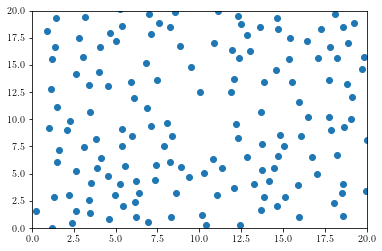

In [44]:
fig = plt.figure()
plt.rc('text', usetex=True)
ax = plt.axes(xlim=(0, 20), ylim=(0,20))
point, = ax.plot([], [],"o")

def animate(i):
    print(i)
    x = r[i,:,0]
    y = r[i,:,1]
    point.set_data(x, y)
    return point,

def init():
    setup()
    integrate_motion()
    point.set_data(r[0,:,0], r[0,:,1])
    return point,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=700, interval=20, blit=True)


anim.save("animation.gif",writer='Pillow', fps=20)

plt.show()

In [21]:
#if tau < dt:
#        n_ = int(tau/dt_)
#        for t in range(time_steps_high_res-n_):
#            sumdeltar_ += np.mean((r_high_res[t+n_,:,0] - r_high_res[t,:,0])**2 + (r_high_res[t+n_,:,1] - r_high_res[t,:,1])**2)
#            count_ += 1
#        return sumdeltar_/count_
    

In [22]:
MSD_tau = []
t_steps = []
t = 1
while t < time_steps:
    tau = t * dt
    t *= 2
 #   if t > 10**6:
 #       t -= 50
    t_steps.append(tau)
    MSD_tau.append(MSD(tau))

[0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.024, 2.048, 4.096, 8.192, 16.384, 32.768, 65.536, 131.072, 262.144]


Text(0, 0.5, '$MSD(\\tau)$')

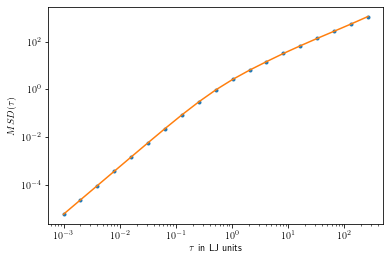

In [27]:
print(t_steps)
#t_steps = np.array(range(time_steps))
plt.loglog(t_steps,MSD_tau,".")
plt.loglog(t_steps,MSD_tau,"-")
plt.xlabel("$\\tau$ in LJ units")
plt.ylabel("$MSD(\\tau)$")

[0.22455203 2.80289799]


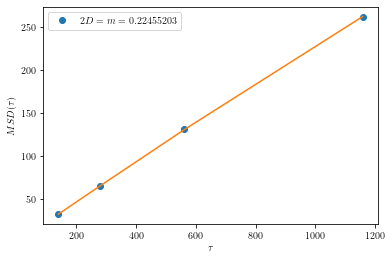

In [77]:
diff1 = MSD_tau[len(MSD_tau)-4:]

diff2 = t_steps[len(t_steps)-4:]

z = np.polyfit(diff1, diff2, 1)

print(z)

plt.plot(diff1,diff2,"o",label ="$2D = m = 0.22455203$")
plt.xlabel("$\\tau$")
plt.ylabel("$MSD(\\tau)$")
plt.legend()
plt.plot(diff1,diff2,"-")

In [62]:
r_short_range = np.zeros(shape=(10**5,N,2))
for t in range(len(r_short_range)-1):
    r_short_range[t] = rabs[t]


In [78]:
r_short_range[1]

array([[ 0.39999352, 10.39999206],
       [ 1.19998369, 10.39999933],
       [ 2.00001813, 10.40001151],
       [ 2.80000253, 10.39998641],
       [ 3.59998406, 10.40000149],
       [ 4.40000475, 10.40001433],
       [ 5.19999671, 10.39999368],
       [ 6.0000096 , 10.39998414],
       [ 6.79999263, 10.40001592],
       [ 7.60001   , 10.4000003 ],
       [ 8.40000471, 10.40001025],
       [ 9.19999807, 10.40000848],
       [10.00000705, 10.40001336],
       [10.79999292, 10.40000008],
       [11.59998816, 10.4000123 ],
       [12.40001045, 10.4000075 ],
       [13.19998799, 10.39999252],
       [14.00000229, 10.39998254],
       [14.79999897, 10.40000184],
       [15.599982  , 10.39999322],
       [16.40000656, 10.40000853],
       [17.20000548, 10.40000805],
       [17.99997995, 10.3999858 ],
       [18.79998695, 10.3999912 ],
       [19.59999462, 10.40000775],
       [ 0.39998526, 11.20001821],
       [ 1.20001841, 11.20001611],
       [ 2.00001685, 11.19999474],
       [ 2.80000095,

In [83]:
setup()
integrate_motion()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [85]:
r_long_range = np.zeros(shape=(10**6,N,2))
for t in range(len(r_long_range)-1):
    r_long_range[t] = rabs[t]


In [120]:
def MSD(tau,mode):
    sumdeltar =count = span = 0
    n = 0
    t = 0
    short_time_steps = 0
    long_time_steps = 0
    print(tau)

    if mode == "short":
        span = 100
        n = int(tau/(dt*10**(-2)))
        if n >= 10**5-1:
            n = n - 10
        short_time_steps = 10**5
        while t < short_time_steps-n:
            sumdeltar += np.mean((r_short_range[t+n,:,0] - r_short_range[t,:,0])**2 + (r_short_range[t+n,:,1] - r_short_range[t,:,1])**2)
            count += 1
            t += span
    else:
        span = 10000
        n = int(tau/dt)
        if n >= 10**6:
            n = n - 10       
        long_time_steps = 10**6
        while t < long_time_steps-n:
            sumdeltar += np.mean((r_long_range[t+n,:,0] - r_long_range[t,:,0])**2 + (r_long_range[t+n,:,1] - r_long_range[t,:,1])**2)
            count += 1
            t += span
    return sumdeltar/count

MSD_tau = []
t_steps = []

dt_short = 10**(-5)
t = 1
tau = 0
total_time_steps = 10**8
while t < total_time_steps:
    if tau < 1:
        tau =  t * dt_short
        t_steps.append(tau)
        MSD_tau.append(MSD(tau,"short"))
        t += 100
    else:
        tau =  t * dt_short
        t_steps.append(tau)
        MSD_tau.append(MSD(tau,"long"))
        t += 10000

        
    


1e-05
0.00101
0.00201
0.00301
0.0040100000000000005
0.0050100000000000006
0.006010000000000001
0.007010000000000001
0.008010000000000001
0.00901
0.010010000000000002
0.01101
0.012010000000000002
0.01301
0.014010000000000002
0.01501
0.01601
0.01701
0.01801
0.019010000000000003
0.02001
0.02101
0.022010000000000002
0.023010000000000003
0.024010000000000004
0.02501
0.026010000000000002
0.027010000000000003
0.028010000000000004
0.02901
0.030010000000000002
0.031010000000000003
0.032010000000000004
0.033010000000000005
0.034010000000000006
0.03501
0.03601
0.03701
0.03801
0.03901
0.040010000000000004
0.041010000000000005
0.042010000000000006
0.04301000000000001
0.04401
0.04501
0.04601
0.04701
0.048010000000000004
0.049010000000000005
0.050010000000000006
0.05101000000000001
0.05201000000000001
0.05301
0.05401
0.05501
0.056010000000000004
0.057010000000000005
0.058010000000000006
0.05901000000000001
0.06001000000000001
0.06101
0.06201
0.06301000000000001
0.06401000000000001
0.06501000000000001

0.57001
0.57101
0.57201
0.57301
0.57401
0.57501
0.57601
0.57701
0.57801
0.57901
0.58001
0.58101
0.58201
0.58301
0.58401
0.58501
0.58601
0.58701
0.58801
0.58901
0.59001
0.59101
0.59201
0.59301
0.59401
0.59501
0.59601
0.59701
0.59801
0.59901
0.60001
0.60101
0.60201
0.60301
0.60401
0.60501
0.60601
0.60701
0.60801
0.60901
0.61001
0.61101
0.61201
0.61301
0.6140100000000001
0.6150100000000001
0.6160100000000001
0.6170100000000001
0.6180100000000001
0.6190100000000001
0.6200100000000001
0.6210100000000001
0.6220100000000001
0.6230100000000001
0.6240100000000001
0.6250100000000001
0.6260100000000001
0.6270100000000001
0.6280100000000001
0.6290100000000001
0.6300100000000001
0.6310100000000001
0.6320100000000001
0.6330100000000001
0.6340100000000001
0.6350100000000001
0.6360100000000001
0.6370100000000001
0.6380100000000001
0.6390100000000001
0.6400100000000001
0.6410100000000001
0.6420100000000001
0.6430100000000001
0.6440100000000001
0.6450100000000001
0.6460100000000001
0.6470100000000001
0.

2.80101
2.81101
2.8210100000000002
2.83101
2.8410100000000003
2.85101
2.8610100000000003
2.87101
2.8810100000000003
2.89101
2.9010100000000003
2.91101
2.9210100000000003
2.93101
2.9410100000000003
2.95101
2.9610100000000004
2.97101
2.9810100000000004
2.99101
3.0010100000000004
3.01101
3.0210100000000004
3.03101
3.0410100000000004
3.05101
3.0610100000000005
3.0710100000000002
3.0810100000000005
3.0910100000000003
3.10101
3.1110100000000003
3.12101
3.1310100000000003
3.14101
3.1510100000000003
3.16101
3.1710100000000003
3.18101
3.1910100000000003
3.20101
3.2110100000000004
3.22101
3.2310100000000004
3.24101
3.2510100000000004
3.26101
3.2710100000000004
3.28101
3.2910100000000004
3.30101
3.3110100000000005
3.3210100000000002
3.3310100000000005
3.3410100000000003
3.3510100000000005
3.3610100000000003
3.37101
3.3810100000000003
3.39101
3.4010100000000003
3.41101
3.4210100000000003
3.43101
3.4410100000000003
3.45101
3.4610100000000004
3.47101
3.4810100000000004
3.49101
3.5010100000000004
3.5

8.84101
8.85101
8.86101
8.87101
8.88101
8.891010000000001
8.901010000000001
8.911010000000001
8.92101
8.93101
8.94101
8.95101
8.96101
8.971010000000001
8.981010000000001
8.991010000000001
9.00101
9.01101
9.02101
9.03101
9.04101
9.051010000000002
9.061010000000001
9.071010000000001
9.081010000000001
9.09101
9.10101
9.11101
9.12101
9.131010000000002
9.141010000000001
9.151010000000001
9.161010000000001
9.17101
9.18101
9.19101
9.20101
9.21101
9.221010000000001
9.231010000000001
9.241010000000001
9.25101
9.26101
9.27101
9.28101
9.29101
9.301010000000002
9.311010000000001
9.321010000000001
9.331010000000001
9.34101
9.35101
9.36101
9.37101
9.381010000000002
9.391010000000001
9.401010000000001
9.411010000000001
9.42101
9.43101
9.44101
9.45101
9.46101
9.471010000000001
9.481010000000001
9.491010000000001
9.50101
9.51101
9.52101
9.53101
9.54101
9.551010000000002
9.561010000000001
9.571010000000001
9.581010000000001
9.59101
9.60101
9.61101
9.62101
9.631010000000002
9.641010000000001
9.6510100000

14.611010000000002
14.621010000000002
14.631010000000002
14.641010000000001
14.651010000000001
14.661010000000001
14.67101
14.68101
14.69101
14.701010000000002
14.711010000000002
14.721010000000001
14.731010000000001
14.741010000000001
14.75101
14.76101
14.77101
14.781010000000002
14.791010000000002
14.801010000000002
14.811010000000001
14.821010000000001
14.831010000000001
14.84101
14.85101
14.861010000000002
14.871010000000002
14.881010000000002
14.891010000000001
14.901010000000001
14.911010000000001
14.92101
14.93101
14.94101
14.951010000000002
14.961010000000002
14.971010000000001
14.981010000000001
14.991010000000001
15.00101
15.01101
15.02101
15.031010000000002
15.041010000000002
15.051010000000002
15.061010000000001
15.071010000000001
15.081010000000001
15.09101
15.10101
15.111010000000002
15.121010000000002
15.131010000000002
15.141010000000001
15.151010000000001
15.161010000000001
15.17101
15.18101
15.191010000000002
15.201010000000002
15.211010000000002
15.221010000000001
15

20.57101
20.581010000000003
20.59101
20.601010000000002
20.61101
20.621010000000002
20.631010000000003
20.64101
20.651010000000003
20.66101
20.671010000000003
20.68101
20.691010000000002
20.70101
20.71101
20.721010000000003
20.73101
20.741010000000003
20.75101
20.761010000000002
20.77101
20.781010000000002
20.79101
20.80101
20.811010000000003
20.82101
20.831010000000003
20.84101
20.851010000000002
20.86101
20.871010000000002
20.881010000000003
20.89101
20.901010000000003
20.91101
20.921010000000003
20.93101
20.941010000000002
20.95101
20.96101
20.971010000000003
20.98101
20.991010000000003
21.00101
21.011010000000002
21.02101
21.031010000000002
21.04101
21.05101
21.061010000000003
21.07101
21.081010000000003
21.09101
21.101010000000002
21.11101
21.121010000000002
21.131010000000003
21.14101
21.151010000000003
21.16101
21.171010000000003
21.18101
21.191010000000002
21.20101
21.21101
21.221010000000003
21.23101
21.241010000000003
21.25101
21.261010000000002
21.27101
21.281010000000002
21

26.39101
26.401010000000003
26.41101
26.421010000000003
26.43101
26.441010000000002
26.451010000000004
26.46101
26.471010000000003
26.48101
26.491010000000003
26.50101
26.511010000000002
26.52101
26.531010000000002
26.541010000000004
26.55101
26.561010000000003
26.57101
26.581010000000003
26.59101
26.601010000000002
26.611010000000004
26.621010000000002
26.631010000000003
26.64101
26.651010000000003
26.66101
26.671010000000003
26.68101
26.691010000000002
26.701010000000004
26.71101
26.721010000000003
26.73101
26.741010000000003
26.75101
26.761010000000002
26.77101
26.781010000000002
26.791010000000004
26.80101
26.811010000000003
26.82101
26.831010000000003
26.84101
26.851010000000002
26.861010000000004
26.871010000000002
26.881010000000003
26.89101
26.901010000000003
26.91101
26.921010000000003
26.93101
26.941010000000002
26.951010000000004
26.96101
26.971010000000003
26.98101
26.991010000000003
27.00101
27.011010000000002
27.021010000000004
27.031010000000002
27.041010000000004
27.051

32.40101
32.411010000000005
32.42101
32.43101
32.441010000000006
32.451010000000004
32.46101
32.47101
32.481010000000005
32.49101
32.50101
32.511010000000006
32.521010000000004
32.53101
32.54101
32.551010000000005
32.56101
32.57101
32.58101
32.591010000000004
32.60101
32.61101
32.621010000000005
32.63101
32.64101
32.65101
32.661010000000005
32.67101
32.68101
32.691010000000006
32.701010000000004
32.71101
32.72101
32.731010000000005
32.74101
32.75101
32.761010000000006
32.771010000000004
32.78101
32.79101
32.801010000000005
32.81101
32.82101
32.83101
32.841010000000004
32.85101
32.86101
32.871010000000005
32.88101
32.89101
32.90101
32.911010000000005
32.92101
32.93101
32.941010000000006
32.951010000000004
32.96101
32.97101
32.981010000000005
32.99101
33.00101
33.011010000000006
33.021010000000004
33.03101
33.04101
33.051010000000005
33.06101
33.07101
33.081010000000006
33.091010000000004
33.10101
33.11101
33.121010000000005
33.13101
33.14101
33.15101
33.161010000000005
33.17101
33.18101

39.15101000000001
39.161010000000005
39.17101
39.18101
39.191010000000006
39.201010000000004
39.21101
39.22101
39.231010000000005
39.24101
39.25101
39.261010000000006
39.271010000000004
39.28101
39.29101
39.301010000000005
39.31101
39.32101
39.331010000000006
39.341010000000004
39.35101
39.36101
39.371010000000005
39.38101
39.39101
39.40101000000001
39.411010000000005
39.42101
39.43101
39.441010000000006
39.451010000000004
39.46101
39.47101
39.481010000000005
39.49101
39.50101
39.511010000000006
39.521010000000004
39.53101
39.54101
39.551010000000005
39.56101
39.57101
39.581010000000006
39.591010000000004
39.60101
39.61101
39.621010000000005
39.63101
39.64101
39.65101000000001
39.661010000000005
39.67101
39.68101
39.691010000000006
39.701010000000004
39.71101
39.72101
39.731010000000005
39.74101
39.75101
39.761010000000006
39.771010000000004
39.78101
39.79101
39.801010000000005
39.81101
39.82101
39.831010000000006
39.841010000000004
39.85101
39.86101
39.871010000000005
39.88101
39.8910

45.091010000000004
45.10101
45.11101
45.121010000000005
45.13101
45.14101
45.15101000000001
45.161010000000005
45.17101
45.18101
45.191010000000006
45.201010000000004
45.21101
45.22101000000001
45.231010000000005
45.24101
45.25101
45.261010000000006
45.271010000000004
45.28101
45.29101000000001
45.301010000000005
45.31101
45.32101
45.331010000000006
45.341010000000004
45.35101
45.36101
45.371010000000005
45.38101
45.39101
45.40101000000001
45.411010000000005
45.42101
45.43101
45.441010000000006
45.451010000000004
45.46101
45.47101000000001
45.481010000000005
45.49101
45.50101
45.511010000000006
45.521010000000004
45.53101
45.54101000000001
45.551010000000005
45.56101
45.57101
45.581010000000006
45.591010000000004
45.60101
45.61101
45.621010000000005
45.63101
45.64101
45.65101000000001
45.661010000000005
45.67101
45.68101
45.691010000000006
45.701010000000004
45.71101
45.72101000000001
45.731010000000005
45.74101
45.75101
45.761010000000006
45.771010000000004
45.78101
45.79101000000001


50.86101000000001
50.871010000000005
50.88101
50.89101
50.90101000000001
50.911010000000005
50.92101
50.93101000000001
50.941010000000006
50.951010000000004
50.96101
50.97101000000001
50.981010000000005
50.99101
51.00101
51.011010000000006
51.021010000000004
51.03101
51.04101000000001
51.051010000000005
51.06101
51.07101
51.081010000000006
51.091010000000004
51.10101
51.11101000000001
51.121010000000005
51.13101
51.14101
51.15101000000001
51.161010000000005
51.17101
51.18101000000001
51.191010000000006
51.201010000000004
51.21101
51.22101000000001
51.231010000000005
51.24101
51.25101
51.261010000000006
51.271010000000004
51.28101
51.29101000000001
51.301010000000005
51.31101
51.32101
51.331010000000006
51.341010000000004
51.35101
51.36101000000001
51.371010000000005
51.38101
51.39101
51.40101000000001
51.411010000000005
51.42101
51.43101000000001
51.441010000000006
51.451010000000004
51.46101
51.47101000000001
51.481010000000005
51.49101
51.50101
51.511010000000006
51.521010000000004
5

56.441010000000006
56.451010000000004
56.46101
56.47101000000001
56.481010000000005
56.49101
56.50101000000001
56.511010000000006
56.521010000000004
56.53101
56.54101000000001
56.551010000000005
56.56101
56.57101
56.581010000000006
56.591010000000004
56.60101
56.61101000000001
56.621010000000005
56.63101
56.64101
56.65101000000001
56.661010000000005
56.67101
56.68101000000001
56.691010000000006
56.701010000000004
56.71101
56.72101000000001
56.731010000000005
56.74101
56.75101000000001
56.761010000000006
56.771010000000004
56.78101
56.79101000000001
56.801010000000005
56.81101
56.82101
56.831010000000006
56.841010000000004
56.85101
56.86101000000001
56.871010000000005
56.88101
56.89101
56.90101000000001
56.911010000000005
56.92101
56.93101000000001
56.941010000000006
56.951010000000004
56.96101
56.97101000000001
56.981010000000005
56.99101
57.00101000000001
57.011010000000006
57.021010000000004
57.03101
57.04101000000001
57.051010000000005
57.06101
57.07101
57.081010000000006
57.0910100

61.771010000000004
61.78101
61.79101000000001
61.801010000000005
61.81101
61.82101000000001
61.831010000000006
61.841010000000004
61.85101
61.86101000000001
61.871010000000005
61.88101
61.89101000000001
61.90101000000001
61.911010000000005
61.92101
61.93101000000001
61.941010000000006
61.951010000000004
61.96101
61.97101000000001
61.981010000000005
61.99101
62.00101000000001
62.011010000000006
62.021010000000004
62.03101
62.04101000000001
62.051010000000005
62.06101
62.07101000000001
62.081010000000006
62.091010000000004
62.10101
62.11101000000001
62.121010000000005
62.13101
62.14101000000001
62.15101000000001
62.161010000000005
62.17101
62.18101000000001
62.191010000000006
62.201010000000004
62.21101
62.22101000000001
62.231010000000005
62.24101
62.25101000000001
62.261010000000006
62.271010000000004
62.28101
62.29101000000001
62.301010000000005
62.31101
62.32101000000001
62.331010000000006
62.341010000000004
62.35101
62.36101000000001
62.371010000000005
62.38101
62.39101000000001
62.

67.88101
67.89101000000001
67.90101
67.91101
67.92101000000001
67.93101
67.94101
67.95101000000001
67.96101
67.97101
67.98101000000001
67.99101
68.00101000000001
68.01101
68.02101
68.03101000000001
68.04101
68.05101
68.06101000000001
68.07101
68.08101
68.09101000000001
68.10101
68.11101000000001
68.12101000000001
68.13101
68.14101000000001
68.15101
68.16101
68.17101000000001
68.18101
68.19101
68.20101000000001
68.21101
68.22101
68.23101000000001
68.24101
68.25101000000001
68.26101
68.27101
68.28101000000001
68.29101
68.30101
68.31101000000001
68.32101
68.33101
68.34101000000001
68.35101
68.36101000000001
68.37101000000001
68.38101
68.39101000000001
68.40101
68.41101
68.42101000000001
68.43101
68.44101
68.45101000000001
68.46101
68.47101
68.48101000000001
68.49101
68.50101000000001
68.51101
68.52101
68.53101000000001
68.54101
68.55101
68.56101000000001
68.57101
68.58101
68.59101000000001
68.60101
68.61101000000001
68.62101000000001
68.63101
68.64101000000001
68.65101
68.66101
68.6710100

74.37101000000001
74.38101
74.39101000000001
74.40101
74.41101
74.42101000000001
74.43101
74.44101
74.45101000000001
74.46101
74.47101
74.48101000000001
74.49101
74.50101000000001
74.51101000000001
74.52101
74.53101000000001
74.54101
74.55101
74.56101000000001
74.57101
74.58101
74.59101000000001
74.60101
74.61101000000001
74.62101000000001
74.63101
74.64101000000001
74.65101
74.66101
74.67101000000001
74.68101
74.69101
74.70101000000001
74.71101
74.72101
74.73101000000001
74.74101
74.75101000000001
74.76101000000001
74.77101
74.78101000000001
74.79101
74.80101
74.81101000000001
74.82101
74.83101
74.84101000000001
74.85101
74.86101000000001
74.87101000000001
74.88101
74.89101000000001
74.90101
74.91101
74.92101000000001
74.93101
74.94101
74.95101000000001
74.96101
74.97101
74.98101000000001
74.99101
75.00101000000001
75.01101000000001
75.02101
75.03101000000001
75.04101
75.05101
75.06101000000001
75.07101
75.08101
75.09101000000001
75.10101
75.11101000000001
75.12101000000001
75.13101
7

80.92101000000001
80.93101
80.94101
80.95101000000001
80.96101
80.97101
80.98101000000001
80.99101
81.00101000000001
81.01101000000001
81.02101
81.03101000000001
81.04101
81.05101
81.06101000000001
81.07101
81.08101
81.09101000000001
81.10101
81.11101000000001
81.12101000000001
81.13101
81.14101000000001
81.15101000000001
81.16101
81.17101000000001
81.18101
81.19101
81.20101000000001
81.21101
81.22101
81.23101000000001
81.24101
81.25101000000001
81.26101000000001
81.27101
81.28101000000001
81.29101
81.30101
81.31101000000001
81.32101
81.33101
81.34101000000001
81.35101
81.36101000000001
81.37101000000001
81.38101
81.39101000000001
81.40101000000001
81.41101
81.42101000000001
81.43101
81.44101
81.45101000000001
81.46101
81.47101
81.48101000000001
81.49101
81.50101000000001
81.51101000000001
81.52101
81.53101000000001
81.54101
81.55101
81.56101000000001
81.57101
81.58101
81.59101000000001
81.60101
81.61101000000001
81.62101000000001
81.63101
81.64101000000001
81.65101000000001
81.66101
8

87.16101
87.17101000000001
87.18101
87.19101
87.20101000000001
87.21101
87.22101
87.23101000000001
87.24101
87.25101000000001
87.26101000000001
87.27101
87.28101000000001
87.29101000000001
87.30101
87.31101000000001
87.32101
87.33101
87.34101000000001
87.35101
87.36101000000001
87.37101000000001
87.38101
87.39101000000001
87.40101000000001
87.41101
87.42101000000001
87.43101
87.44101
87.45101000000001
87.46101
87.47101
87.48101000000001
87.49101
87.50101000000001
87.51101000000001
87.52101
87.53101000000001
87.54101000000001
87.55101
87.56101000000001
87.57101
87.58101
87.59101000000001
87.60101
87.61101000000001
87.62101000000001
87.63101
87.64101000000001
87.65101000000001
87.66101
87.67101000000001
87.68101
87.69101
87.70101000000001
87.71101
87.72101
87.73101000000001
87.74101
87.75101000000001
87.76101000000001
87.77101
87.78101000000001
87.79101000000001
87.80101
87.81101000000001
87.82101
87.83101
87.84101000000001
87.85101
87.86101000000001
87.87101000000001
87.88101
87.8910100

93.67101000000001
93.68101
93.69101
93.70101000000001
93.71101
93.72101
93.73101000000001
93.74101
93.75101000000001
93.76101000000001
93.77101
93.78101000000001
93.79101000000001
93.80101
93.81101000000001
93.82101
93.83101
93.84101000000001
93.85101
93.86101000000001
93.87101000000001
93.88101
93.89101000000001
93.90101000000001
93.91101
93.92101000000001
93.93101000000001
93.94101
93.95101000000001
93.96101
93.97101
93.98101000000001
93.99101
94.00101000000001
94.01101000000001
94.02101
94.03101000000001
94.04101000000001
94.05101
94.06101000000001
94.07101
94.08101
94.09101000000001
94.10101
94.11101000000001
94.12101000000001
94.13101
94.14101000000001
94.15101000000001
94.16101
94.17101000000001
94.18101000000001
94.19101
94.20101000000001
94.21101
94.22101
94.23101000000001
94.24101
94.25101000000001
94.26101000000001
94.27101
94.28101000000001
94.29101000000001
94.30101
94.31101000000001
94.32101
94.33101
94.34101000000001
94.35101
94.36101000000001
94.37101000000001
94.38101
9

99.82101
99.83101
99.84101000000001
99.85101
99.86101000000001
99.87101000000001
99.88101
99.89101000000001
99.90101000000001
99.91101
99.92101000000001
99.93101000000001
99.94101
99.95101000000001
99.96101
99.97101
99.98101000000001
99.99101
100.00101000000001
100.01101000000001
100.02101
100.03101000000001
100.04101000000001
100.05101
100.06101000000001
100.07101
100.08101
100.09101000000001
100.10101
100.11101000000001
100.12101000000001
100.13101
100.14101000000001
100.15101000000001
100.16101
100.17101000000001
100.18101000000001
100.19101
100.20101000000001
100.21101
100.22101
100.23101000000001
100.24101
100.25101000000001
100.26101000000001
100.27101
100.28101000000001
100.29101000000001
100.30101
100.31101000000001
100.32101
100.33101
100.34101000000001
100.35101
100.36101000000001
100.37101000000001
100.38101
100.39101000000001
100.40101000000001
100.41101
100.42101000000001
100.43101000000001
100.44101
100.45101000000001
100.46101
100.47101
100.48101000000001
100.49101
100.5

105.43101000000001
105.44101
105.45101000000001
105.46101
105.47101
105.48101000000001
105.49101
105.50101000000001
105.51101000000001
105.52101
105.53101000000001
105.54101000000001
105.55101
105.56101000000001
105.57101000000002
105.58101
105.59101000000001
105.60101
105.61101000000001
105.62101000000001
105.63101
105.64101000000001
105.65101000000001
105.66101
105.67101000000001
105.68101000000001
105.69101
105.70101000000001
105.71101
105.72101
105.73101000000001
105.74101
105.75101000000001
105.76101000000001
105.77101
105.78101000000001
105.79101000000001
105.80101
105.81101000000001
105.82101000000002
105.83101
105.84101000000001
105.85101
105.86101000000001
105.87101000000001
105.88101
105.89101000000001
105.90101000000001
105.91101
105.92101000000001
105.93101000000001
105.94101
105.95101000000001
105.96101
105.97101
105.98101000000001
105.99101
106.00101000000001
106.01101000000001
106.02101
106.03101000000001
106.04101000000001
106.05101
106.06101000000001
106.07101000000002

110.86101000000001
110.87101000000001
110.88101
110.89101000000001
110.90101000000001
110.91101
110.92101000000001
110.93101000000001
110.94101
110.95101000000001
110.96101000000002
110.97101
110.98101000000001
110.99101
111.00101000000001
111.01101000000001
111.02101
111.03101000000001
111.04101000000001
111.05101
111.06101000000001
111.07101000000002
111.08101
111.09101000000001
111.10101
111.11101000000001
111.12101000000001
111.13101
111.14101000000001
111.15101000000001
111.16101
111.17101000000001
111.18101000000001
111.19101
111.20101000000001
111.21101000000002
111.22101
111.23101000000001
111.24101
111.25101000000001
111.26101000000001
111.27101
111.28101000000001
111.29101000000001
111.30101
111.31101000000001
111.32101000000002
111.33101
111.34101000000001
111.35101
111.36101000000001
111.37101000000001
111.38101
111.39101000000001
111.40101000000001
111.41101
111.42101000000001
111.43101000000001
111.44101
111.45101000000001
111.46101000000002
111.47101
111.48101000000001
1

116.17101000000001
116.18101000000001
116.19101
116.20101000000001
116.21101000000002
116.22101
116.23101000000001
116.24101
116.25101000000001
116.26101000000001
116.27101
116.28101000000001
116.29101000000001
116.30101
116.31101000000001
116.32101000000002
116.33101
116.34101000000001
116.35101000000002
116.36101000000001
116.37101000000001
116.38101
116.39101000000001
116.40101000000001
116.41101
116.42101000000001
116.43101000000001
116.44101
116.45101000000001
116.46101000000002
116.47101
116.48101000000001
116.49101
116.50101000000001
116.51101000000001
116.52101
116.53101000000001
116.54101000000001
116.55101
116.56101000000001
116.57101000000002
116.58101
116.59101000000001
116.60101000000002
116.61101000000001
116.62101000000001
116.63101
116.64101000000001
116.65101000000001
116.66101
116.67101000000001
116.68101000000001
116.69101
116.70101000000001
116.71101000000002
116.72101
116.73101000000001
116.74101
116.75101000000001
116.76101000000001
116.77101
116.78101000000001
11

121.27101
121.28101000000001
121.29101000000001
121.30101
121.31101000000001
121.32101000000002
121.33101
121.34101000000001
121.35101000000002
121.36101000000001
121.37101000000001
121.38101
121.39101000000001
121.40101000000001
121.41101
121.42101000000001
121.43101000000001
121.44101
121.45101000000001
121.46101000000002
121.47101
121.48101000000001
121.49101
121.50101000000001
121.51101000000001
121.52101
121.53101000000001
121.54101000000001
121.55101
121.56101000000001
121.57101000000002
121.58101
121.59101000000001
121.60101000000002
121.61101000000001
121.62101000000001
121.63101
121.64101000000001
121.65101000000001
121.66101
121.67101000000001
121.68101000000001
121.69101
121.70101000000001
121.71101000000002
121.72101
121.73101000000001
121.74101000000002
121.75101000000001
121.76101000000001
121.77101
121.78101000000001
121.79101000000001
121.80101
121.81101000000001
121.82101000000002
121.83101
121.84101000000001
121.85101000000002
121.86101000000001
121.87101000000001
121

126.52101
126.53101000000001
126.54101000000001
126.55101
126.56101000000001
126.57101000000002
126.58101
126.59101000000001
126.60101000000002
126.61101000000001
126.62101000000001
126.63101
126.64101000000001
126.65101000000001
126.66101
126.67101000000001
126.68101000000001
126.69101
126.70101000000001
126.71101000000002
126.72101
126.73101000000001
126.74101000000002
126.75101000000001
126.76101000000001
126.77101
126.78101000000001
126.79101000000001
126.80101
126.81101000000001
126.82101000000002
126.83101
126.84101000000001
126.85101000000002
126.86101000000001
126.87101000000001
126.88101
126.89101000000001
126.90101000000001
126.91101
126.92101000000001
126.93101000000001
126.94101
126.95101000000001
126.96101000000002
126.97101
126.98101000000001
126.99101000000002
127.00101000000001
127.01101000000001
127.02101
127.03101000000001
127.04101000000001
127.05101
127.06101000000001
127.07101000000002
127.08101
127.09101000000001
127.10101000000002
127.11101000000001
127.121010000

132.34101
132.35101
132.36101000000002
132.37101
132.38101
132.39101000000002
132.40101
132.41101
132.42101000000002
132.43101000000001
132.44101
132.45101000000003
132.46101000000002
132.47101
132.48101
132.49101000000002
132.50101
132.51101
132.52101000000002
132.53101
132.54101
132.55101000000002
132.56101
132.57101
132.58101000000002
132.59101
132.60101
132.61101000000002
132.62101
132.63101
132.64101000000002
132.65101
132.66101
132.67101000000002
132.68101000000001
132.69101
132.70101000000003
132.71101000000002
132.72101
132.73101
132.74101000000002
132.75101
132.76101
132.77101000000002
132.78101
132.79101
132.80101000000002
132.81101
132.82101
132.83101000000002
132.84101
132.85101
132.86101000000002
132.87101
132.88101
132.89101000000002
132.90101
132.91101
132.92101000000002
132.93101000000001
132.94101
132.95101000000003
132.96101000000002
132.97101
132.98101
132.99101000000002
133.00101
133.01101
133.02101000000002
133.03101
133.04101
133.05101000000002
133.06101
133.07101

138.43101000000001
138.44101
138.45101000000003
138.46101000000002
138.47101
138.48101
138.49101000000002
138.50101
138.51101
138.52101000000002
138.53101
138.54101
138.55101000000002
138.56101
138.57101
138.58101000000002
138.59101
138.60101
138.61101000000002
138.62101
138.63101
138.64101000000002
138.65101
138.66101
138.67101000000002
138.68101000000001
138.69101
138.70101000000003
138.71101000000002
138.72101
138.73101
138.74101000000002
138.75101
138.76101
138.77101000000002
138.78101
138.79101
138.80101000000002
138.81101
138.82101
138.83101000000002
138.84101
138.85101
138.86101000000002
138.87101
138.88101
138.89101000000002
138.90101
138.91101
138.92101000000002
138.93101000000001
138.94101
138.95101000000003
138.96101000000002
138.97101
138.98101
138.99101000000002
139.00101
139.01101
139.02101000000002
139.03101
139.04101
139.05101000000002
139.06101
139.07101
139.08101000000002
139.09101
139.10101
139.11101000000002
139.12101
139.13101
139.14101000000002
139.15101
139.16101

144.62101
144.63101
144.64101000000002
144.65101
144.66101
144.67101000000002
144.68101000000001
144.69101
144.70101000000003
144.71101000000002
144.72101
144.73101
144.74101000000002
144.75101
144.76101
144.77101000000002
144.78101
144.79101
144.80101000000002
144.81101
144.82101
144.83101000000002
144.84101
144.85101
144.86101000000002
144.87101
144.88101
144.89101000000002
144.90101
144.91101
144.92101000000002
144.93101000000001
144.94101
144.95101000000003
144.96101000000002
144.97101
144.98101
144.99101000000002
145.00101
145.01101
145.02101000000002
145.03101
145.04101
145.05101000000002
145.06101
145.07101
145.08101000000002
145.09101
145.10101
145.11101000000002
145.12101
145.13101
145.14101000000002
145.15101
145.16101
145.17101000000002
145.18101000000001
145.19101
145.20101000000003
145.21101000000002
145.22101
145.23101
145.24101000000002
145.25101
145.26101
145.27101000000002
145.28101
145.29101
145.30101000000002
145.31101
145.32101
145.33101000000002
145.34101
145.35101

150.59101
150.60101
150.61101000000002
150.62101
150.63101
150.64101000000002
150.65101
150.66101
150.67101000000002
150.68101000000001
150.69101
150.70101000000003
150.71101000000002
150.72101
150.73101000000003
150.74101000000002
150.75101
150.76101
150.77101000000002
150.78101
150.79101
150.80101000000002
150.81101
150.82101
150.83101000000002
150.84101
150.85101
150.86101000000002
150.87101
150.88101
150.89101000000002
150.90101
150.91101
150.92101000000002
150.93101000000001
150.94101
150.95101000000003
150.96101000000002
150.97101
150.98101000000003
150.99101000000002
151.00101
151.01101
151.02101000000002
151.03101
151.04101
151.05101000000002
151.06101
151.07101
151.08101000000002
151.09101
151.10101
151.11101000000002
151.12101
151.13101
151.14101000000002
151.15101
151.16101
151.17101000000002
151.18101000000001
151.19101
151.20101000000003
151.21101000000002
151.22101
151.23101000000003
151.24101000000002
151.25101
151.26101
151.27101000000002
151.28101
151.29101
151.3010100

156.57101
156.58101000000002
156.59101
156.60101
156.61101000000002
156.62101
156.63101
156.64101000000002
156.65101
156.66101
156.67101000000002
156.68101000000001
156.69101
156.70101000000003
156.71101000000002
156.72101
156.73101000000003
156.74101000000002
156.75101
156.76101
156.77101000000002
156.78101
156.79101
156.80101000000002
156.81101
156.82101
156.83101000000002
156.84101
156.85101
156.86101000000002
156.87101
156.88101
156.89101000000002
156.90101
156.91101
156.92101000000002
156.93101000000001
156.94101
156.95101000000003
156.96101000000002
156.97101
156.98101000000003
156.99101000000002
157.00101
157.01101
157.02101000000002
157.03101
157.04101
157.05101000000002
157.06101
157.07101
157.08101000000002
157.09101
157.10101
157.11101000000002
157.12101
157.13101
157.14101000000002
157.15101
157.16101
157.17101000000002
157.18101000000001
157.19101
157.20101000000003
157.21101000000002
157.22101
157.23101000000003
157.24101000000002
157.25101
157.26101
157.27101000000002
15

162.56101
162.57101
162.58101000000002
162.59101
162.60101
162.61101000000002
162.62101
162.63101
162.64101000000002
162.65101
162.66101
162.67101000000002
162.68101000000001
162.69101
162.70101000000003
162.71101000000002
162.72101
162.73101000000003
162.74101000000002
162.75101
162.76101000000003
162.77101000000002
162.78101
162.79101
162.80101000000002
162.81101
162.82101
162.83101000000002
162.84101
162.85101
162.86101000000002
162.87101
162.88101
162.89101000000002
162.90101
162.91101
162.92101000000002
162.93101000000001
162.94101
162.95101000000003
162.96101000000002
162.97101
162.98101000000003
162.99101000000002
163.00101
163.01101000000003
163.02101000000002
163.03101
163.04101
163.05101000000002
163.06101
163.07101
163.08101000000002
163.09101
163.10101
163.11101000000002
163.12101
163.13101
163.14101000000002
163.15101
163.16101
163.17101000000002
163.18101000000001
163.19101
163.20101000000003
163.21101000000002
163.22101
163.23101000000003
163.24101000000002
163.25101
163

168.41101
168.42101000000002
168.43101000000001
168.44101
168.45101000000003
168.46101000000002
168.47101
168.48101000000003
168.49101000000002
168.50101
168.51101000000003
168.52101000000002
168.53101
168.54101
168.55101000000002
168.56101
168.57101
168.58101000000002
168.59101
168.60101
168.61101000000002
168.62101
168.63101
168.64101000000002
168.65101
168.66101
168.67101000000002
168.68101000000001
168.69101
168.70101000000003
168.71101000000002
168.72101
168.73101000000003
168.74101000000002
168.75101
168.76101000000003
168.77101000000002
168.78101
168.79101
168.80101000000002
168.81101
168.82101
168.83101000000002
168.84101
168.85101
168.86101000000002
168.87101
168.88101
168.89101000000002
168.90101
168.91101
168.92101000000002
168.93101000000001
168.94101
168.95101000000003
168.96101000000002
168.97101
168.98101000000003
168.99101000000002
169.00101
169.01101000000003
169.02101000000002
169.03101
169.04101
169.05101000000002
169.06101
169.07101
169.08101000000002
169.09101
169.

174.13101
174.14101000000002
174.15101
174.16101
174.17101000000002
174.18101000000001
174.19101
174.20101000000003
174.21101000000002
174.22101
174.23101000000003
174.24101000000002
174.25101
174.26101000000003
174.27101000000002
174.28101
174.29101000000003
174.30101000000002
174.31101
174.32101
174.33101000000002
174.34101
174.35101
174.36101000000002
174.37101
174.38101
174.39101000000002
174.40101
174.41101
174.42101000000002
174.43101000000001
174.44101
174.45101000000003
174.46101000000002
174.47101
174.48101000000003
174.49101000000002
174.50101
174.51101000000003
174.52101000000002
174.53101
174.54101000000003
174.55101000000002
174.56101
174.57101
174.58101000000002
174.59101
174.60101
174.61101000000002
174.62101
174.63101
174.64101000000002
174.65101
174.66101
174.67101000000002
174.68101000000001
174.69101
174.70101000000003
174.71101000000002
174.72101
174.73101000000003
174.74101000000002
174.75101
174.76101000000003
174.77101000000002
174.78101
174.79101000000003
174.80

179.80101000000002
179.81101
179.82101
179.83101000000002
179.84101
179.85101
179.86101000000002
179.87101
179.88101
179.89101000000002
179.90101
179.91101
179.92101000000002
179.93101000000001
179.94101
179.95101000000003
179.96101000000002
179.97101
179.98101000000003
179.99101000000002
180.00101
180.01101000000003
180.02101000000002
180.03101
180.04101000000003
180.05101000000002
180.06101
180.07101
180.08101000000002
180.09101
180.10101
180.11101000000002
180.12101
180.13101
180.14101000000002
180.15101
180.16101
180.17101000000002
180.18101000000001
180.19101
180.20101000000003
180.21101000000002
180.22101
180.23101000000003
180.24101000000002
180.25101
180.26101000000003
180.27101000000002
180.28101
180.29101000000003
180.30101000000002
180.31101
180.32101
180.33101000000002
180.34101
180.35101
180.36101000000002
180.37101
180.38101
180.39101000000002
180.40101
180.41101
180.42101000000002
180.43101000000001
180.44101
180.45101000000003
180.46101000000002
180.47101
180.4810100000

185.40101
185.41101
185.42101000000002
185.43101000000001
185.44101
185.45101000000003
185.46101000000002
185.47101
185.48101000000003
185.49101000000002
185.50101
185.51101000000003
185.52101000000002
185.53101
185.54101000000003
185.55101000000002
185.56101
185.57101
185.58101000000002
185.59101
185.60101
185.61101000000002
185.62101
185.63101
185.64101000000002
185.65101
185.66101
185.67101000000002
185.68101000000001
185.69101
185.70101000000003
185.71101000000002
185.72101
185.73101000000003
185.74101000000002
185.75101
185.76101000000003
185.77101000000002
185.78101
185.79101000000003
185.80101000000002
185.81101
185.82101
185.83101000000002
185.84101
185.85101
185.86101000000002
185.87101
185.88101
185.89101000000002
185.90101
185.91101
185.92101000000002
185.93101000000001
185.94101
185.95101000000003
185.96101000000002
185.97101
185.98101000000003
185.99101000000002
186.00101
186.01101000000003
186.02101000000002
186.03101
186.04101000000003
186.05101000000002
186.06101
186.07

191.06101
191.07101000000003
191.08101000000002
191.09101
191.10101
191.11101000000002
191.12101
191.13101
191.14101000000002
191.15101
191.16101
191.17101000000002
191.18101000000001
191.19101
191.20101000000003
191.21101000000002
191.22101
191.23101000000003
191.24101000000002
191.25101
191.26101000000003
191.27101000000002
191.28101
191.29101000000003
191.30101000000002
191.31101
191.32101000000003
191.33101000000002
191.34101
191.35101
191.36101000000002
191.37101
191.38101
191.39101000000002
191.40101
191.41101
191.42101000000002
191.43101000000001
191.44101
191.45101000000003
191.46101000000002
191.47101
191.48101000000003
191.49101000000002
191.50101
191.51101000000003
191.52101000000002
191.53101
191.54101000000003
191.55101000000002
191.56101
191.57101000000003
191.58101000000002
191.59101
191.60101
191.61101000000002
191.62101
191.63101
191.64101000000002
191.65101
191.66101
191.67101000000002
191.68101000000001
191.69101
191.70101000000003
191.71101000000002
191.72101
191.73

196.71101000000002
196.72101
196.73101000000003
196.74101000000002
196.75101
196.76101000000003
196.77101000000002
196.78101
196.79101000000003
196.80101000000002
196.81101
196.82101000000003
196.83101000000002
196.84101
196.85101
196.86101000000002
196.87101
196.88101
196.89101000000002
196.90101
196.91101
196.92101000000002
196.93101000000001
196.94101
196.95101000000003
196.96101000000002
196.97101
196.98101000000003
196.99101000000002
197.00101
197.01101000000003
197.02101000000002
197.03101
197.04101000000003
197.05101000000002
197.06101
197.07101000000003
197.08101000000002
197.09101
197.10101
197.11101000000002
197.12101
197.13101
197.14101000000002
197.15101
197.16101
197.17101000000002
197.18101000000001
197.19101
197.20101000000003
197.21101000000002
197.22101
197.23101000000003
197.24101000000002
197.25101
197.26101000000003
197.27101000000002
197.28101
197.29101000000003
197.30101000000002
197.31101
197.32101000000003
197.33101000000002
197.34101
197.35101
197.3610100000000

202.31101
202.32101000000003
202.33101000000002
202.34101
202.35101000000003
202.36101000000002
202.37101
202.38101
202.39101000000002
202.40101
202.41101
202.42101000000002
202.43101000000001
202.44101
202.45101000000003
202.46101000000002
202.47101
202.48101000000003
202.49101000000002
202.50101
202.51101000000003
202.52101000000002
202.53101
202.54101000000003
202.55101000000002
202.56101
202.57101000000003
202.58101000000002
202.59101
202.60101000000003
202.61101000000002
202.62101
202.63101
202.64101000000002
202.65101
202.66101
202.67101000000002
202.68101000000001
202.69101
202.70101000000003
202.71101000000002
202.72101
202.73101000000003
202.74101000000002
202.75101
202.76101000000003
202.77101000000002
202.78101
202.79101000000003
202.80101000000002
202.81101
202.82101000000003
202.83101000000002
202.84101
202.85101000000003
202.86101000000002
202.87101
202.88101
202.89101000000002
202.90101
202.91101
202.92101000000002
202.93101000000001
202.94101
202.95101000000003
202.9610

207.78101
207.79101000000003
207.80101000000002
207.81101
207.82101000000003
207.83101000000002
207.84101
207.85101000000003
207.86101000000002
207.87101
207.88101
207.89101000000002
207.90101
207.91101
207.92101000000002
207.93101000000001
207.94101
207.95101000000003
207.96101000000002
207.97101
207.98101000000003
207.99101000000002
208.00101
208.01101000000003
208.02101000000002
208.03101
208.04101000000003
208.05101000000002
208.06101
208.07101000000003
208.08101000000002
208.09101
208.10101000000003
208.11101000000002
208.12101
208.13101
208.14101000000002
208.15101
208.16101
208.17101000000002
208.18101000000001
208.19101
208.20101000000003
208.21101000000002
208.22101
208.23101000000003
208.24101000000002
208.25101
208.26101000000003
208.27101000000002
208.28101
208.29101000000003
208.30101000000002
208.31101
208.32101000000003
208.33101000000002
208.34101
208.35101000000003
208.36101000000002
208.37101
208.38101
208.39101000000002
208.40101
208.41101
208.42101000000002
208.4310

213.26101000000003
213.27101000000002
213.28101
213.29101000000003
213.30101000000002
213.31101
213.32101000000003
213.33101000000002
213.34101
213.35101000000003
213.36101000000002
213.37101
213.38101
213.39101000000002
213.40101
213.41101
213.42101000000002
213.43101000000001
213.44101
213.45101000000003
213.46101000000002
213.47101
213.48101000000003
213.49101000000002
213.50101
213.51101000000003
213.52101000000002
213.53101
213.54101000000003
213.55101000000002
213.56101
213.57101000000003
213.58101000000002
213.59101
213.60101000000003
213.61101000000002
213.62101
213.63101
213.64101000000002
213.65101
213.66101
213.67101000000002
213.68101000000001
213.69101
213.70101000000003
213.71101000000002
213.72101
213.73101000000003
213.74101000000002
213.75101
213.76101000000003
213.77101000000002
213.78101
213.79101000000003
213.80101000000002
213.81101
213.82101000000003
213.83101000000002
213.84101
213.85101000000003
213.86101000000002
213.87101
213.88101
213.89101000000002
213.90101

218.63101000000003
218.64101000000002
218.65101
218.66101
218.67101000000002
218.68101000000001
218.69101
218.70101000000003
218.71101000000002
218.72101
218.73101000000003
218.74101000000002
218.75101
218.76101000000003
218.77101000000002
218.78101
218.79101000000003
218.80101000000002
218.81101
218.82101000000003
218.83101000000002
218.84101
218.85101000000003
218.86101000000002
218.87101
218.88101000000003
218.89101000000002
218.90101
218.91101
218.92101000000002
218.93101000000001
218.94101
218.95101000000003
218.96101000000002
218.97101
218.98101000000003
218.99101000000002
219.00101
219.01101000000003
219.02101000000002
219.03101
219.04101000000003
219.05101000000002
219.06101
219.07101000000003
219.08101000000002
219.09101
219.10101000000003
219.11101000000002
219.12101
219.13101000000003
219.14101000000002
219.15101
219.16101
219.17101000000002
219.18101000000001
219.19101
219.20101000000003
219.21101000000002
219.22101
219.23101000000003
219.24101000000002
219.25101
219.261010

223.91101
223.92101000000002
223.93101000000001
223.94101
223.95101000000003
223.96101000000002
223.97101
223.98101000000003
223.99101000000002
224.00101
224.01101000000003
224.02101000000002
224.03101
224.04101000000003
224.05101000000002
224.06101
224.07101000000003
224.08101000000002
224.09101
224.10101000000003
224.11101000000002
224.12101
224.13101000000003
224.14101000000002
224.15101
224.16101
224.17101000000002
224.18101000000001
224.19101
224.20101000000003
224.21101000000002
224.22101
224.23101000000003
224.24101000000002
224.25101
224.26101000000003
224.27101000000002
224.28101
224.29101000000003
224.30101000000002
224.31101
224.32101000000003
224.33101000000002
224.34101
224.35101000000003
224.36101000000002
224.37101
224.38101000000003
224.39101000000002
224.40101
224.41101
224.42101000000002
224.43101000000001
224.44101
224.45101000000003
224.46101000000002
224.47101
224.48101000000003
224.49101000000002
224.50101
224.51101000000003
224.52101000000002
224.53101
224.541010

229.23101000000003
229.24101000000002
229.25101
229.26101000000003
229.27101000000002
229.28101
229.29101000000003
229.30101000000002
229.31101
229.32101000000003
229.33101000000002
229.34101
229.35101000000003
229.36101000000002
229.37101
229.38101000000003
229.39101000000002
229.40101
229.41101000000003
229.42101000000002
229.43101000000001
229.44101
229.45101000000003
229.46101000000002
229.47101
229.48101000000003
229.49101000000002
229.50101
229.51101000000003
229.52101000000002
229.53101
229.54101000000003
229.55101000000002
229.56101
229.57101000000003
229.58101000000002
229.59101
229.60101000000003
229.61101000000002
229.62101
229.63101000000003
229.64101000000002
229.65101
229.66101000000003
229.67101000000002
229.68101000000001
229.69101
229.70101000000003
229.71101000000002
229.72101
229.73101000000003
229.74101000000002
229.75101
229.76101000000003
229.77101000000002
229.78101
229.79101000000003
229.80101000000002
229.81101
229.82101000000003
229.83101000000002
229.84101
22

234.38101000000003
234.39101000000002
234.40101
234.41101000000003
234.42101000000002
234.43101000000001
234.44101
234.45101000000003
234.46101000000002
234.47101
234.48101000000003
234.49101000000002
234.50101
234.51101000000003
234.52101000000002
234.53101
234.54101000000003
234.55101000000002
234.56101
234.57101000000003
234.58101000000002
234.59101
234.60101000000003
234.61101000000002
234.62101
234.63101000000003
234.64101000000002
234.65101
234.66101000000003
234.67101000000002
234.68101000000001
234.69101
234.70101000000003
234.71101000000002
234.72101
234.73101000000003
234.74101000000002
234.75101
234.76101000000003
234.77101000000002
234.78101
234.79101000000003
234.80101000000002
234.81101
234.82101000000003
234.83101000000002
234.84101
234.85101000000003
234.86101000000002
234.87101
234.88101000000003
234.89101000000002
234.90101
234.91101000000003
234.92101000000002
234.93101000000001
234.94101
234.95101000000003
234.96101000000002
234.97101
234.98101000000003
234.99101000

239.57101000000003
239.58101000000002
239.59101
239.60101000000003
239.61101000000002
239.62101
239.63101000000003
239.64101000000002
239.65101
239.66101000000003
239.67101000000002
239.68101000000001
239.69101
239.70101000000003
239.71101000000002
239.72101
239.73101000000003
239.74101000000002
239.75101
239.76101000000003
239.77101000000002
239.78101
239.79101000000003
239.80101000000002
239.81101
239.82101000000003
239.83101000000002
239.84101
239.85101000000003
239.86101000000002
239.87101
239.88101000000003
239.89101000000002
239.90101
239.91101000000003
239.92101000000002
239.93101000000001
239.94101
239.95101000000003
239.96101000000002
239.97101
239.98101000000003
239.99101000000002
240.00101
240.01101000000003
240.02101000000002
240.03101
240.04101000000003
240.05101000000002
240.06101
240.07101000000003
240.08101000000002
240.09101
240.10101000000003
240.11101000000002
240.12101
240.13101000000003
240.14101000000002
240.15101
240.16101000000003
240.17101000000002
240.18101000

244.78101
244.79101000000003
244.80101000000002
244.81101
244.82101000000003
244.83101000000002
244.84101
244.85101000000003
244.86101000000002
244.87101
244.88101000000003
244.89101000000002
244.90101
244.91101000000003
244.92101000000002
244.93101000000001
244.94101000000003
244.95101000000003
244.96101000000002
244.97101
244.98101000000003
244.99101000000002
245.00101
245.01101000000003
245.02101000000002
245.03101
245.04101000000003
245.05101000000002
245.06101
245.07101000000003
245.08101000000002
245.09101
245.10101000000003
245.11101000000002
245.12101
245.13101000000003
245.14101000000002
245.15101
245.16101000000003
245.17101000000002
245.18101000000001
245.19101000000003
245.20101000000003
245.21101000000002
245.22101
245.23101000000003
245.24101000000002
245.25101
245.26101000000003
245.27101000000002
245.28101
245.29101000000003
245.30101000000002
245.31101
245.32101000000003
245.33101000000002
245.34101
245.35101000000003
245.36101000000002
245.37101
245.38101000000003
245

249.93101000000001
249.94101000000003
249.95101000000003
249.96101000000002
249.97101
249.98101000000003
249.99101000000002
250.00101
250.01101000000003
250.02101000000002
250.03101
250.04101000000003
250.05101000000002
250.06101
250.07101000000003
250.08101000000002
250.09101
250.10101000000003
250.11101000000002
250.12101
250.13101000000003
250.14101000000002
250.15101
250.16101000000003
250.17101000000002
250.18101000000001
250.19101000000003
250.20101000000003
250.21101000000002
250.22101
250.23101000000003
250.24101000000002
250.25101
250.26101000000003
250.27101000000002
250.28101
250.29101000000003
250.30101000000002
250.31101
250.32101000000003
250.33101000000002
250.34101
250.35101000000003
250.36101000000002
250.37101
250.38101000000003
250.39101000000002
250.40101
250.41101000000003
250.42101000000002
250.43101000000001
250.44101000000003
250.45101000000003
250.46101000000002
250.47101
250.48101000000003
250.49101000000002
250.50101
250.51101000000003
250.52101000000002
250.

254.96101000000002
254.97101
254.98101000000003
254.99101000000002
255.00101
255.01101000000003
255.02101000000002
255.03101
255.04101000000003
255.05101000000002
255.06101
255.07101000000003
255.08101000000002
255.09101
255.10101000000003
255.11101000000002
255.12101
255.13101000000003
255.14101000000002
255.15101
255.16101000000003
255.17101000000002
255.18101000000001
255.19101000000003
255.20101000000003
255.21101000000002
255.22101
255.23101000000003
255.24101000000002
255.25101
255.26101000000003
255.27101000000002
255.28101
255.29101000000003
255.30101000000002
255.31101
255.32101000000003
255.33101000000002
255.34101
255.35101000000003
255.36101000000002
255.37101
255.38101000000003
255.39101000000002
255.40101
255.41101000000003
255.42101000000002
255.43101000000001
255.44101000000003
255.45101000000003
255.46101000000002
255.47101
255.48101000000003
255.49101000000002
255.50101
255.51101000000003
255.52101000000002
255.53101
255.54101000000003
255.55101000000002
255.56101
255

261.12101
261.13101
261.14101
261.15101000000004
261.16101000000003
261.17101
261.18101
261.19101
261.20101
261.21101000000004
261.22101000000004
261.23101
261.24101
261.25101
261.26101
261.27101000000005
261.28101000000004
261.29101
261.30101
261.31101
261.32101
261.33101000000005
261.34101000000004
261.35101000000003
261.36101
261.37101
261.38101
261.39101
261.40101000000004
261.41101000000003
261.42101
261.43101
261.44101
261.45101
261.46101000000004
261.47101000000004
261.48101
261.49101
261.50101
261.51101
261.52101000000005
261.53101000000004
261.54101
261.55101
261.56101
261.57101
261.58101000000005
261.59101000000004
261.60101000000003
261.61101
261.62101
261.63101
261.64101
261.65101000000004
261.66101000000003
261.67101
261.68101
261.69101
261.70101
261.71101000000004
261.72101000000004
261.73101
261.74101
261.75101
261.76101
261.77101000000005
261.78101000000004
261.79101
261.80101
261.81101
261.82101
261.83101000000005
261.84101000000004
261.85101000000003
261.86101
261.871

267.59101000000004
267.60101000000003
267.61101
267.62101
267.63101
267.64101
267.65101000000004
267.66101000000003
267.67101
267.68101
267.69101
267.70101
267.71101000000004
267.72101000000004
267.73101
267.74101
267.75101
267.76101
267.77101000000005
267.78101000000004
267.79101
267.80101
267.81101
267.82101
267.83101000000005
267.84101000000004
267.85101000000003
267.86101
267.87101
267.88101
267.89101
267.90101000000004
267.91101000000003
267.92101
267.93101
267.94101
267.95101
267.96101000000004
267.97101000000004
267.98101
267.99101
268.00101
268.01101
268.02101000000005
268.03101000000004
268.04101
268.05101
268.06101
268.07101
268.08101000000005
268.09101000000004
268.10101000000003
268.11101
268.12101
268.13101
268.14101
268.15101000000004
268.16101000000003
268.17101
268.18101
268.19101
268.20101
268.21101000000004
268.22101000000004
268.23101
268.24101
268.25101
268.26101
268.27101000000005
268.28101000000004
268.29101
268.30101
268.31101
268.32101
268.33101000000005
268.341

273.80101
273.81101
273.82101
273.83101000000005
273.84101000000004
273.85101000000003
273.86101
273.87101
273.88101
273.89101
273.90101000000004
273.91101000000003
273.92101
273.93101
273.94101
273.95101
273.96101000000004
273.97101000000004
273.98101
273.99101
274.00101
274.01101
274.02101000000005
274.03101000000004
274.04101
274.05101
274.06101
274.07101
274.08101000000005
274.09101000000004
274.10101000000003
274.11101
274.12101
274.13101
274.14101
274.15101000000004
274.16101000000003
274.17101
274.18101
274.19101
274.20101
274.21101000000004
274.22101000000004
274.23101
274.24101
274.25101
274.26101
274.27101000000005
274.28101000000004
274.29101
274.30101
274.31101
274.32101
274.33101000000005
274.34101000000004
274.35101000000003
274.36101
274.37101
274.38101
274.39101
274.40101000000004
274.41101000000003
274.42101
274.43101
274.44101
274.45101
274.46101000000004
274.47101000000004
274.48101
274.49101
274.50101
274.51101
274.52101000000005
274.53101000000004
274.54101
274.551

280.06101
280.07101
280.08101000000005
280.09101000000004
280.10101000000003
280.11101
280.12101
280.13101
280.14101000000005
280.15101000000004
280.16101000000003
280.17101
280.18101
280.19101
280.20101
280.21101000000004
280.22101000000004
280.23101
280.24101
280.25101
280.26101
280.27101000000005
280.28101000000004
280.29101
280.30101
280.31101
280.32101
280.33101000000005
280.34101000000004
280.35101000000003
280.36101
280.37101
280.38101
280.39101000000005
280.40101000000004
280.41101000000003
280.42101
280.43101
280.44101
280.45101
280.46101000000004
280.47101000000004
280.48101
280.49101
280.50101
280.51101
280.52101000000005
280.53101000000004
280.54101
280.55101
280.56101
280.57101
280.58101000000005
280.59101000000004
280.60101000000003
280.61101
280.62101
280.63101
280.64101000000005
280.65101000000004
280.66101000000003
280.67101
280.68101
280.69101
280.70101
280.71101000000004
280.72101000000004
280.73101
280.74101
280.75101
280.76101
280.77101000000005
280.78101000000004


286.10101000000003
286.11101
286.12101
286.13101
286.14101000000005
286.15101000000004
286.16101000000003
286.17101
286.18101
286.19101
286.20101
286.21101000000004
286.22101000000004
286.23101
286.24101
286.25101
286.26101
286.27101000000005
286.28101000000004
286.29101
286.30101
286.31101
286.32101
286.33101000000005
286.34101000000004
286.35101000000003
286.36101
286.37101
286.38101
286.39101000000005
286.40101000000004
286.41101000000003
286.42101
286.43101
286.44101
286.45101
286.46101000000004
286.47101000000004
286.48101
286.49101
286.50101
286.51101
286.52101000000005
286.53101000000004
286.54101
286.55101
286.56101
286.57101
286.58101000000005
286.59101000000004
286.60101000000003
286.61101
286.62101
286.63101
286.64101000000005
286.65101000000004
286.66101000000003
286.67101
286.68101
286.69101
286.70101
286.71101000000004
286.72101000000004
286.73101
286.74101
286.75101
286.76101
286.77101000000005
286.78101000000004
286.79101
286.80101
286.81101
286.82101
286.83101000000005

292.24101
292.25101
292.26101
292.27101000000005
292.28101000000004
292.29101
292.30101
292.31101
292.32101
292.33101000000005
292.34101000000004
292.35101000000003
292.36101
292.37101
292.38101
292.39101000000005
292.40101000000004
292.41101000000003
292.42101
292.43101
292.44101
292.45101
292.46101000000004
292.47101000000004
292.48101
292.49101
292.50101
292.51101
292.52101000000005
292.53101000000004
292.54101
292.55101
292.56101
292.57101
292.58101000000005
292.59101000000004
292.60101000000003
292.61101
292.62101
292.63101
292.64101000000005
292.65101000000004
292.66101000000003
292.67101
292.68101
292.69101
292.70101
292.71101000000004
292.72101000000004
292.73101
292.74101
292.75101
292.76101
292.77101000000005
292.78101000000004
292.79101
292.80101
292.81101
292.82101
292.83101000000005
292.84101000000004
292.85101000000003
292.86101
292.87101
292.88101
292.89101000000005
292.90101000000004
292.91101000000003
292.92101
292.93101
292.94101
292.95101
292.96101000000004
292.97101

298.61101
298.62101
298.63101
298.64101000000005
298.65101000000004
298.66101000000003
298.67101
298.68101
298.69101
298.70101
298.71101000000004
298.72101000000004
298.73101
298.74101
298.75101
298.76101
298.77101000000005
298.78101000000004
298.79101
298.80101
298.81101
298.82101
298.83101000000005
298.84101000000004
298.85101000000003
298.86101
298.87101
298.88101
298.89101000000005
298.90101000000004
298.91101000000003
298.92101
298.93101
298.94101
298.95101
298.96101000000004
298.97101000000004
298.98101
298.99101
299.00101
299.01101
299.02101000000005
299.03101000000004
299.04101
299.05101
299.06101
299.07101
299.08101000000005
299.09101000000004
299.10101000000003
299.11101
299.12101
299.13101
299.14101000000005
299.15101000000004
299.16101000000003
299.17101
299.18101
299.19101
299.20101
299.21101000000004
299.22101000000004
299.23101
299.24101
299.25101
299.26101
299.27101000000005
299.28101000000004
299.29101
299.30101
299.31101
299.32101
299.33101000000005
299.34101000000004

304.71101000000004
304.72101000000004
304.73101
304.74101
304.75101
304.76101
304.77101000000005
304.78101000000004
304.79101
304.80101
304.81101
304.82101
304.83101000000005
304.84101000000004
304.85101000000003
304.86101
304.87101
304.88101
304.89101000000005
304.90101000000004
304.91101000000003
304.92101
304.93101
304.94101
304.95101
304.96101000000004
304.97101000000004
304.98101
304.99101
305.00101
305.01101
305.02101000000005
305.03101000000004
305.04101
305.05101
305.06101
305.07101
305.08101000000005
305.09101000000004
305.10101000000003
305.11101
305.12101
305.13101
305.14101000000005
305.15101000000004
305.16101000000003
305.17101
305.18101
305.19101
305.20101
305.21101000000004
305.22101000000004
305.23101
305.24101
305.25101
305.26101
305.27101000000005
305.28101000000004
305.29101
305.30101
305.31101
305.32101
305.33101000000005
305.34101000000004
305.35101000000003
305.36101
305.37101
305.38101
305.39101000000005
305.40101000000004
305.41101000000003
305.42101
305.43101


310.90101000000004
310.91101000000003
310.92101
310.93101
310.94101
310.95101000000005
310.96101000000004
310.97101000000004
310.98101
310.99101
311.00101
311.01101
311.02101000000005
311.03101000000004
311.04101
311.05101
311.06101
311.07101
311.08101000000005
311.09101000000004
311.10101000000003
311.11101
311.12101
311.13101
311.14101000000005
311.15101000000004
311.16101000000003
311.17101
311.18101
311.19101
311.20101000000005
311.21101000000004
311.22101000000004
311.23101
311.24101
311.25101
311.26101
311.27101000000005
311.28101000000004
311.29101
311.30101
311.31101
311.32101
311.33101000000005
311.34101000000004
311.35101000000003
311.36101
311.37101
311.38101
311.39101000000005
311.40101000000004
311.41101000000003
311.42101
311.43101
311.44101
311.45101000000005
311.46101000000004
311.47101000000004
311.48101
311.49101
311.50101
311.51101
311.52101000000005
311.53101000000004
311.54101
311.55101
311.56101
311.57101
311.58101000000005
311.59101000000004
311.60101000000003
31

316.86101
316.87101
316.88101
316.89101000000005
316.90101000000004
316.91101000000003
316.92101
316.93101
316.94101
316.95101000000005
316.96101000000004
316.97101000000004
316.98101
316.99101
317.00101
317.01101
317.02101000000005
317.03101000000004
317.04101
317.05101
317.06101
317.07101
317.08101000000005
317.09101000000004
317.10101000000003
317.11101
317.12101
317.13101
317.14101000000005
317.15101000000004
317.16101000000003
317.17101
317.18101
317.19101
317.20101000000005
317.21101000000004
317.22101000000004
317.23101
317.24101
317.25101
317.26101
317.27101000000005
317.28101000000004
317.29101
317.30101
317.31101
317.32101
317.33101000000005
317.34101000000004
317.35101000000003
317.36101
317.37101
317.38101
317.39101000000005
317.40101000000004
317.41101000000003
317.42101
317.43101
317.44101
317.45101000000005
317.46101000000004
317.47101000000004
317.48101
317.49101
317.50101
317.51101
317.52101000000005
317.53101000000004
317.54101
317.55101
317.56101
317.57101
317.581010

322.85101000000003
322.86101
322.87101
322.88101
322.89101000000005
322.90101000000004
322.91101000000003
322.92101
322.93101
322.94101
322.95101000000005
322.96101000000004
322.97101000000004
322.98101
322.99101
323.00101
323.01101
323.02101000000005
323.03101000000004
323.04101
323.05101
323.06101
323.07101
323.08101000000005
323.09101000000004
323.10101000000003
323.11101
323.12101
323.13101
323.14101000000005
323.15101000000004
323.16101000000003
323.17101
323.18101
323.19101
323.20101000000005
323.21101000000004
323.22101000000004
323.23101
323.24101
323.25101
323.26101
323.27101000000005
323.28101000000004
323.29101
323.30101
323.31101
323.32101
323.33101000000005
323.34101000000004
323.35101000000003
323.36101
323.37101
323.38101
323.39101000000005
323.40101000000004
323.41101000000003
323.42101
323.43101
323.44101
323.45101000000005
323.46101000000004
323.47101000000004
323.48101
323.49101
323.50101
323.51101
323.52101000000005
323.53101000000004
323.54101
323.55101
323.56101
3

328.95101000000005
328.96101000000004
328.97101000000004
328.98101
328.99101
329.00101
329.01101
329.02101000000005
329.03101000000004
329.04101
329.05101
329.06101
329.07101
329.08101000000005
329.09101000000004
329.10101000000003
329.11101
329.12101
329.13101
329.14101000000005
329.15101000000004
329.16101000000003
329.17101
329.18101
329.19101
329.20101000000005
329.21101000000004
329.22101000000004
329.23101
329.24101
329.25101
329.26101
329.27101000000005
329.28101000000004
329.29101
329.30101
329.31101
329.32101
329.33101000000005
329.34101000000004
329.35101000000003
329.36101
329.37101
329.38101
329.39101000000005
329.40101000000004
329.41101000000003
329.42101
329.43101
329.44101
329.45101000000005
329.46101000000004
329.47101000000004
329.48101
329.49101
329.50101
329.51101
329.52101000000005
329.53101000000004
329.54101
329.55101
329.56101
329.57101
329.58101000000005
329.59101000000004
329.60101000000003
329.61101
329.62101
329.63101
329.64101000000005
329.65101000000004
32

335.03101000000004
335.04101
335.05101
335.06101
335.07101
335.08101000000005
335.09101000000004
335.10101000000003
335.11101
335.12101
335.13101
335.14101000000005
335.15101000000004
335.16101000000003
335.17101
335.18101
335.19101
335.20101000000005
335.21101000000004
335.22101000000004
335.23101
335.24101
335.25101
335.26101000000006
335.27101000000005
335.28101000000004
335.29101
335.30101
335.31101
335.32101
335.33101000000005
335.34101000000004
335.35101000000003
335.36101
335.37101
335.38101
335.39101000000005
335.40101000000004
335.41101000000003
335.42101
335.43101
335.44101
335.45101000000005
335.46101000000004
335.47101000000004
335.48101
335.49101
335.50101
335.51101000000006
335.52101000000005
335.53101000000004
335.54101
335.55101
335.56101
335.57101
335.58101000000005
335.59101000000004
335.60101000000003
335.61101
335.62101
335.63101
335.64101000000005
335.65101000000004
335.66101000000003
335.67101
335.68101
335.69101
335.70101000000005
335.71101000000004
335.721010000

340.91101000000003
340.92101
340.93101
340.94101
340.95101000000005
340.96101000000004
340.97101000000004
340.98101
340.99101
341.00101
341.01101000000006
341.02101000000005
341.03101000000004
341.04101
341.05101
341.06101
341.07101
341.08101000000005
341.09101000000004
341.10101000000003
341.11101
341.12101
341.13101
341.14101000000005
341.15101000000004
341.16101000000003
341.17101
341.18101
341.19101
341.20101000000005
341.21101000000004
341.22101000000004
341.23101
341.24101
341.25101
341.26101000000006
341.27101000000005
341.28101000000004
341.29101
341.30101
341.31101
341.32101
341.33101000000005
341.34101000000004
341.35101000000003
341.36101
341.37101
341.38101
341.39101000000005
341.40101000000004
341.41101000000003
341.42101
341.43101
341.44101
341.45101000000005
341.46101000000004
341.47101000000004
341.48101
341.49101
341.50101
341.51101000000006
341.52101000000005
341.53101000000004
341.54101
341.55101
341.56101
341.57101
341.58101000000005
341.59101000000004
341.601010000

346.84101000000004
346.85101000000003
346.86101
346.87101
346.88101
346.89101000000005
346.90101000000004
346.91101000000003
346.92101
346.93101
346.94101
346.95101000000005
346.96101000000004
346.97101000000004
346.98101
346.99101
347.00101
347.01101000000006
347.02101000000005
347.03101000000004
347.04101
347.05101
347.06101
347.07101
347.08101000000005
347.09101000000004
347.10101000000003
347.11101
347.12101
347.13101
347.14101000000005
347.15101000000004
347.16101000000003
347.17101
347.18101
347.19101
347.20101000000005
347.21101000000004
347.22101000000004
347.23101
347.24101
347.25101
347.26101000000006
347.27101000000005
347.28101000000004
347.29101
347.30101
347.31101
347.32101
347.33101000000005
347.34101000000004
347.35101000000003
347.36101
347.37101
347.38101
347.39101000000005
347.40101000000004
347.41101000000003
347.42101
347.43101
347.44101
347.45101000000005
347.46101000000004
347.47101000000004
347.48101
347.49101
347.50101
347.51101000000006
347.52101000000005
347.

352.86101
352.87101
352.88101
352.89101000000005
352.90101000000004
352.91101000000003
352.92101
352.93101
352.94101
352.95101000000005
352.96101000000004
352.97101000000004
352.98101
352.99101
353.00101
353.01101000000006
353.02101000000005
353.03101000000004
353.04101
353.05101
353.06101
353.07101
353.08101000000005
353.09101000000004
353.10101000000003
353.11101
353.12101
353.13101
353.14101000000005
353.15101000000004
353.16101000000003
353.17101
353.18101
353.19101
353.20101000000005
353.21101000000004
353.22101000000004
353.23101
353.24101
353.25101
353.26101000000006
353.27101000000005
353.28101000000004
353.29101
353.30101
353.31101
353.32101
353.33101000000005
353.34101000000004
353.35101000000003
353.36101
353.37101
353.38101
353.39101000000005
353.40101000000004
353.41101000000003
353.42101
353.43101
353.44101
353.45101000000005
353.46101000000004
353.47101000000004
353.48101
353.49101
353.50101
353.51101000000006
353.52101000000005
353.53101000000004
353.54101
353.55101
353

358.71101000000004
358.72101000000004
358.73101
358.74101
358.75101
358.76101000000006
358.77101000000005
358.78101000000004
358.79101
358.80101
358.81101
358.82101
358.83101000000005
358.84101000000004
358.85101000000003
358.86101
358.87101
358.88101
358.89101000000005
358.90101000000004
358.91101000000003
358.92101
358.93101
358.94101
358.95101000000005
358.96101000000004
358.97101000000004
358.98101
358.99101
359.00101
359.01101000000006
359.02101000000005
359.03101000000004
359.04101
359.05101
359.06101
359.07101
359.08101000000005
359.09101000000004
359.10101000000003
359.11101
359.12101
359.13101
359.14101000000005
359.15101000000004
359.16101000000003
359.17101
359.18101
359.19101
359.20101000000005
359.21101000000004
359.22101000000004
359.23101
359.24101
359.25101
359.26101000000006
359.27101000000005
359.28101000000004
359.29101
359.30101
359.31101
359.32101
359.33101000000005
359.34101000000004
359.35101000000003
359.36101
359.37101
359.38101
359.39101000000005
359.401010000

364.48101
364.49101
364.50101
364.51101000000006
364.52101000000005
364.53101000000004
364.54101
364.55101
364.56101
364.57101000000006
364.58101000000005
364.59101000000004
364.60101000000003
364.61101
364.62101
364.63101
364.64101000000005
364.65101000000004
364.66101000000003
364.67101
364.68101
364.69101
364.70101000000005
364.71101000000004
364.72101000000004
364.73101
364.74101
364.75101
364.76101000000006
364.77101000000005
364.78101000000004
364.79101
364.80101
364.81101
364.82101000000006
364.83101000000005
364.84101000000004
364.85101000000003
364.86101
364.87101
364.88101
364.89101000000005
364.90101000000004
364.91101000000003
364.92101
364.93101
364.94101
364.95101000000005
364.96101000000004
364.97101000000004
364.98101
364.99101
365.00101
365.01101000000006
365.02101000000005
365.03101000000004
365.04101
365.05101
365.06101
365.07101000000006
365.08101000000005
365.09101000000004
365.10101000000003
365.11101
365.12101
365.13101
365.14101000000005
365.15101000000004
365.1

370.20101000000005
370.21101000000004
370.22101000000004
370.23101
370.24101
370.25101
370.26101000000006
370.27101000000005
370.28101000000004
370.29101
370.30101
370.31101
370.32101000000006
370.33101000000005
370.34101000000004
370.35101000000003
370.36101
370.37101
370.38101
370.39101000000005
370.40101000000004
370.41101000000003
370.42101
370.43101
370.44101
370.45101000000005
370.46101000000004
370.47101000000004
370.48101
370.49101
370.50101
370.51101000000006
370.52101000000005
370.53101000000004
370.54101
370.55101
370.56101
370.57101000000006
370.58101000000005
370.59101000000004
370.60101000000003
370.61101
370.62101
370.63101
370.64101000000005
370.65101000000004
370.66101000000003
370.67101
370.68101
370.69101
370.70101000000005
370.71101000000004
370.72101000000004
370.73101
370.74101
370.75101
370.76101000000006
370.77101000000005
370.78101000000004
370.79101
370.80101
370.81101
370.82101000000006
370.83101000000005
370.84101000000004
370.85101000000003
370.86101
370.87

375.90101000000004
375.91101000000003
375.92101
375.93101
375.94101
375.95101000000005
375.96101000000004
375.97101000000004
375.98101
375.99101
376.00101
376.01101000000006
376.02101000000005
376.03101000000004
376.04101
376.05101
376.06101
376.07101000000006
376.08101000000005
376.09101000000004
376.10101000000003
376.11101
376.12101
376.13101
376.14101000000005
376.15101000000004
376.16101000000003
376.17101
376.18101
376.19101
376.20101000000005
376.21101000000004
376.22101000000004
376.23101
376.24101
376.25101
376.26101000000006
376.27101000000005
376.28101000000004
376.29101
376.30101
376.31101
376.32101000000006
376.33101000000005
376.34101000000004
376.35101000000003
376.36101
376.37101
376.38101
376.39101000000005
376.40101000000004
376.41101000000003
376.42101
376.43101
376.44101
376.45101000000005
376.46101000000004
376.47101000000004
376.48101
376.49101
376.50101
376.51101000000006
376.52101000000005
376.53101000000004
376.54101
376.55101
376.56101
376.57101000000006
376.5

381.63101
381.64101000000005
381.65101000000004
381.66101000000003
381.67101
381.68101
381.69101
381.70101000000005
381.71101000000004
381.72101000000004
381.73101
381.74101
381.75101
381.76101000000006
381.77101000000005
381.78101000000004
381.79101
381.80101
381.81101
381.82101000000006
381.83101000000005
381.84101000000004
381.85101000000003
381.86101
381.87101
381.88101
381.89101000000005
381.90101000000004
381.91101000000003
381.92101
381.93101
381.94101
381.95101000000005
381.96101000000004
381.97101000000004
381.98101
381.99101
382.00101
382.01101000000006
382.02101000000005
382.03101000000004
382.04101
382.05101
382.06101
382.07101000000006
382.08101000000005
382.09101000000004
382.10101000000003
382.11101
382.12101
382.13101
382.14101000000005
382.15101000000004
382.16101000000003
382.17101
382.18101
382.19101
382.20101000000005
382.21101000000004
382.22101000000004
382.23101
382.24101
382.25101
382.26101000000006
382.27101000000005
382.28101000000004
382.29101
382.30101
382.3

387.51101000000006
387.52101000000005
387.53101000000004
387.54101
387.55101
387.56101
387.57101000000006
387.58101000000005
387.59101000000004
387.60101000000003
387.61101
387.62101
387.63101
387.64101000000005
387.65101000000004
387.66101000000003
387.67101
387.68101
387.69101
387.70101000000005
387.71101000000004
387.72101000000004
387.73101
387.74101
387.75101
387.76101000000006
387.77101000000005
387.78101000000004
387.79101
387.80101
387.81101
387.82101000000006
387.83101000000005
387.84101000000004
387.85101000000003
387.86101
387.87101
387.88101
387.89101000000005
387.90101000000004
387.91101000000003
387.92101
387.93101
387.94101
387.95101000000005
387.96101000000004
387.97101000000004
387.98101
387.99101
388.00101
388.01101000000006
388.02101000000005
388.03101000000004
388.04101
388.05101
388.06101
388.07101000000006
388.08101000000005
388.09101000000004
388.10101000000003
388.11101
388.12101
388.13101
388.14101000000005
388.15101000000004
388.16101000000003
388.17101
388.18

393.28101000000004
393.29101
393.30101
393.31101
393.32101000000006
393.33101000000005
393.34101000000004
393.35101000000003
393.36101
393.37101
393.38101000000006
393.39101000000005
393.40101000000004
393.41101000000003
393.42101
393.43101
393.44101
393.45101000000005
393.46101000000004
393.47101000000004
393.48101
393.49101
393.50101
393.51101000000006
393.52101000000005
393.53101000000004
393.54101
393.55101
393.56101
393.57101000000006
393.58101000000005
393.59101000000004
393.60101000000003
393.61101
393.62101
393.63101000000006
393.64101000000005
393.65101000000004
393.66101000000003
393.67101
393.68101
393.69101
393.70101000000005
393.71101000000004
393.72101000000004
393.73101
393.74101
393.75101
393.76101000000006
393.77101000000005
393.78101000000004
393.79101
393.80101
393.81101
393.82101000000006
393.83101000000005
393.84101000000004
393.85101000000003
393.86101
393.87101
393.88101000000006
393.89101000000005
393.90101000000004
393.91101000000003
393.92101
393.93101
393.941

398.86101
398.87101
398.88101000000006
398.89101000000005
398.90101000000004
398.91101000000003
398.92101
398.93101
398.94101
398.95101000000005
398.96101000000004
398.97101000000004
398.98101
398.99101
399.00101
399.01101000000006
399.02101000000005
399.03101000000004
399.04101
399.05101
399.06101
399.07101000000006
399.08101000000005
399.09101000000004
399.10101000000003
399.11101
399.12101
399.13101000000006
399.14101000000005
399.15101000000004
399.16101000000003
399.17101
399.18101
399.19101
399.20101000000005
399.21101000000004
399.22101000000004
399.23101
399.24101
399.25101
399.26101000000006
399.27101000000005
399.28101000000004
399.29101
399.30101
399.31101
399.32101000000006
399.33101000000005
399.34101000000004
399.35101000000003
399.36101
399.37101
399.38101000000006
399.39101000000005
399.40101000000004
399.41101000000003
399.42101
399.43101
399.44101
399.45101000000005
399.46101000000004
399.47101000000004
399.48101
399.49101
399.50101
399.51101000000006
399.521010000000

404.60101000000003
404.61101
404.62101
404.63101000000006
404.64101000000005
404.65101000000004
404.66101000000003
404.67101
404.68101
404.69101
404.70101000000005
404.71101000000004
404.72101000000004
404.73101
404.74101
404.75101
404.76101000000006
404.77101000000005
404.78101000000004
404.79101
404.80101
404.81101
404.82101000000006
404.83101000000005
404.84101000000004
404.85101000000003
404.86101
404.87101
404.88101000000006
404.89101000000005
404.90101000000004
404.91101000000003
404.92101
404.93101
404.94101
404.95101000000005
404.96101000000004
404.97101000000004
404.98101
404.99101
405.00101
405.01101000000006
405.02101000000005
405.03101000000004
405.04101
405.05101
405.06101
405.07101000000006
405.08101000000005
405.09101000000004
405.10101000000003
405.11101
405.12101
405.13101000000006
405.14101000000005
405.15101000000004
405.16101000000003
405.17101
405.18101
405.19101
405.20101000000005
405.21101000000004
405.22101000000004
405.23101
405.24101
405.25101
405.261010000000

410.28101000000004
410.29101
410.30101
410.31101
410.32101000000006
410.33101000000005
410.34101000000004
410.35101000000003
410.36101
410.37101
410.38101000000006
410.39101000000005
410.40101000000004
410.41101000000003
410.42101
410.43101
410.44101
410.45101000000005
410.46101000000004
410.47101000000004
410.48101
410.49101
410.50101
410.51101000000006
410.52101000000005
410.53101000000004
410.54101
410.55101
410.56101
410.57101000000006
410.58101000000005
410.59101000000004
410.60101000000003
410.61101
410.62101
410.63101000000006
410.64101000000005
410.65101000000004
410.66101000000003
410.67101
410.68101
410.69101
410.70101000000005
410.71101000000004
410.72101000000004
410.73101
410.74101
410.75101
410.76101000000006
410.77101000000005
410.78101000000004
410.79101
410.80101
410.81101
410.82101000000006
410.83101000000005
410.84101000000004
410.85101000000003
410.86101
410.87101
410.88101000000006
410.89101000000005
410.90101000000004
410.91101000000003
410.92101
410.93101
410.941

415.83101000000005
415.84101000000004
415.85101000000003
415.86101
415.87101
415.88101000000006
415.89101000000005
415.90101000000004
415.91101000000003
415.92101
415.93101
415.94101
415.95101000000005
415.96101000000004
415.97101000000004
415.98101
415.99101
416.00101
416.01101000000006
416.02101000000005
416.03101000000004
416.04101
416.05101
416.06101
416.07101000000006
416.08101000000005
416.09101000000004
416.10101000000003
416.11101
416.12101
416.13101000000006
416.14101000000005
416.15101000000004
416.16101000000003
416.17101
416.18101
416.19101
416.20101000000005
416.21101000000004
416.22101000000004
416.23101
416.24101
416.25101
416.26101000000006
416.27101000000005
416.28101000000004
416.29101
416.30101
416.31101
416.32101000000006
416.33101000000005
416.34101000000004
416.35101000000003
416.36101
416.37101
416.38101000000006
416.39101000000005
416.40101000000004
416.41101000000003
416.42101
416.43101
416.44101
416.45101000000005
416.46101000000004
416.47101000000004
416.4810

421.31101
421.32101000000006
421.33101000000005
421.34101000000004
421.35101000000003
421.36101
421.37101
421.38101000000006
421.39101000000005
421.40101000000004
421.41101000000003
421.42101
421.43101
421.44101000000006
421.45101000000005
421.46101000000004
421.47101000000004
421.48101
421.49101
421.50101
421.51101000000006
421.52101000000005
421.53101000000004
421.54101
421.55101
421.56101
421.57101000000006
421.58101000000005
421.59101000000004
421.60101000000003
421.61101
421.62101
421.63101000000006
421.64101000000005
421.65101000000004
421.66101000000003
421.67101
421.68101
421.69101000000006
421.70101000000005
421.71101000000004
421.72101000000004
421.73101
421.74101
421.75101
421.76101000000006
421.77101000000005
421.78101000000004
421.79101
421.80101
421.81101
421.82101000000006
421.83101000000005
421.84101000000004
421.85101000000003
421.86101
421.87101
421.88101000000006
421.89101000000005
421.90101000000004
421.91101000000003
421.92101
421.93101
421.94101000000006
421.95101

426.98101
426.99101
427.00101
427.01101000000006
427.02101000000005
427.03101000000004
427.04101
427.05101
427.06101
427.07101000000006
427.08101000000005
427.09101000000004
427.10101000000003
427.11101
427.12101
427.13101000000006
427.14101000000005
427.15101000000004
427.16101000000003
427.17101
427.18101
427.19101000000006
427.20101000000005
427.21101000000004
427.22101000000004
427.23101
427.24101
427.25101
427.26101000000006
427.27101000000005
427.28101000000004
427.29101
427.30101
427.31101
427.32101000000006
427.33101000000005
427.34101000000004
427.35101000000003
427.36101
427.37101
427.38101000000006
427.39101000000005
427.40101000000004
427.41101000000003
427.42101
427.43101
427.44101000000006
427.45101000000005
427.46101000000004
427.47101000000004
427.48101
427.49101
427.50101
427.51101000000006
427.52101000000005
427.53101000000004
427.54101
427.55101
427.56101
427.57101000000006
427.58101000000005
427.59101000000004
427.60101000000003
427.61101
427.62101
427.6310100000000

432.61101
432.62101
432.63101000000006
432.64101000000005
432.65101000000004
432.66101000000003
432.67101
432.68101
432.69101000000006
432.70101000000005
432.71101000000004
432.72101000000004
432.73101
432.74101
432.75101
432.76101000000006
432.77101000000005
432.78101000000004
432.79101
432.80101
432.81101
432.82101000000006
432.83101000000005
432.84101000000004
432.85101000000003
432.86101
432.87101
432.88101000000006
432.89101000000005
432.90101000000004
432.91101000000003
432.92101
432.93101
432.94101000000006
432.95101000000005
432.96101000000004
432.97101000000004
432.98101
432.99101
433.00101
433.01101000000006
433.02101000000005
433.03101000000004
433.04101
433.05101
433.06101
433.07101000000006
433.08101000000005
433.09101000000004
433.10101000000003
433.11101
433.12101
433.13101000000006
433.14101000000005
433.15101000000004
433.16101000000003
433.17101
433.18101
433.19101000000006
433.20101000000005
433.21101000000004
433.22101000000004
433.23101
433.24101
433.25101
433.2610

438.19101000000006
438.20101000000005
438.21101000000004
438.22101000000004
438.23101
438.24101
438.25101
438.26101000000006
438.27101000000005
438.28101000000004
438.29101
438.30101
438.31101
438.32101000000006
438.33101000000005
438.34101000000004
438.35101000000003
438.36101
438.37101
438.38101000000006
438.39101000000005
438.40101000000004
438.41101000000003
438.42101
438.43101
438.44101000000006
438.45101000000005
438.46101000000004
438.47101000000004
438.48101
438.49101
438.50101
438.51101000000006
438.52101000000005
438.53101000000004
438.54101
438.55101
438.56101
438.57101000000006
438.58101000000005
438.59101000000004
438.60101000000003
438.61101
438.62101
438.63101000000006
438.64101000000005
438.65101000000004
438.66101000000003
438.67101
438.68101
438.69101000000006
438.70101000000005
438.71101000000004
438.72101000000004
438.73101
438.74101
438.75101
438.76101000000006
438.77101000000005
438.78101000000004
438.79101
438.80101
438.81101
438.82101000000006
438.83101000000005

443.66101000000003
443.67101
443.68101
443.69101000000006
443.70101000000005
443.71101000000004
443.72101000000004
443.73101
443.74101
443.75101
443.76101000000006
443.77101000000005
443.78101000000004
443.79101
443.80101
443.81101
443.82101000000006
443.83101000000005
443.84101000000004
443.85101000000003
443.86101
443.87101
443.88101000000006
443.89101000000005
443.90101000000004
443.91101000000003
443.92101
443.93101
443.94101000000006
443.95101000000005
443.96101000000004
443.97101000000004
443.98101
443.99101
444.00101
444.01101000000006
444.02101000000005
444.03101000000004
444.04101
444.05101
444.06101
444.07101000000006
444.08101000000005
444.09101000000004
444.10101000000003
444.11101
444.12101
444.13101000000006
444.14101000000005
444.15101000000004
444.16101000000003
444.17101
444.18101
444.19101000000006
444.20101000000005
444.21101000000004
444.22101000000004
444.23101
444.24101
444.25101
444.26101000000006
444.27101000000005
444.28101000000004
444.29101
444.30101
444.3110

448.97101000000004
448.98101
448.99101
449.00101000000006
449.01101000000006
449.02101000000005
449.03101000000004
449.04101
449.05101
449.06101
449.07101000000006
449.08101000000005
449.09101000000004
449.10101000000003
449.11101
449.12101
449.13101000000006
449.14101000000005
449.15101000000004
449.16101000000003
449.17101
449.18101
449.19101000000006
449.20101000000005
449.21101000000004
449.22101000000004
449.23101
449.24101
449.25101000000006
449.26101000000006
449.27101000000005
449.28101000000004
449.29101
449.30101
449.31101
449.32101000000006
449.33101000000005
449.34101000000004
449.35101000000003
449.36101
449.37101
449.38101000000006
449.39101000000005
449.40101000000004
449.41101000000003
449.42101
449.43101
449.44101000000006
449.45101000000005
449.46101000000004
449.47101000000004
449.48101
449.49101
449.50101000000006
449.51101000000006
449.52101000000005
449.53101000000004
449.54101
449.55101
449.56101
449.57101000000006
449.58101000000005
449.59101000000004
449.601010

454.44101000000006
454.45101000000005
454.46101000000004
454.47101000000004
454.48101
454.49101
454.50101000000006
454.51101000000006
454.52101000000005
454.53101000000004
454.54101
454.55101
454.56101
454.57101000000006
454.58101000000005
454.59101000000004
454.60101000000003
454.61101
454.62101
454.63101000000006
454.64101000000005
454.65101000000004
454.66101000000003
454.67101
454.68101
454.69101000000006
454.70101000000005
454.71101000000004
454.72101000000004
454.73101
454.74101
454.75101000000006
454.76101000000006
454.77101000000005
454.78101000000004
454.79101
454.80101
454.81101
454.82101000000006
454.83101000000005
454.84101000000004
454.85101000000003
454.86101
454.87101
454.88101000000006
454.89101000000005
454.90101000000004
454.91101000000003
454.92101
454.93101
454.94101000000006
454.95101000000005
454.96101000000004
454.97101000000004
454.98101
454.99101
455.00101000000006
455.01101000000006
455.02101000000005
455.03101000000004
455.04101
455.05101
455.06101
455.071010

459.87101
459.88101000000006
459.89101000000005
459.90101000000004
459.91101000000003
459.92101
459.93101
459.94101000000006
459.95101000000005
459.96101000000004
459.97101000000004
459.98101
459.99101
460.00101000000006
460.01101000000006
460.02101000000005
460.03101000000004
460.04101
460.05101
460.06101
460.07101000000006
460.08101000000005
460.09101000000004
460.10101000000003
460.11101
460.12101
460.13101000000006
460.14101000000005
460.15101000000004
460.16101000000003
460.17101
460.18101
460.19101000000006
460.20101000000005
460.21101000000004
460.22101000000004
460.23101
460.24101
460.25101000000006
460.26101000000006
460.27101000000005
460.28101000000004
460.29101
460.30101
460.31101
460.32101000000006
460.33101000000005
460.34101000000004
460.35101000000003
460.36101
460.37101
460.38101000000006
460.39101000000005
460.40101000000004
460.41101000000003
460.42101
460.43101
460.44101000000006
460.45101000000005
460.46101000000004
460.47101000000004
460.48101
460.49101
460.501010

465.29101
465.30101
465.31101
465.32101000000006
465.33101000000005
465.34101000000004
465.35101000000003
465.36101
465.37101
465.38101000000006
465.39101000000005
465.40101000000004
465.41101000000003
465.42101
465.43101
465.44101000000006
465.45101000000005
465.46101000000004
465.47101000000004
465.48101
465.49101
465.50101000000006
465.51101000000006
465.52101000000005
465.53101000000004
465.54101
465.55101
465.56101
465.57101000000006
465.58101000000005
465.59101000000004
465.60101000000003
465.61101
465.62101
465.63101000000006
465.64101000000005
465.65101000000004
465.66101000000003
465.67101
465.68101
465.69101000000006
465.70101000000005
465.71101000000004
465.72101000000004
465.73101
465.74101
465.75101000000006
465.76101000000006
465.77101000000005
465.78101000000004
465.79101
465.80101
465.81101
465.82101000000006
465.83101000000005
465.84101000000004
465.85101000000003
465.86101
465.87101
465.88101000000006
465.89101000000005
465.90101000000004
465.91101000000003
465.92101


470.69101000000006
470.70101000000005
470.71101000000004
470.72101000000004
470.73101
470.74101
470.75101000000006
470.76101000000006
470.77101000000005
470.78101000000004
470.79101
470.80101
470.81101
470.82101000000006
470.83101000000005
470.84101000000004
470.85101000000003
470.86101
470.87101
470.88101000000006
470.89101000000005
470.90101000000004
470.91101000000003
470.92101
470.93101
470.94101000000006
470.95101000000005
470.96101000000004
470.97101000000004
470.98101
470.99101
471.00101000000006
471.01101000000006
471.02101000000005
471.03101000000004
471.04101
471.05101
471.06101
471.07101000000006
471.08101000000005
471.09101000000004
471.10101000000003
471.11101
471.12101
471.13101000000006
471.14101000000005
471.15101000000004
471.16101000000003
471.17101
471.18101
471.19101000000006
471.20101000000005
471.21101000000004
471.22101000000004
471.23101
471.24101
471.25101000000006
471.26101000000006
471.27101000000005
471.28101000000004
471.29101
471.30101
471.31101
471.321010

476.17101
476.18101
476.19101000000006
476.20101000000005
476.21101000000004
476.22101000000004
476.23101
476.24101
476.25101000000006
476.26101000000006
476.27101000000005
476.28101000000004
476.29101
476.30101
476.31101000000007
476.32101000000006
476.33101000000005
476.34101000000004
476.35101000000003
476.36101
476.37101
476.38101000000006
476.39101000000005
476.40101000000004
476.41101000000003
476.42101
476.43101
476.44101000000006
476.45101000000005
476.46101000000004
476.47101000000004
476.48101
476.49101
476.50101000000006
476.51101000000006
476.52101000000005
476.53101000000004
476.54101
476.55101
476.56101000000007
476.57101000000006
476.58101000000005
476.59101000000004
476.60101000000003
476.61101
476.62101
476.63101000000006
476.64101000000005
476.65101000000004
476.66101000000003
476.67101
476.68101
476.69101000000006
476.70101000000005
476.71101000000004
476.72101000000004
476.73101
476.74101
476.75101000000006
476.76101000000006
476.77101000000005
476.78101000000004
47

481.47101000000004
481.48101
481.49101
481.50101000000006
481.51101000000006
481.52101000000005
481.53101000000004
481.54101
481.55101
481.56101000000007
481.57101000000006
481.58101000000005
481.59101000000004
481.60101000000003
481.61101
481.62101
481.63101000000006
481.64101000000005
481.65101000000004
481.66101000000003
481.67101
481.68101
481.69101000000006
481.70101000000005
481.71101000000004
481.72101000000004
481.73101
481.74101
481.75101000000006
481.76101000000006
481.77101000000005
481.78101000000004
481.79101
481.80101
481.81101000000007
481.82101000000006
481.83101000000005
481.84101000000004
481.85101000000003
481.86101
481.87101
481.88101000000006
481.89101000000005
481.90101000000004
481.91101000000003
481.92101
481.93101
481.94101000000006
481.95101000000005
481.96101000000004
481.97101000000004
481.98101
481.99101
482.00101000000006
482.01101000000006
482.02101000000005
482.03101000000004
482.04101
482.05101
482.06101000000007
482.07101000000006
482.08101000000005
48

486.77101000000005
486.78101000000004
486.79101
486.80101
486.81101000000007
486.82101000000006
486.83101000000005
486.84101000000004
486.85101000000003
486.86101
486.87101
486.88101000000006
486.89101000000005
486.90101000000004
486.91101000000003
486.92101
486.93101
486.94101000000006
486.95101000000005
486.96101000000004
486.97101000000004
486.98101
486.99101
487.00101000000006
487.01101000000006
487.02101000000005
487.03101000000004
487.04101
487.05101
487.06101000000007
487.07101000000006
487.08101000000005
487.09101000000004
487.10101000000003
487.11101
487.12101
487.13101000000006
487.14101000000005
487.15101000000004
487.16101000000003
487.17101
487.18101
487.19101000000006
487.20101000000005
487.21101000000004
487.22101000000004
487.23101
487.24101
487.25101000000006
487.26101000000006
487.27101000000005
487.28101000000004
487.29101
487.30101
487.31101000000007
487.32101000000006
487.33101000000005
487.34101000000004
487.35101000000003
487.36101
487.37101
487.38101000000006
48

492.10101000000003
492.11101
492.12101
492.13101000000006
492.14101000000005
492.15101000000004
492.16101000000003
492.17101
492.18101
492.19101000000006
492.20101000000005
492.21101000000004
492.22101000000004
492.23101
492.24101
492.25101000000006
492.26101000000006
492.27101000000005
492.28101000000004
492.29101
492.30101
492.31101000000007
492.32101000000006
492.33101000000005
492.34101000000004
492.35101000000003
492.36101
492.37101
492.38101000000006
492.39101000000005
492.40101000000004
492.41101000000003
492.42101
492.43101
492.44101000000006
492.45101000000005
492.46101000000004
492.47101000000004
492.48101
492.49101
492.50101000000006
492.51101000000006
492.52101000000005
492.53101000000004
492.54101
492.55101
492.56101000000007
492.57101000000006
492.58101000000005
492.59101000000004
492.60101000000003
492.61101
492.62101
492.63101000000006
492.64101000000005
492.65101000000004
492.66101000000003
492.67101
492.68101
492.69101000000006
492.70101000000005
492.71101000000004
49

497.33101000000005
497.34101000000004
497.35101000000003
497.36101
497.37101
497.38101000000006
497.39101000000005
497.40101000000004
497.41101000000003
497.42101
497.43101
497.44101000000006
497.45101000000005
497.46101000000004
497.47101000000004
497.48101
497.49101
497.50101000000006
497.51101000000006
497.52101000000005
497.53101000000004
497.54101
497.55101
497.56101000000007
497.57101000000006
497.58101000000005
497.59101000000004
497.60101000000003
497.61101
497.62101
497.63101000000006
497.64101000000005
497.65101000000004
497.66101000000003
497.67101
497.68101
497.69101000000006
497.70101000000005
497.71101000000004
497.72101000000004
497.73101
497.74101
497.75101000000006
497.76101000000006
497.77101000000005
497.78101000000004
497.79101
497.80101
497.81101000000007
497.82101000000006
497.83101000000005
497.84101000000004
497.85101000000003
497.86101
497.87101
497.88101000000006
497.89101000000005
497.90101000000004
497.91101000000003
497.92101
497.93101
497.94101000000006
49

502.54101
502.55101
502.56101000000007
502.57101000000006
502.58101000000005
502.59101000000004
502.60101000000003
502.61101
502.62101000000007
502.63101000000006
502.64101000000005
502.65101000000004
502.66101000000003
502.67101
502.68101
502.69101000000006
502.70101000000005
502.71101000000004
502.72101000000004
502.73101
502.74101
502.75101000000006
502.76101000000006
502.77101000000005
502.78101000000004
502.79101
502.80101
502.81101000000007
502.82101000000006
502.83101000000005
502.84101000000004
502.85101000000003
502.86101
502.87101000000007
502.88101000000006
502.89101000000005
502.90101000000004
502.91101000000003
502.92101
502.93101
502.94101000000006
502.95101000000005
502.96101000000004
502.97101000000004
502.98101
502.99101
503.00101000000006
503.01101000000006
503.02101000000005
503.03101000000004
503.04101
503.05101
503.06101000000007
503.07101000000006
503.08101000000005
503.09101000000004
503.10101000000003
503.11101
503.12101000000007
503.13101000000006
503.141010000

507.52101000000005
507.53101000000004
507.54101
507.55101
507.56101000000007
507.57101000000006
507.58101000000005
507.59101000000004
507.60101000000003
507.61101
507.62101000000007
507.63101000000006
507.64101000000005
507.65101000000004
507.66101000000003
507.67101
507.68101
507.69101000000006
507.70101000000005
507.71101000000004
507.72101000000004
507.73101
507.74101
507.75101000000006
507.76101000000006
507.77101000000005
507.78101000000004
507.79101
507.80101
507.81101000000007
507.82101000000006
507.83101000000005
507.84101000000004
507.85101000000003
507.86101
507.87101000000007
507.88101000000006
507.89101000000005
507.90101000000004
507.91101000000003
507.92101
507.93101
507.94101000000006
507.95101000000005
507.96101000000004
507.97101000000004
507.98101
507.99101
508.00101000000006
508.01101000000006
508.02101000000005
508.03101000000004
508.04101
508.05101
508.06101000000007
508.07101000000006
508.08101000000005
508.09101000000004
508.10101000000003
508.11101
508.121010000

512.79101
512.80101
512.81101
512.82101
512.83101
512.8410100000001
512.8510100000001
512.8610100000001
512.8710100000001
512.8810100000001
512.89101
512.90101
512.91101
512.92101
512.93101
512.94101
512.95101
512.96101
512.9710100000001
512.9810100000001
512.9910100000001
513.0010100000001
513.01101
513.02101
513.03101
513.04101
513.05101
513.06101
513.07101
513.08101
513.0910100000001
513.1010100000001
513.1110100000001
513.1210100000001
513.1310100000001
513.14101
513.15101
513.16101
513.17101
513.18101
513.19101
513.20101
513.21101
513.2210100000001
513.2310100000001
513.2410100000001
513.2510100000001
513.26101
513.27101
513.28101
513.29101
513.30101
513.31101
513.32101
513.33101
513.3410100000001
513.3510100000001
513.3610100000001
513.3710100000001
513.3810100000001
513.39101
513.40101
513.41101
513.42101
513.43101
513.44101
513.45101
513.46101
513.4710100000001
513.4810100000001
513.4910100000001
513.5010100000001
513.51101
513.52101
513.53101
513.54101
513.55101
513.56101
513.

519.58101
519.5910100000001
519.6010100000001
519.6110100000001
519.6210100000001
519.6310100000001
519.64101
519.65101
519.66101
519.67101
519.68101
519.69101
519.70101
519.71101
519.7210100000001
519.7310100000001
519.7410100000001
519.7510100000001
519.76101
519.77101
519.78101
519.79101
519.80101
519.81101
519.82101
519.83101
519.8410100000001
519.8510100000001
519.8610100000001
519.8710100000001
519.8810100000001
519.89101
519.90101
519.91101
519.92101
519.93101
519.94101
519.95101
519.96101
519.9710100000001
519.9810100000001
519.9910100000001
520.0010100000001
520.01101
520.02101
520.03101
520.04101
520.05101
520.06101
520.07101
520.08101
520.0910100000001
520.1010100000001
520.1110100000001
520.1210100000001
520.1310100000001
520.14101
520.15101
520.16101
520.17101
520.18101
520.19101
520.20101
520.21101
520.2210100000001
520.2310100000001
520.2410100000001
520.2510100000001
520.26101
520.27101
520.28101
520.29101
520.30101
520.31101
520.32101
520.33101
520.3410100000001
520.35

526.1210100000001
526.1310100000001
526.14101
526.15101
526.16101
526.17101
526.18101
526.19101
526.20101
526.21101
526.2210100000001
526.2310100000001
526.2410100000001
526.2510100000001
526.26101
526.27101
526.28101
526.29101
526.30101
526.31101
526.32101
526.33101
526.3410100000001
526.3510100000001
526.3610100000001
526.3710100000001
526.3810100000001
526.39101
526.40101
526.41101
526.42101
526.43101
526.44101
526.45101
526.46101
526.4710100000001
526.4810100000001
526.4910100000001
526.5010100000001
526.51101
526.52101
526.53101
526.54101
526.55101
526.56101
526.57101
526.58101
526.5910100000001
526.6010100000001
526.6110100000001
526.6210100000001
526.6310100000001
526.64101
526.65101
526.66101
526.67101
526.68101
526.69101
526.70101
526.71101
526.7210100000001
526.7310100000001
526.7410100000001
526.7510100000001
526.76101
526.77101
526.78101
526.79101
526.80101
526.81101
526.82101
526.83101
526.8410100000001
526.8510100000001
526.8610100000001
526.8710100000001
526.881010000000

532.5010100000001
532.51101
532.52101
532.53101
532.54101
532.55101
532.56101
532.57101
532.58101
532.5910100000001
532.6010100000001
532.6110100000001
532.6210100000001
532.6310100000001
532.64101
532.65101
532.66101
532.67101
532.68101
532.69101
532.70101
532.71101
532.7210100000001
532.7310100000001
532.7410100000001
532.7510100000001
532.76101
532.77101
532.78101
532.79101
532.80101
532.81101
532.82101
532.83101
532.8410100000001
532.8510100000001
532.8610100000001
532.8710100000001
532.8810100000001
532.89101
532.90101
532.91101
532.92101
532.93101
532.94101
532.95101
532.96101
532.9710100000001
532.9810100000001
532.9910100000001
533.0010100000001
533.01101
533.02101
533.03101
533.04101
533.05101
533.06101
533.07101
533.08101
533.0910100000001
533.1010100000001
533.1110100000001
533.1210100000001
533.1310100000001
533.14101
533.15101
533.16101
533.17101
533.18101
533.19101
533.20101
533.21101
533.2210100000001
533.2310100000001
533.2410100000001
533.2510100000001
533.26101
533.27

539.1010100000001
539.1110100000001
539.1210100000001
539.1310100000001
539.14101
539.15101
539.16101
539.17101
539.18101
539.19101
539.20101
539.21101
539.2210100000001
539.2310100000001
539.2410100000001
539.2510100000001
539.26101
539.27101
539.28101
539.29101
539.30101
539.31101
539.32101
539.33101
539.3410100000001
539.3510100000001
539.3610100000001
539.3710100000001
539.3810100000001
539.39101
539.40101
539.41101
539.42101
539.43101
539.44101
539.45101
539.46101
539.4710100000001
539.4810100000001
539.4910100000001
539.5010100000001
539.51101
539.52101
539.53101
539.54101
539.55101
539.56101
539.57101
539.58101
539.5910100000001
539.6010100000001
539.6110100000001
539.6210100000001
539.6310100000001
539.64101
539.65101
539.66101
539.67101
539.68101
539.69101
539.70101
539.71101
539.7210100000001
539.7310100000001
539.7410100000001
539.7510100000001
539.76101
539.77101
539.78101
539.79101
539.80101
539.81101
539.82101
539.83101
539.8410100000001
539.8510100000001
539.861010000000

545.40101
545.41101
545.42101
545.43101
545.44101
545.45101
545.4610100000001
545.4710100000001
545.4810100000001
545.4910100000001
545.5010100000001
545.51101
545.52101
545.53101
545.54101
545.55101
545.56101
545.57101
545.58101
545.5910100000001
545.6010100000001
545.6110100000001
545.6210100000001
545.6310100000001
545.64101
545.65101
545.66101
545.67101
545.68101
545.69101
545.70101
545.7110100000001
545.7210100000001
545.7310100000001
545.7410100000001
545.7510100000001
545.76101
545.77101
545.78101
545.79101
545.80101
545.81101
545.82101
545.83101
545.8410100000001
545.8510100000001
545.8610100000001
545.8710100000001
545.8810100000001
545.89101
545.90101
545.91101
545.92101
545.93101
545.94101
545.95101
545.9610100000001
545.9710100000001
545.9810100000001
545.9910100000001
546.0010100000001
546.01101
546.02101
546.03101
546.04101
546.05101
546.06101
546.07101
546.08101
546.0910100000001
546.1010100000001
546.1110100000001
546.1210100000001
546.1310100000001
546.14101
546.15101


552.02101
552.03101
552.04101
552.05101
552.06101
552.07101
552.08101
552.0910100000001
552.1010100000001
552.1110100000001
552.1210100000001
552.1310100000001
552.14101
552.15101
552.16101
552.17101
552.18101
552.19101
552.20101
552.2110100000001
552.2210100000001
552.2310100000001
552.2410100000001
552.2510100000001
552.26101
552.27101
552.28101
552.29101
552.30101
552.31101
552.32101
552.33101
552.3410100000001
552.3510100000001
552.3610100000001
552.3710100000001
552.3810100000001
552.39101
552.40101
552.41101
552.42101
552.43101
552.44101
552.45101
552.4610100000001
552.4710100000001
552.4810100000001
552.4910100000001
552.5010100000001
552.51101
552.52101
552.53101
552.54101
552.55101
552.56101
552.57101
552.58101
552.5910100000001
552.6010100000001
552.6110100000001
552.6210100000001
552.6310100000001
552.64101
552.65101
552.66101
552.67101
552.68101
552.69101
552.70101
552.7110100000001
552.7210100000001
552.7310100000001
552.7410100000001
552.7510100000001
552.76101
552.77101


558.6010100000001
558.6110100000001
558.6210100000001
558.6310100000001
558.64101
558.65101
558.66101
558.67101
558.68101
558.69101
558.70101
558.7110100000001
558.7210100000001
558.7310100000001
558.7410100000001
558.7510100000001
558.76101
558.77101
558.78101
558.79101
558.80101
558.81101
558.82101
558.83101
558.8410100000001
558.8510100000001
558.8610100000001
558.8710100000001
558.8810100000001
558.89101
558.90101
558.91101
558.92101
558.93101
558.94101
558.95101
558.9610100000001
558.9710100000001
558.9810100000001
558.9910100000001
559.0010100000001
559.01101
559.02101
559.03101
559.04101
559.05101
559.06101
559.07101
559.08101
559.0910100000001
559.1010100000001
559.1110100000001
559.1210100000001
559.1310100000001
559.14101
559.15101
559.16101
559.17101
559.18101
559.19101
559.20101
559.2110100000001
559.2210100000001
559.2310100000001
559.2410100000001
559.2510100000001
559.26101
559.27101
559.28101
559.29101
559.30101
559.31101
559.32101
559.33101
559.3410100000001
559.351010

564.91101
564.92101
564.93101
564.94101
564.95101
564.9610100000001
564.9710100000001
564.9810100000001
564.9910100000001
565.0010100000001
565.01101
565.02101
565.03101
565.04101
565.05101
565.06101
565.07101
565.08101
565.0910100000001
565.1010100000001
565.1110100000001
565.1210100000001
565.1310100000001
565.14101
565.15101
565.16101
565.17101
565.18101
565.19101
565.20101
565.2110100000001
565.2210100000001
565.2310100000001
565.2410100000001
565.2510100000001
565.26101
565.27101
565.28101
565.29101
565.30101
565.31101
565.32101
565.33101
565.3410100000001
565.3510100000001
565.3610100000001
565.3710100000001
565.3810100000001
565.39101
565.40101
565.41101
565.42101
565.43101
565.44101
565.45101
565.4610100000001
565.4710100000001
565.4810100000001
565.4910100000001
565.5010100000001
565.51101
565.52101
565.53101
565.54101
565.55101
565.56101
565.57101
565.58101
565.5910100000001
565.6010100000001
565.6110100000001
565.6210100000001
565.6310100000001
565.64101
565.65101
565.66101


571.1210100000001
571.1310100000001
571.14101
571.15101
571.16101
571.17101
571.18101
571.19101
571.20101
571.2110100000001
571.2210100000001
571.2310100000001
571.2410100000001
571.2510100000001
571.26101
571.27101
571.28101
571.29101
571.30101
571.31101
571.32101
571.33101
571.3410100000001
571.3510100000001
571.3610100000001
571.3710100000001
571.3810100000001
571.39101
571.40101
571.41101
571.42101
571.43101
571.44101
571.45101
571.4610100000001
571.4710100000001
571.4810100000001
571.4910100000001
571.5010100000001
571.51101
571.52101
571.53101
571.54101
571.55101
571.56101
571.57101
571.58101
571.5910100000001
571.6010100000001
571.6110100000001
571.6210100000001
571.6310100000001
571.64101
571.65101
571.66101
571.67101
571.68101
571.69101
571.70101
571.7110100000001
571.7210100000001
571.7310100000001
571.7410100000001
571.7510100000001
571.76101
571.77101
571.78101
571.79101
571.80101
571.81101
571.82101
571.83101
571.8410100000001
571.8510100000001
571.8610100000001
571.871010

577.3610100000001
577.3710100000001
577.3810100000001
577.39101
577.40101
577.41101
577.42101
577.43101
577.44101
577.45101
577.4610100000001
577.4710100000001
577.4810100000001
577.4910100000001
577.5010100000001
577.51101
577.52101
577.53101
577.54101
577.55101
577.56101
577.57101
577.58101
577.5910100000001
577.6010100000001
577.6110100000001
577.6210100000001
577.6310100000001
577.64101
577.65101
577.66101
577.67101
577.68101
577.69101
577.70101
577.7110100000001
577.7210100000001
577.7310100000001
577.7410100000001
577.7510100000001
577.76101
577.77101
577.78101
577.79101
577.80101
577.81101
577.82101
577.83101
577.8410100000001
577.8510100000001
577.8610100000001
577.8710100000001
577.8810100000001
577.89101
577.90101
577.91101
577.92101
577.93101
577.94101
577.95101
577.9610100000001
577.9710100000001
577.9810100000001
577.9910100000001
578.0010100000001
578.01101
578.02101
578.03101
578.04101
578.05101
578.06101
578.07101
578.08101
578.0910100000001
578.1010100000001
578.111010

583.66101
583.67101
583.68101
583.69101
583.70101
583.7110100000001
583.7210100000001
583.7310100000001
583.7410100000001
583.7510100000001
583.76101
583.77101
583.78101
583.79101
583.80101
583.81101
583.82101
583.83101
583.8410100000001
583.8510100000001
583.8610100000001
583.8710100000001
583.8810100000001
583.89101
583.90101
583.91101
583.92101
583.93101
583.94101
583.95101
583.9610100000001
583.9710100000001
583.9810100000001
583.9910100000001
584.0010100000001
584.01101
584.02101
584.03101
584.04101
584.05101
584.06101
584.07101
584.08101
584.0910100000001
584.1010100000001
584.1110100000001
584.1210100000001
584.1310100000001
584.14101
584.15101
584.16101
584.17101
584.18101
584.19101
584.20101
584.2110100000001
584.2210100000001
584.2310100000001
584.2410100000001
584.2510100000001
584.26101
584.27101
584.28101
584.29101
584.30101
584.31101
584.32101
584.33101
584.3410100000001
584.3510100000001
584.3610100000001
584.3710100000001
584.3810100000001
584.39101
584.40101
584.41101


590.41101
590.42101
590.43101
590.44101
590.45101
590.4610100000001
590.4710100000001
590.4810100000001
590.4910100000001
590.5010100000001
590.51101
590.52101
590.53101
590.54101
590.55101
590.56101
590.57101
590.58101
590.5910100000001
590.6010100000001
590.6110100000001
590.6210100000001
590.6310100000001
590.64101
590.65101
590.66101
590.67101
590.68101
590.69101
590.70101
590.7110100000001
590.7210100000001
590.7310100000001
590.7410100000001
590.7510100000001
590.76101
590.77101
590.78101
590.79101
590.80101
590.81101
590.82101
590.83101
590.8410100000001
590.8510100000001
590.8610100000001
590.8710100000001
590.8810100000001
590.89101
590.90101
590.91101
590.92101
590.93101
590.94101
590.95101
590.9610100000001
590.9710100000001
590.9810100000001
590.9910100000001
591.0010100000001
591.01101
591.02101
591.03101
591.04101
591.05101
591.06101
591.07101
591.08101
591.0910100000001
591.1010100000001
591.1110100000001
591.1210100000001
591.1310100000001
591.14101
591.15101
591.16101


597.14101
597.15101
597.16101
597.17101
597.18101
597.19101
597.20101
597.2110100000001
597.2210100000001
597.2310100000001
597.2410100000001
597.2510100000001
597.26101
597.27101
597.28101
597.29101
597.30101
597.31101
597.32101
597.33101
597.3410100000001
597.3510100000001
597.3610100000001
597.3710100000001
597.3810100000001
597.39101
597.40101
597.41101
597.42101
597.43101
597.44101
597.45101
597.4610100000001
597.4710100000001
597.4810100000001
597.4910100000001
597.5010100000001
597.51101
597.52101
597.53101
597.54101
597.55101
597.56101
597.57101
597.5810100000001
597.5910100000001
597.6010100000001
597.6110100000001
597.6210100000001
597.6310100000001
597.64101
597.65101
597.66101
597.67101
597.68101
597.69101
597.70101
597.7110100000001
597.7210100000001
597.7310100000001
597.7410100000001
597.7510100000001
597.76101
597.77101
597.78101
597.79101
597.80101
597.81101
597.82101
597.8310100000001
597.8410100000001
597.8510100000001
597.8610100000001
597.8710100000001
597.88101000

603.55101
603.56101
603.57101
603.5810100000001
603.5910100000001
603.6010100000001
603.6110100000001
603.6210100000001
603.6310100000001
603.64101
603.65101
603.66101
603.67101
603.68101
603.69101
603.70101
603.7110100000001
603.7210100000001
603.7310100000001
603.7410100000001
603.7510100000001
603.76101
603.77101
603.78101
603.79101
603.80101
603.81101
603.82101
603.8310100000001
603.8410100000001
603.8510100000001
603.8610100000001
603.8710100000001
603.8810100000001
603.89101
603.90101
603.91101
603.92101
603.93101
603.94101
603.95101
603.9610100000001
603.9710100000001
603.9810100000001
603.9910100000001
604.0010100000001
604.01101
604.02101
604.03101
604.04101
604.05101
604.06101
604.07101
604.0810100000001
604.0910100000001
604.1010100000001
604.1110100000001
604.1210100000001
604.1310100000001
604.14101
604.15101
604.16101
604.17101
604.18101
604.19101
604.20101
604.2110100000001
604.2210100000001
604.2310100000001
604.2410100000001
604.2510100000001
604.26101
604.27101
604.28

610.2110100000001
610.2210100000001
610.2310100000001
610.2410100000001
610.2510100000001
610.26101
610.27101
610.28101
610.29101
610.30101
610.31101
610.32101
610.3310100000001
610.3410100000001
610.3510100000001
610.3610100000001
610.3710100000001
610.3810100000001
610.39101
610.40101
610.41101
610.42101
610.43101
610.44101
610.45101
610.4610100000001
610.4710100000001
610.4810100000001
610.4910100000001
610.5010100000001
610.51101
610.52101
610.53101
610.54101
610.55101
610.56101
610.57101
610.5810100000001
610.5910100000001
610.6010100000001
610.6110100000001
610.6210100000001
610.6310100000001
610.64101
610.65101
610.66101
610.67101
610.68101
610.69101
610.70101
610.7110100000001
610.7210100000001
610.7310100000001
610.7410100000001
610.7510100000001
610.76101
610.77101
610.78101
610.79101
610.80101
610.81101
610.82101
610.8310100000001
610.8410100000001
610.8510100000001
610.8610100000001
610.8710100000001
610.8810100000001
610.89101
610.90101
610.91101
610.92101
610.93101
610.94

616.6110100000001
616.6210100000001
616.6310100000001
616.64101
616.65101
616.66101
616.67101
616.68101
616.69101
616.70101
616.7110100000001
616.7210100000001
616.7310100000001
616.7410100000001
616.7510100000001
616.76101
616.77101
616.78101
616.79101
616.80101
616.81101
616.82101
616.8310100000001
616.8410100000001
616.8510100000001
616.8610100000001
616.8710100000001
616.8810100000001
616.89101
616.90101
616.91101
616.92101
616.93101
616.94101
616.95101
616.9610100000001
616.9710100000001
616.9810100000001
616.9910100000001
617.0010100000001
617.01101
617.02101
617.03101
617.04101
617.05101
617.06101
617.07101
617.0810100000001
617.0910100000001
617.1010100000001
617.1110100000001
617.1210100000001
617.1310100000001
617.14101
617.15101
617.16101
617.17101
617.18101
617.19101
617.20101
617.2110100000001
617.2210100000001
617.2310100000001
617.2410100000001
617.2510100000001
617.26101
617.27101
617.28101
617.29101
617.30101
617.31101
617.32101
617.3310100000001
617.3410100000001
617.

622.69101
622.70101
622.7110100000001
622.7210100000001
622.7310100000001
622.7410100000001
622.7510100000001
622.76101
622.77101
622.78101
622.79101
622.80101
622.81101
622.82101
622.8310100000001
622.8410100000001
622.8510100000001
622.8610100000001
622.8710100000001
622.8810100000001
622.89101
622.90101
622.91101
622.92101
622.93101
622.94101
622.95101
622.9610100000001
622.9710100000001
622.9810100000001
622.9910100000001
623.0010100000001
623.01101
623.02101
623.03101
623.04101
623.05101
623.06101
623.07101
623.0810100000001
623.0910100000001
623.1010100000001
623.1110100000001
623.1210100000001
623.1310100000001
623.14101
623.15101
623.16101
623.17101
623.18101
623.19101
623.20101
623.2110100000001
623.2210100000001
623.2310100000001
623.2410100000001
623.2510100000001
623.26101
623.27101
623.28101
623.29101
623.30101
623.31101
623.32101
623.3310100000001
623.3410100000001
623.3510100000001
623.3610100000001
623.3710100000001
623.3810100000001
623.39101
623.40101
623.41101
623.42

629.90101
629.91101
629.92101
629.93101
629.94101
629.95101
629.9610100000001
629.9710100000001
629.9810100000001
629.9910100000001
630.0010100000001
630.01101
630.02101
630.03101
630.04101
630.05101
630.06101
630.07101
630.0810100000001
630.0910100000001
630.1010100000001
630.1110100000001
630.1210100000001
630.1310100000001
630.14101
630.15101
630.16101
630.17101
630.18101
630.19101
630.20101
630.2110100000001
630.2210100000001
630.2310100000001
630.2410100000001
630.2510100000001
630.26101
630.27101
630.28101
630.29101
630.30101
630.31101
630.32101
630.3310100000001
630.3410100000001
630.3510100000001
630.3610100000001
630.3710100000001
630.3810100000001
630.39101
630.40101
630.41101
630.42101
630.43101
630.44101
630.45101
630.4610100000001
630.4710100000001
630.4810100000001
630.4910100000001
630.5010100000001
630.51101
630.52101
630.53101
630.54101
630.55101
630.56101
630.57101
630.5810100000001
630.5910100000001
630.6010100000001
630.6110100000001
630.6210100000001
630.6310100000

636.17101
636.18101
636.19101
636.20101
636.2110100000001
636.2210100000001
636.2310100000001
636.2410100000001
636.2510100000001
636.26101
636.27101
636.28101
636.29101
636.30101
636.31101
636.32101
636.3310100000001
636.3410100000001
636.3510100000001
636.3610100000001
636.3710100000001
636.3810100000001
636.39101
636.40101
636.41101
636.42101
636.43101
636.44101
636.45101
636.4610100000001
636.4710100000001
636.4810100000001
636.4910100000001
636.5010100000001
636.51101
636.52101
636.53101
636.54101
636.55101
636.56101
636.57101
636.5810100000001
636.5910100000001
636.6010100000001
636.6110100000001
636.6210100000001
636.6310100000001
636.64101
636.65101
636.66101
636.67101
636.68101
636.69101
636.70101
636.7110100000001
636.7210100000001
636.7310100000001
636.7410100000001
636.7510100000001
636.76101
636.77101
636.78101
636.79101
636.80101
636.81101
636.82101
636.8310100000001
636.8410100000001
636.8510100000001
636.8610100000001
636.8710100000001
636.8810100000001
636.89101
636.90

642.4610100000001
642.4710100000001
642.4810100000001
642.4910100000001
642.5010100000001
642.51101
642.52101
642.53101
642.54101
642.55101
642.56101
642.57101
642.5810100000001
642.5910100000001
642.6010100000001
642.6110100000001
642.6210100000001
642.6310100000001
642.64101
642.65101
642.66101
642.67101
642.68101
642.69101
642.70101
642.7110100000001
642.7210100000001
642.7310100000001
642.7410100000001
642.7510100000001
642.76101
642.77101
642.78101
642.79101
642.80101
642.81101
642.82101
642.8310100000001
642.8410100000001
642.8510100000001
642.8610100000001
642.8710100000001
642.8810100000001
642.89101
642.90101
642.91101
642.92101
642.93101
642.94101
642.95101
642.9610100000001
642.9710100000001
642.9810100000001
642.9910100000001
643.0010100000001
643.01101
643.02101
643.03101
643.04101
643.05101
643.06101
643.07101
643.0810100000001
643.0910100000001
643.1010100000001
643.1110100000001
643.1210100000001
643.1310100000001
643.14101
643.15101
643.16101
643.17101
643.18101
643.19

648.95101
648.9610100000001
648.9710100000001
648.9810100000001
648.9910100000001
649.0010100000001
649.01101
649.02101
649.03101
649.04101
649.05101
649.06101
649.07101
649.0810100000001
649.0910100000001
649.1010100000001
649.1110100000001
649.1210100000001
649.1310100000001
649.14101
649.15101
649.16101
649.17101
649.18101
649.19101
649.20101
649.2110100000001
649.2210100000001
649.2310100000001
649.2410100000001
649.2510100000001
649.26101
649.27101
649.28101
649.29101
649.30101
649.31101
649.32101
649.3310100000001
649.3410100000001
649.3510100000001
649.3610100000001
649.3710100000001
649.3810100000001
649.39101
649.40101
649.41101
649.42101
649.43101
649.44101
649.45101
649.4610100000001
649.4710100000001
649.4810100000001
649.4910100000001
649.5010100000001
649.51101
649.52101
649.53101
649.54101
649.55101
649.56101
649.57101
649.5810100000001
649.5910100000001
649.6010100000001
649.6110100000001
649.6210100000001
649.6310100000001
649.64101
649.65101
649.66101
649.67101
649.68

655.54101
655.55101
655.56101
655.57101
655.5810100000001
655.5910100000001
655.6010100000001
655.6110100000001
655.6210100000001
655.6310100000001
655.64101
655.65101
655.66101
655.67101
655.68101
655.69101
655.7010100000001
655.7110100000001
655.7210100000001
655.7310100000001
655.7410100000001
655.7510100000001
655.76101
655.77101
655.78101
655.79101
655.80101
655.81101
655.82101
655.8310100000001
655.8410100000001
655.8510100000001
655.8610100000001
655.8710100000001
655.8810100000001
655.89101
655.90101
655.91101
655.92101
655.93101
655.94101
655.9510100000001
655.9610100000001
655.9710100000001
655.9810100000001
655.9910100000001
656.0010100000001
656.01101
656.02101
656.03101
656.04101
656.05101
656.06101
656.07101
656.0810100000001
656.0910100000001
656.1010100000001
656.1110100000001
656.1210100000001
656.1310100000001
656.14101
656.15101
656.16101
656.17101
656.18101
656.19101
656.2010100000001
656.2110100000001
656.2210100000001
656.2310100000001
656.2410100000001
656.251010

662.9810100000001
662.9910100000001
663.0010100000001
663.01101
663.02101
663.03101
663.04101
663.05101
663.06101
663.07101
663.0810100000001
663.0910100000001
663.1010100000001
663.1110100000001
663.1210100000001
663.1310100000001
663.14101
663.15101
663.16101
663.17101
663.18101
663.19101
663.2010100000001
663.2110100000001
663.2210100000001
663.2310100000001
663.2410100000001
663.2510100000001
663.26101
663.27101
663.28101
663.29101
663.30101
663.31101
663.32101
663.3310100000001
663.3410100000001
663.3510100000001
663.3610100000001
663.3710100000001
663.3810100000001
663.39101
663.40101
663.41101
663.42101
663.43101
663.44101
663.4510100000001
663.4610100000001
663.4710100000001
663.4810100000001
663.4910100000001
663.5010100000001
663.51101
663.52101
663.53101
663.54101
663.55101
663.56101
663.57101
663.5810100000001
663.5910100000001
663.6010100000001
663.6110100000001
663.6210100000001
663.6310100000001
663.64101
663.65101
663.66101
663.67101
663.68101
663.69101
663.701010000000

669.7110100000001
669.7210100000001
669.7310100000001
669.7410100000001
669.7510100000001
669.76101
669.77101
669.78101
669.79101
669.80101
669.81101
669.82101
669.8310100000001
669.8410100000001
669.8510100000001
669.8610100000001
669.8710100000001
669.8810100000001
669.89101
669.90101
669.91101
669.92101
669.93101
669.94101
669.9510100000001
669.9610100000001
669.9710100000001
669.9810100000001
669.9910100000001
670.0010100000001
670.01101
670.02101
670.03101
670.04101
670.05101
670.06101
670.07101
670.0810100000001
670.0910100000001
670.1010100000001
670.1110100000001
670.1210100000001
670.1310100000001
670.14101
670.15101
670.16101
670.17101
670.18101
670.19101
670.2010100000001
670.2110100000001
670.2210100000001
670.2310100000001
670.2410100000001
670.2510100000001
670.26101
670.27101
670.28101
670.29101
670.30101
670.31101
670.32101
670.3310100000001
670.3410100000001
670.3510100000001
670.3610100000001
670.3710100000001
670.3810100000001
670.39101
670.40101
670.41101
670.42101


676.28101
676.29101
676.30101
676.31101
676.32101
676.3310100000001
676.3410100000001
676.3510100000001
676.3610100000001
676.3710100000001
676.3810100000001
676.39101
676.40101
676.41101
676.42101
676.43101
676.44101
676.4510100000001
676.4610100000001
676.4710100000001
676.4810100000001
676.4910100000001
676.5010100000001
676.51101
676.52101
676.53101
676.54101
676.55101
676.56101
676.57101
676.5810100000001
676.5910100000001
676.6010100000001
676.6110100000001
676.6210100000001
676.6310100000001
676.64101
676.65101
676.66101
676.67101
676.68101
676.69101
676.7010100000001
676.7110100000001
676.7210100000001
676.7310100000001
676.7410100000001
676.7510100000001
676.76101
676.77101
676.78101
676.79101
676.80101
676.81101
676.82101
676.8310100000001
676.8410100000001
676.8510100000001
676.8610100000001
676.8710100000001
676.8810100000001
676.89101
676.90101
676.91101
676.92101
676.93101
676.94101
676.9510100000001
676.9610100000001
676.9710100000001
676.9810100000001
676.9910100000001


684.3310100000001
684.3410100000001
684.3510100000001
684.3610100000001
684.3710100000001
684.3810100000001
684.39101
684.40101
684.41101
684.42101
684.43101
684.44101
684.4510100000001
684.4610100000001
684.4710100000001
684.4810100000001
684.4910100000001
684.5010100000001
684.51101
684.52101
684.53101
684.54101
684.55101
684.56101
684.57101
684.5810100000001
684.5910100000001
684.6010100000001
684.6110100000001
684.6210100000001
684.6310100000001
684.64101
684.65101
684.66101
684.67101
684.68101
684.69101
684.7010100000001
684.7110100000001
684.7210100000001
684.7310100000001
684.7410100000001
684.7510100000001
684.76101
684.77101
684.78101
684.79101
684.80101
684.81101
684.82101
684.8310100000001
684.8410100000001
684.8510100000001
684.8610100000001
684.8710100000001
684.8810100000001
684.89101
684.90101
684.91101
684.92101
684.93101
684.94101
684.9510100000001
684.9610100000001
684.9710100000001
684.9810100000001
684.9910100000001
685.0010100000001
685.01101
685.02101
685.03101
68

691.1310100000001
691.14101
691.15101
691.16101
691.17101
691.18101
691.19101
691.2010100000001
691.2110100000001
691.2210100000001
691.2310100000001
691.2410100000001
691.2510100000001
691.26101
691.27101
691.28101
691.29101
691.30101
691.31101
691.32101
691.3310100000001
691.3410100000001
691.3510100000001
691.3610100000001
691.3710100000001
691.3810100000001
691.39101
691.40101
691.41101
691.42101
691.43101
691.44101
691.4510100000001
691.4610100000001
691.4710100000001
691.4810100000001
691.4910100000001
691.5010100000001
691.51101
691.52101
691.53101
691.54101
691.55101
691.56101
691.57101
691.5810100000001
691.5910100000001
691.6010100000001
691.6110100000001
691.6210100000001
691.6310100000001
691.64101
691.65101
691.66101
691.67101
691.68101
691.69101
691.7010100000001
691.7110100000001
691.7210100000001
691.7310100000001
691.7410100000001
691.7510100000001
691.76101
691.77101
691.78101
691.79101
691.80101
691.81101
691.82101
691.8310100000001
691.8410100000001
691.851010000000

698.43101
698.44101
698.4510100000001
698.4610100000001
698.4710100000001
698.4810100000001
698.4910100000001
698.5010100000001
698.51101
698.52101
698.53101
698.54101
698.55101
698.56101
698.57101
698.5810100000001
698.5910100000001
698.6010100000001
698.6110100000001
698.6210100000001
698.6310100000001
698.64101
698.65101
698.66101
698.67101
698.68101
698.69101
698.7010100000001
698.7110100000001
698.7210100000001
698.7310100000001
698.7410100000001
698.7510100000001
698.76101
698.77101
698.78101
698.79101
698.80101
698.81101
698.82101
698.8310100000001
698.8410100000001
698.8510100000001
698.8610100000001
698.8710100000001
698.8810100000001
698.89101
698.90101
698.91101
698.92101
698.93101
698.94101
698.9510100000001
698.9610100000001
698.9710100000001
698.9810100000001
698.9910100000001
699.0010100000001
699.01101
699.02101
699.03101
699.04101
699.05101
699.06101
699.07101
699.0810100000001
699.0910100000001
699.1010100000001
699.1110100000001
699.1210100000001
699.1310100000001
69

705.07101
705.0810100000001
705.0910100000001
705.1010100000001
705.1110100000001
705.1210100000001
705.1310100000001
705.14101
705.15101
705.16101
705.17101
705.18101
705.19101
705.2010100000001
705.2110100000001
705.2210100000001
705.2310100000001
705.2410100000001
705.2510100000001
705.26101
705.27101
705.28101
705.29101
705.30101
705.31101
705.32101
705.3310100000001
705.3410100000001
705.3510100000001
705.3610100000001
705.3710100000001
705.3810100000001
705.39101
705.40101
705.41101
705.42101
705.43101
705.44101
705.4510100000001
705.4610100000001
705.4710100000001
705.4810100000001
705.4910100000001
705.5010100000001
705.51101
705.52101
705.53101
705.54101
705.55101
705.56101
705.57101
705.5810100000001
705.5910100000001
705.6010100000001
705.6110100000001
705.6210100000001
705.6310100000001
705.64101
705.65101
705.66101
705.67101
705.68101
705.69101
705.7010100000001
705.7110100000001
705.7210100000001
705.7310100000001
705.7410100000001
705.7510100000001
705.76101
705.77101
70

714.0810100000001
714.0910100000001
714.1010100000001
714.1110100000001
714.1210100000001
714.1310100000001
714.14101
714.15101
714.16101
714.17101
714.18101
714.19101
714.2010100000001
714.2110100000001
714.2210100000001
714.2310100000001
714.2410100000001
714.2510100000001
714.26101
714.27101
714.28101
714.29101
714.30101
714.31101
714.3210100000001
714.3310100000001
714.3410100000001
714.3510100000001
714.3610100000001
714.3710100000001
714.3810100000001
714.39101
714.40101
714.41101
714.42101
714.43101
714.44101
714.4510100000001
714.4610100000001
714.4710100000001
714.4810100000001
714.4910100000001
714.5010100000001
714.51101
714.52101
714.53101
714.54101
714.55101
714.56101
714.5710100000001
714.5810100000001
714.5910100000001
714.6010100000001
714.6110100000001
714.6210100000001
714.6310100000001
714.64101
714.65101
714.66101
714.67101
714.68101
714.69101
714.7010100000001
714.7110100000001
714.7210100000001
714.7310100000001
714.7410100000001
714.7510100000001
714.76101
714.77

722.65101
722.66101
722.67101
722.68101
722.69101
722.7010100000001
722.7110100000001
722.7210100000001
722.7310100000001
722.7410100000001
722.7510100000001
722.76101
722.77101
722.78101
722.79101
722.80101
722.81101
722.8210100000001
722.8310100000001
722.8410100000001
722.8510100000001
722.8610100000001
722.8710100000001
722.8810100000001
722.89101
722.90101
722.91101
722.92101
722.93101
722.94101
722.9510100000001
722.9610100000001
722.9710100000001
722.9810100000001
722.9910100000001
723.0010100000001
723.01101
723.02101
723.03101
723.04101
723.05101
723.06101
723.0710100000001
723.0810100000001
723.0910100000001
723.1010100000001
723.1110100000001
723.1210100000001
723.1310100000001
723.14101
723.15101
723.16101
723.17101
723.18101
723.19101
723.2010100000001
723.2110100000001
723.2210100000001
723.2310100000001
723.2410100000001
723.2510100000001
723.26101
723.27101
723.28101
723.29101
723.30101
723.31101
723.3210100000001
723.3310100000001
723.3410100000001
723.3510100000001
72

730.76101
730.77101
730.78101
730.79101
730.80101
730.81101
730.8210100000001
730.8310100000001
730.8410100000001
730.8510100000001
730.8610100000001
730.8710100000001
730.8810100000001
730.89101
730.90101
730.91101
730.92101
730.93101
730.94101
730.9510100000001
730.9610100000001
730.9710100000001
730.9810100000001
730.9910100000001
731.0010100000001
731.01101
731.02101
731.03101
731.04101
731.05101
731.06101
731.0710100000001
731.0810100000001
731.0910100000001
731.1010100000001
731.1110100000001
731.1210100000001
731.1310100000001
731.14101
731.15101
731.16101
731.17101
731.18101
731.19101
731.2010100000001
731.2110100000001
731.2210100000001
731.2310100000001
731.2410100000001
731.2510100000001
731.26101
731.27101
731.28101
731.29101
731.30101
731.31101
731.3210100000001
731.3310100000001
731.3410100000001
731.3510100000001
731.3610100000001
731.3710100000001
731.3810100000001
731.39101
731.40101
731.41101
731.42101
731.43101
731.44101
731.4510100000001
731.4610100000001
731.471010

737.5710100000001
737.5810100000001
737.5910100000001
737.6010100000001
737.6110100000001
737.6210100000001
737.6310100000001
737.64101
737.65101
737.66101
737.67101
737.68101
737.69101
737.7010100000001
737.7110100000001
737.7210100000001
737.7310100000001
737.7410100000001
737.7510100000001
737.76101
737.77101
737.78101
737.79101
737.80101
737.81101
737.8210100000001
737.8310100000001
737.8410100000001
737.8510100000001
737.8610100000001
737.8710100000001
737.8810100000001
737.89101
737.90101
737.91101
737.92101
737.93101
737.94101
737.9510100000001
737.9610100000001
737.9710100000001
737.9810100000001
737.9910100000001
738.0010100000001
738.01101
738.02101
738.03101
738.04101
738.05101
738.06101
738.0710100000001
738.0810100000001
738.0910100000001
738.1010100000001
738.1110100000001
738.1210100000001
738.1310100000001
738.14101
738.15101
738.16101
738.17101
738.18101
738.19101
738.2010100000001
738.2110100000001
738.2210100000001
738.2310100000001
738.2410100000001
738.251010000000

747.8210100000001
747.8310100000001
747.8410100000001
747.8510100000001
747.8610100000001
747.8710100000001
747.8810100000001
747.89101
747.90101
747.91101
747.92101
747.93101
747.94101
747.9510100000001
747.9610100000001
747.9710100000001
747.9810100000001
747.9910100000001
748.0010100000001
748.01101
748.02101
748.03101
748.04101
748.05101
748.06101
748.0710100000001
748.0810100000001
748.0910100000001
748.1010100000001
748.1110100000001
748.1210100000001
748.1310100000001
748.14101
748.15101
748.16101
748.17101
748.18101
748.19101
748.2010100000001
748.2110100000001
748.2210100000001
748.2310100000001
748.2410100000001
748.2510100000001
748.26101
748.27101
748.28101
748.29101
748.30101
748.31101
748.3210100000001
748.3310100000001
748.3410100000001
748.3510100000001
748.3610100000001
748.3710100000001
748.3810100000001
748.39101
748.40101
748.41101
748.42101
748.43101
748.44101
748.4510100000001
748.4610100000001
748.4710100000001
748.4810100000001
748.4910100000001
748.501010000000

753.64101
753.65101
753.66101
753.67101
753.68101
753.69101
753.7010100000001
753.7110100000001
753.7210100000001
753.7310100000001
753.7410100000001
753.7510100000001
753.76101
753.77101
753.78101
753.79101
753.80101
753.81101
753.8210100000001
753.8310100000001
753.8410100000001
753.8510100000001
753.8610100000001
753.8710100000001
753.8810100000001
753.89101
753.90101
753.91101
753.92101
753.93101
753.94101
753.9510100000001
753.9610100000001
753.9710100000001
753.9810100000001
753.9910100000001
754.0010100000001
754.01101
754.02101
754.03101
754.04101
754.05101
754.06101
754.0710100000001
754.0810100000001
754.0910100000001
754.1010100000001
754.1110100000001
754.1210100000001
754.1310100000001
754.14101
754.15101
754.16101
754.17101
754.18101
754.19101
754.2010100000001
754.2110100000001
754.2210100000001
754.2310100000001
754.2410100000001
754.2510100000001
754.26101
754.27101
754.28101
754.29101
754.30101
754.31101
754.3210100000001
754.3310100000001
754.3410100000001
754.351010

759.55101
759.56101
759.5710100000001
759.5810100000001
759.5910100000001
759.6010100000001
759.6110100000001
759.6210100000001
759.6310100000001
759.64101
759.65101
759.66101
759.67101
759.68101
759.69101
759.7010100000001
759.7110100000001
759.7210100000001
759.7310100000001
759.7410100000001
759.7510100000001
759.76101
759.77101
759.78101
759.79101
759.80101
759.81101
759.8210100000001
759.8310100000001
759.8410100000001
759.8510100000001
759.8610100000001
759.8710100000001
759.8810100000001
759.89101
759.90101
759.91101
759.92101
759.93101
759.94101
759.9510100000001
759.9610100000001
759.9710100000001
759.9810100000001
759.9910100000001
760.0010100000001
760.01101
760.02101
760.03101
760.04101
760.05101
760.06101
760.0710100000001
760.0810100000001
760.0910100000001
760.1010100000001
760.1110100000001
760.1210100000001
760.1310100000001
760.14101
760.15101
760.16101
760.17101
760.18101
760.19101
760.2010100000001
760.2110100000001
760.2210100000001
760.2310100000001
760.2410100000

765.90101
765.91101
765.92101
765.93101
765.9410100000001
765.9510100000001
765.9610100000001
765.9710100000001
765.9810100000001
765.9910100000001
766.0010100000001
766.01101
766.02101
766.03101
766.04101
766.05101
766.06101
766.0710100000001
766.0810100000001
766.0910100000001
766.1010100000001
766.1110100000001
766.1210100000001
766.1310100000001
766.14101
766.15101
766.16101
766.17101
766.18101
766.1910100000001
766.2010100000001
766.2110100000001
766.2210100000001
766.2310100000001
766.2410100000001
766.2510100000001
766.26101
766.27101
766.28101
766.29101
766.30101
766.31101
766.3210100000001
766.3310100000001
766.3410100000001
766.3510100000001
766.3610100000001
766.3710100000001
766.3810100000001
766.39101
766.40101
766.41101
766.42101
766.43101
766.4410100000001
766.4510100000001
766.4610100000001
766.4710100000001
766.4810100000001
766.4910100000001
766.5010100000001
766.51101
766.52101
766.53101
766.54101
766.55101
766.56101
766.5710100000001
766.5810100000001
766.5910100000

771.68101
771.6910100000001
771.7010100000001
771.7110100000001
771.7210100000001
771.7310100000001
771.7410100000001
771.7510100000001
771.76101
771.77101
771.78101
771.79101
771.80101
771.81101
771.8210100000001
771.8310100000001
771.8410100000001
771.8510100000001
771.8610100000001
771.8710100000001
771.8810100000001
771.89101
771.90101
771.91101
771.92101
771.93101
771.9410100000001
771.9510100000001
771.9610100000001
771.9710100000001
771.9810100000001
771.9910100000001
772.0010100000001
772.01101
772.02101
772.03101
772.04101
772.05101
772.06101
772.0710100000001
772.0810100000001
772.0910100000001
772.1010100000001
772.1110100000001
772.1210100000001
772.1310100000001
772.14101
772.15101
772.16101
772.17101
772.18101
772.1910100000001
772.2010100000001
772.2110100000001
772.2210100000001
772.2310100000001
772.2410100000001
772.2510100000001
772.26101
772.27101
772.28101
772.29101
772.30101
772.31101
772.3210100000001
772.3310100000001
772.3410100000001
772.3510100000001
772.3610

777.40101
777.41101
777.42101
777.43101
777.4410100000001
777.4510100000001
777.4610100000001
777.4710100000001
777.4810100000001
777.4910100000001
777.5010100000001
777.51101
777.52101
777.53101
777.54101
777.55101
777.56101
777.5710100000001
777.5810100000001
777.5910100000001
777.6010100000001
777.6110100000001
777.6210100000001
777.6310100000001
777.64101
777.65101
777.66101
777.67101
777.68101
777.6910100000001
777.7010100000001
777.7110100000001
777.7210100000001
777.7310100000001
777.7410100000001
777.7510100000001
777.76101
777.77101
777.78101
777.79101
777.80101
777.81101
777.8210100000001
777.8310100000001
777.8410100000001
777.8510100000001
777.8610100000001
777.8710100000001
777.8810100000001
777.89101
777.90101
777.91101
777.92101
777.93101
777.9410100000001
777.9510100000001
777.9610100000001
777.9710100000001
777.9810100000001
777.9910100000001
778.0010100000001
778.01101
778.02101
778.03101
778.04101
778.05101
778.06101
778.0710100000001
778.0810100000001
778.0910100000

784.40101
784.41101
784.42101
784.43101
784.4410100000001
784.4510100000001
784.4610100000001
784.4710100000001
784.4810100000001
784.4910100000001
784.5010100000001
784.51101
784.52101
784.53101
784.54101
784.55101
784.56101
784.5710100000001
784.5810100000001
784.5910100000001
784.6010100000001
784.6110100000001
784.6210100000001
784.6310100000001
784.64101
784.65101
784.66101
784.67101
784.68101
784.6910100000001
784.7010100000001
784.7110100000001
784.7210100000001
784.7310100000001
784.7410100000001
784.7510100000001
784.76101
784.77101
784.78101
784.79101
784.80101
784.81101
784.8210100000001
784.8310100000001
784.8410100000001
784.8510100000001
784.8610100000001
784.8710100000001
784.8810100000001
784.89101
784.90101
784.91101
784.92101
784.93101
784.9410100000001
784.9510100000001
784.9610100000001
784.9710100000001
784.9810100000001
784.9910100000001
785.0010100000001
785.01101
785.02101
785.03101
785.04101
785.05101
785.06101
785.0710100000001
785.0810100000001
785.0910100000

791.7510100000001
791.76101
791.77101
791.78101
791.79101
791.80101
791.81101
791.8210100000001
791.8310100000001
791.8410100000001
791.8510100000001
791.8610100000001
791.8710100000001
791.8810100000001
791.89101
791.90101
791.91101
791.92101
791.93101
791.9410100000001
791.9510100000001
791.9610100000001
791.9710100000001
791.9810100000001
791.9910100000001
792.0010100000001
792.01101
792.02101
792.03101
792.04101
792.05101
792.06101
792.0710100000001
792.0810100000001
792.0910100000001
792.1010100000001
792.1110100000001
792.1210100000001
792.1310100000001
792.14101
792.15101
792.16101
792.17101
792.18101
792.1910100000001
792.2010100000001
792.2110100000001
792.2210100000001
792.2310100000001
792.2410100000001
792.2510100000001
792.26101
792.27101
792.28101
792.29101
792.30101
792.31101
792.3210100000001
792.3310100000001
792.3410100000001
792.3510100000001
792.3610100000001
792.3710100000001
792.3810100000001
792.39101
792.40101
792.41101
792.42101
792.43101
792.4410100000001
792.

798.9910100000001
799.0010100000001
799.01101
799.02101
799.03101
799.04101
799.05101
799.06101
799.0710100000001
799.0810100000001
799.0910100000001
799.1010100000001
799.1110100000001
799.1210100000001
799.1310100000001
799.14101
799.15101
799.16101
799.17101
799.18101
799.1910100000001
799.2010100000001
799.2110100000001
799.2210100000001
799.2310100000001
799.2410100000001
799.2510100000001
799.26101
799.27101
799.28101
799.29101
799.30101
799.31101
799.3210100000001
799.3310100000001
799.3410100000001
799.3510100000001
799.3610100000001
799.3710100000001
799.3810100000001
799.39101
799.40101
799.41101
799.42101
799.43101
799.4410100000001
799.4510100000001
799.4610100000001
799.4710100000001
799.4810100000001
799.4910100000001
799.5010100000001
799.51101
799.52101
799.53101
799.54101
799.55101
799.56101
799.5710100000001
799.5810100000001
799.5910100000001
799.6010100000001
799.6110100000001
799.6210100000001
799.6310100000001
799.64101
799.65101
799.66101
799.67101
799.68101
799.

809.7210100000001
809.7310100000001
809.7410100000001
809.7510100000001
809.76101
809.77101
809.78101
809.79101
809.80101
809.81101
809.8210100000001
809.8310100000001
809.8410100000001
809.8510100000001
809.8610100000001
809.8710100000001
809.8810100000001
809.89101
809.90101
809.91101
809.92101
809.93101
809.9410100000001
809.9510100000001
809.9610100000001
809.9710100000001
809.9810100000001
809.9910100000001
810.0010100000001
810.01101
810.02101
810.03101
810.04101
810.05101
810.06101
810.0710100000001
810.0810100000001
810.0910100000001
810.1010100000001
810.1110100000001
810.1210100000001
810.1310100000001
810.14101
810.15101
810.16101
810.17101
810.18101
810.1910100000001
810.2010100000001
810.2110100000001
810.2210100000001
810.2310100000001
810.2410100000001
810.2510100000001
810.26101
810.27101
810.28101
810.29101
810.30101
810.31101
810.3210100000001
810.3310100000001
810.3410100000001
810.3510100000001
810.3610100000001
810.3710100000001
810.3810100000001
810.39101
810.4010

816.0710100000001
816.0810100000001
816.0910100000001
816.1010100000001
816.1110100000001
816.1210100000001
816.1310100000001
816.14101
816.15101
816.16101
816.17101
816.18101
816.1910100000001
816.2010100000001
816.2110100000001
816.2210100000001
816.2310100000001
816.2410100000001
816.2510100000001
816.26101
816.27101
816.28101
816.29101
816.30101
816.31101
816.3210100000001
816.3310100000001
816.3410100000001
816.3510100000001
816.3610100000001
816.3710100000001
816.3810100000001
816.39101
816.40101
816.41101
816.42101
816.43101
816.4410100000001
816.4510100000001
816.4610100000001
816.4710100000001
816.4810100000001
816.4910100000001
816.5010100000001
816.51101
816.52101
816.53101
816.54101
816.55101
816.56101
816.5710100000001
816.5810100000001
816.5910100000001
816.6010100000001
816.6110100000001
816.6210100000001
816.6310100000001
816.64101
816.65101
816.66101
816.67101
816.68101
816.6910100000001
816.7010100000001
816.7110100000001
816.7210100000001
816.7310100000001
816.741010

821.7410100000001
821.7510100000001
821.76101
821.77101
821.78101
821.79101
821.80101
821.8110100000001
821.8210100000001
821.8310100000001
821.8410100000001
821.8510100000001
821.8610100000001
821.8710100000001
821.8810100000001
821.89101
821.90101
821.91101
821.92101
821.93101
821.9410100000001
821.9510100000001
821.9610100000001
821.9710100000001
821.9810100000001
821.9910100000001
822.0010100000001
822.01101
822.02101
822.03101
822.04101
822.05101
822.0610100000001
822.0710100000001
822.0810100000001
822.0910100000001
822.1010100000001
822.1110100000001
822.1210100000001
822.1310100000001
822.14101
822.15101
822.16101
822.17101
822.18101
822.1910100000001
822.2010100000001
822.2110100000001
822.2210100000001
822.2310100000001
822.2410100000001
822.2510100000001
822.26101
822.27101
822.28101
822.29101
822.30101
822.3110100000001
822.3210100000001
822.3310100000001
822.3410100000001
822.3510100000001
822.3610100000001
822.3710100000001
822.3810100000001
822.39101
822.40101
822.41101


829.04101
829.05101
829.0610100000001
829.0710100000001
829.0810100000001
829.0910100000001
829.1010100000001
829.1110100000001
829.1210100000001
829.1310100000001
829.14101
829.15101
829.16101
829.17101
829.18101
829.1910100000001
829.2010100000001
829.2110100000001
829.2210100000001
829.2310100000001
829.2410100000001
829.2510100000001
829.26101
829.27101
829.28101
829.29101
829.30101
829.3110100000001
829.3210100000001
829.3310100000001
829.3410100000001
829.3510100000001
829.3610100000001
829.3710100000001
829.3810100000001
829.39101
829.40101
829.41101
829.42101
829.43101
829.4410100000001
829.4510100000001
829.4610100000001
829.4710100000001
829.4810100000001
829.4910100000001
829.5010100000001
829.51101
829.52101
829.53101
829.54101
829.55101
829.5610100000001
829.5710100000001
829.5810100000001
829.5910100000001
829.6010100000001
829.6110100000001
829.6210100000001
829.6310100000001
829.64101
829.65101
829.66101
829.67101
829.68101
829.6910100000001
829.7010100000001
829.711010

834.6010100000001
834.6110100000001
834.6210100000001
834.6310100000001
834.64101
834.65101
834.66101
834.67101
834.68101
834.6910100000001
834.7010100000001
834.7110100000001
834.7210100000001
834.7310100000001
834.7410100000001
834.7510100000001
834.76101
834.77101
834.78101
834.79101
834.80101
834.8110100000001
834.8210100000001
834.8310100000001
834.8410100000001
834.8510100000001
834.8610100000001
834.8710100000001
834.8810100000001
834.89101
834.90101
834.91101
834.92101
834.93101
834.9410100000001
834.9510100000001
834.9610100000001
834.9710100000001
834.9810100000001
834.9910100000001
835.0010100000001
835.01101
835.02101
835.03101
835.04101
835.05101
835.0610100000001
835.0710100000001
835.0810100000001
835.0910100000001
835.1010100000001
835.1110100000001
835.1210100000001
835.1310100000001
835.14101
835.15101
835.16101
835.17101
835.18101
835.1910100000001
835.2010100000001
835.2110100000001
835.2210100000001
835.2310100000001
835.2410100000001
835.2510100000001
835.26101
83

841.89101
841.90101
841.91101
841.92101
841.93101
841.9410100000001
841.9510100000001
841.9610100000001
841.9710100000001
841.9810100000001
841.9910100000001
842.0010100000001
842.01101
842.02101
842.03101
842.04101
842.05101
842.0610100000001
842.0710100000001
842.0810100000001
842.0910100000001
842.1010100000001
842.1110100000001
842.1210100000001
842.1310100000001
842.14101
842.15101
842.16101
842.17101
842.18101
842.1910100000001
842.2010100000001
842.2110100000001
842.2210100000001
842.2310100000001
842.2410100000001
842.2510100000001
842.26101
842.27101
842.28101
842.29101
842.30101
842.3110100000001
842.3210100000001
842.3310100000001
842.3410100000001
842.3510100000001
842.3610100000001
842.3710100000001
842.3810100000001
842.39101
842.40101
842.41101
842.42101
842.43101
842.4410100000001
842.4510100000001
842.4610100000001
842.4710100000001
842.4810100000001
842.4910100000001
842.5010100000001
842.51101
842.52101
842.53101
842.54101
842.55101
842.5610100000001
842.571010000000

848.0010100000001
848.01101
848.02101
848.03101
848.04101
848.05101
848.0610100000001
848.0710100000001
848.0810100000001
848.0910100000001
848.1010100000001
848.1110100000001
848.1210100000001
848.1310100000001
848.14101
848.15101
848.16101
848.17101
848.18101
848.1910100000001
848.2010100000001
848.2110100000001
848.2210100000001
848.2310100000001
848.2410100000001
848.2510100000001
848.26101
848.27101
848.28101
848.29101
848.30101
848.3110100000001
848.3210100000001
848.3310100000001
848.3410100000001
848.3510100000001
848.3610100000001
848.3710100000001
848.3810100000001
848.39101
848.40101
848.41101
848.42101
848.43101
848.4410100000001
848.4510100000001
848.4610100000001
848.4710100000001
848.4810100000001
848.4910100000001
848.5010100000001
848.51101
848.52101
848.53101
848.54101
848.55101
848.5610100000001
848.5710100000001
848.5810100000001
848.5910100000001
848.6010100000001
848.6110100000001
848.6210100000001
848.6310100000001
848.64101
848.65101
848.66101
848.67101
848.6810

855.1310100000001
855.14101
855.15101
855.16101
855.17101
855.18101
855.1910100000001
855.2010100000001
855.2110100000001
855.2210100000001
855.2310100000001
855.2410100000001
855.2510100000001
855.26101
855.27101
855.28101
855.29101
855.30101
855.3110100000001
855.3210100000001
855.3310100000001
855.3410100000001
855.3510100000001
855.3610100000001
855.3710100000001
855.3810100000001
855.39101
855.40101
855.41101
855.42101
855.43101
855.4410100000001
855.4510100000001
855.4610100000001
855.4710100000001
855.4810100000001
855.4910100000001
855.5010100000001
855.51101
855.52101
855.53101
855.54101
855.55101
855.5610100000001
855.5710100000001
855.5810100000001
855.5910100000001
855.6010100000001
855.6110100000001
855.6210100000001
855.6310100000001
855.64101
855.65101
855.66101
855.67101
855.68101
855.6910100000001
855.7010100000001
855.7110100000001
855.7210100000001
855.7310100000001
855.7410100000001
855.7510100000001
855.76101
855.77101
855.78101
855.79101
855.80101
855.811010000000

863.41101
863.42101
863.43101
863.4410100000001
863.4510100000001
863.4610100000001
863.4710100000001
863.4810100000001
863.4910100000001
863.5010100000001
863.51101
863.52101
863.53101
863.54101
863.55101
863.5610100000001
863.5710100000001
863.5810100000001
863.5910100000001
863.6010100000001
863.6110100000001
863.6210100000001
863.6310100000001
863.64101
863.65101
863.66101
863.67101
863.68101
863.6910100000001
863.7010100000001
863.7110100000001
863.7210100000001
863.7310100000001
863.7410100000001
863.7510100000001
863.76101
863.77101
863.78101
863.79101
863.80101
863.8110100000001
863.8210100000001
863.8310100000001
863.8410100000001
863.8510100000001
863.8610100000001
863.8710100000001
863.8810100000001
863.89101
863.90101
863.91101
863.92101
863.93101
863.9410100000001
863.9510100000001
863.9610100000001
863.9710100000001
863.9810100000001
863.9910100000001
864.0010100000001
864.01101
864.02101
864.03101
864.04101
864.05101
864.0610100000001
864.0710100000001
864.0810100000001


869.18101
869.1910100000001
869.2010100000001
869.2110100000001
869.2210100000001
869.2310100000001
869.2410100000001
869.2510100000001
869.26101
869.27101
869.28101
869.29101
869.30101
869.3110100000001
869.3210100000001
869.3310100000001
869.3410100000001
869.3510100000001
869.3610100000001
869.3710100000001
869.3810100000001
869.39101
869.40101
869.41101
869.42101
869.43101
869.4410100000001
869.4510100000001
869.4610100000001
869.4710100000001
869.4810100000001
869.4910100000001
869.5010100000001
869.51101
869.52101
869.53101
869.54101
869.55101
869.5610100000001
869.5710100000001
869.5810100000001
869.5910100000001
869.6010100000001
869.6110100000001
869.6210100000001
869.6310100000001
869.64101
869.65101
869.66101
869.67101
869.68101
869.6910100000001
869.7010100000001
869.7110100000001
869.7210100000001
869.7310100000001
869.7410100000001
869.7510100000001
869.76101
869.77101
869.78101
869.79101
869.80101
869.8110100000001
869.8210100000001
869.8310100000001
869.8410100000001
86

875.2210100000001
875.2310100000001
875.2410100000001
875.2510100000001
875.26101
875.27101
875.28101
875.29101
875.30101
875.3110100000001
875.3210100000001
875.3310100000001
875.3410100000001
875.3510100000001
875.3610100000001
875.3710100000001
875.3810100000001
875.39101
875.40101
875.41101
875.42101
875.43101
875.4410100000001
875.4510100000001
875.4610100000001
875.4710100000001
875.4810100000001
875.4910100000001
875.5010100000001
875.51101
875.52101
875.53101
875.54101
875.55101
875.5610100000001
875.5710100000001
875.5810100000001
875.5910100000001
875.6010100000001
875.6110100000001
875.6210100000001
875.6310100000001
875.64101
875.65101
875.66101
875.67101
875.6810100000001
875.6910100000001
875.7010100000001
875.7110100000001
875.7210100000001
875.7310100000001
875.7410100000001
875.7510100000001
875.76101
875.77101
875.78101
875.79101
875.80101
875.8110100000001
875.8210100000001
875.8310100000001
875.8410100000001
875.8510100000001
875.8610100000001
875.8710100000001
875.

881.26101
881.27101
881.28101
881.29101
881.30101
881.3110100000001
881.3210100000001
881.3310100000001
881.3410100000001
881.3510100000001
881.3610100000001
881.3710100000001
881.3810100000001
881.39101
881.40101
881.41101
881.42101
881.4310100000001
881.4410100000001
881.4510100000001
881.4610100000001
881.4710100000001
881.4810100000001
881.4910100000001
881.5010100000001
881.51101
881.52101
881.53101
881.54101
881.55101
881.5610100000001
881.5710100000001
881.5810100000001
881.5910100000001
881.6010100000001
881.6110100000001
881.6210100000001
881.6310100000001
881.64101
881.65101
881.66101
881.67101
881.6810100000001
881.6910100000001
881.7010100000001
881.7110100000001
881.7210100000001
881.7310100000001
881.7410100000001
881.7510100000001
881.76101
881.77101
881.78101
881.79101
881.80101
881.8110100000001
881.8210100000001
881.8310100000001
881.8410100000001
881.8510100000001
881.8610100000001
881.8710100000001
881.8810100000001
881.89101
881.90101
881.91101
881.92101
881.931010

886.76101
886.77101
886.78101
886.79101
886.80101
886.8110100000001
886.8210100000001
886.8310100000001
886.8410100000001
886.8510100000001
886.8610100000001
886.8710100000001
886.8810100000001
886.89101
886.90101
886.91101
886.92101
886.9310100000001
886.9410100000001
886.9510100000001
886.9610100000001
886.9710100000001
886.9810100000001
886.9910100000001
887.0010100000001
887.01101
887.02101
887.03101
887.04101
887.05101
887.0610100000001
887.0710100000001
887.0810100000001
887.0910100000001
887.1010100000001
887.1110100000001
887.1210100000001
887.1310100000001
887.14101
887.15101
887.16101
887.17101
887.1810100000001
887.1910100000001
887.2010100000001
887.2110100000001
887.2210100000001
887.2310100000001
887.2410100000001
887.2510100000001
887.26101
887.27101
887.28101
887.29101
887.30101
887.3110100000001
887.3210100000001
887.3310100000001
887.3410100000001
887.3510100000001
887.3610100000001
887.3710100000001
887.3810100000001
887.39101
887.40101
887.41101
887.42101
887.431010

892.4410100000001
892.4510100000001
892.4610100000001
892.4710100000001
892.4810100000001
892.4910100000001
892.5010100000001
892.51101
892.52101
892.53101
892.54101
892.55101
892.5610100000001
892.5710100000001
892.5810100000001
892.5910100000001
892.6010100000001
892.6110100000001
892.6210100000001
892.6310100000001
892.64101
892.65101
892.66101
892.67101
892.6810100000001
892.6910100000001
892.7010100000001
892.7110100000001
892.7210100000001
892.7310100000001
892.7410100000001
892.7510100000001
892.76101
892.77101
892.78101
892.79101
892.80101
892.8110100000001
892.8210100000001
892.8310100000001
892.8410100000001
892.8510100000001
892.8610100000001
892.8710100000001
892.8810100000001
892.89101
892.90101
892.91101
892.92101
892.9310100000001
892.9410100000001
892.9510100000001
892.9610100000001
892.9710100000001
892.9810100000001
892.9910100000001
893.0010100000001
893.01101
893.02101
893.03101
893.04101
893.05101
893.0610100000001
893.0710100000001
893.0810100000001
893.0910100000

899.28101
899.29101
899.30101
899.3110100000001
899.3210100000001
899.3310100000001
899.3410100000001
899.3510100000001
899.3610100000001
899.3710100000001
899.3810100000001
899.39101
899.40101
899.41101
899.42101
899.4310100000001
899.4410100000001
899.4510100000001
899.4610100000001
899.4710100000001
899.4810100000001
899.4910100000001
899.5010100000001
899.51101
899.52101
899.53101
899.54101
899.55101
899.5610100000001
899.5710100000001
899.5810100000001
899.5910100000001
899.6010100000001
899.6110100000001
899.6210100000001
899.6310100000001
899.64101
899.65101
899.66101
899.67101
899.6810100000001
899.6910100000001
899.7010100000001
899.7110100000001
899.7210100000001
899.7310100000001
899.7410100000001
899.7510100000001
899.76101
899.77101
899.78101
899.79101
899.80101
899.8110100000001
899.8210100000001
899.8310100000001
899.8410100000001
899.8510100000001
899.8610100000001
899.8710100000001
899.8810100000001
899.89101
899.90101
899.91101
899.92101
899.9310100000001
899.94101000

905.8710100000001
905.8810100000001
905.89101
905.90101
905.91101
905.92101
905.9310100000001
905.9410100000001
905.9510100000001
905.9610100000001
905.9710100000001
905.9810100000001
905.9910100000001
906.0010100000001
906.01101
906.02101
906.03101
906.04101
906.05101
906.0610100000001
906.0710100000001
906.0810100000001
906.0910100000001
906.1010100000001
906.1110100000001
906.1210100000001
906.1310100000001
906.14101
906.15101
906.16101
906.17101
906.1810100000001
906.1910100000001
906.2010100000001
906.2110100000001
906.2210100000001
906.2310100000001
906.2410100000001
906.2510100000001
906.26101
906.27101
906.28101
906.29101
906.30101
906.3110100000001
906.3210100000001
906.3310100000001
906.3410100000001
906.3510100000001
906.3610100000001
906.3710100000001
906.3810100000001
906.39101
906.40101
906.41101
906.42101
906.4310100000001
906.4410100000001
906.4510100000001
906.4610100000001
906.4710100000001
906.4810100000001
906.4910100000001
906.5010100000001
906.51101
906.52101
906.

911.8110100000001
911.8210100000001
911.8310100000001
911.8410100000001
911.8510100000001
911.8610100000001
911.8710100000001
911.8810100000001
911.89101
911.90101
911.91101
911.92101
911.9310100000001
911.9410100000001
911.9510100000001
911.9610100000001
911.9710100000001
911.9810100000001
911.9910100000001
912.0010100000001
912.01101
912.02101
912.03101
912.04101
912.05101
912.0610100000001
912.0710100000001
912.0810100000001
912.0910100000001
912.1010100000001
912.1110100000001
912.1210100000001
912.1310100000001
912.14101
912.15101
912.16101
912.17101
912.1810100000001
912.1910100000001
912.2010100000001
912.2110100000001
912.2210100000001
912.2310100000001
912.2410100000001
912.2510100000001
912.26101
912.27101
912.28101
912.29101
912.30101
912.3110100000001
912.3210100000001
912.3310100000001
912.3410100000001
912.3510100000001
912.3610100000001
912.3710100000001
912.3810100000001
912.39101
912.40101
912.41101
912.42101
912.4310100000001
912.4410100000001
912.4510100000001
912.46

918.7510100000001
918.76101
918.77101
918.78101
918.79101
918.80101
918.8110100000001
918.8210100000001
918.8310100000001
918.8410100000001
918.8510100000001
918.8610100000001
918.8710100000001
918.8810100000001
918.89101
918.90101
918.91101
918.92101
918.9310100000001
918.9410100000001
918.9510100000001
918.9610100000001
918.9710100000001
918.9810100000001
918.9910100000001
919.0010100000001
919.01101
919.02101
919.03101
919.04101
919.05101
919.0610100000001
919.0710100000001
919.0810100000001
919.0910100000001
919.1010100000001
919.1110100000001
919.1210100000001
919.1310100000001
919.14101
919.15101
919.16101
919.17101
919.1810100000001
919.1910100000001
919.2010100000001
919.2110100000001
919.2210100000001
919.2310100000001
919.2410100000001
919.2510100000001
919.26101
919.27101
919.28101
919.29101
919.30101
919.3110100000001
919.3210100000001
919.3310100000001
919.3410100000001
919.3510100000001
919.3610100000001
919.3710100000001
919.3810100000001
919.39101
919.40101
919.41101
91

925.1010100000001
925.1110100000001
925.1210100000001
925.1310100000001
925.14101
925.15101
925.16101
925.17101
925.1810100000001
925.1910100000001
925.2010100000001
925.2110100000001
925.2210100000001
925.2310100000001
925.2410100000001
925.2510100000001
925.26101
925.27101
925.28101
925.29101
925.30101
925.3110100000001
925.3210100000001
925.3310100000001
925.3410100000001
925.3510100000001
925.3610100000001
925.3710100000001
925.3810100000001
925.39101
925.40101
925.41101
925.42101
925.4310100000001
925.4410100000001
925.4510100000001
925.4610100000001
925.4710100000001
925.4810100000001
925.4910100000001
925.5010100000001
925.51101
925.52101
925.53101
925.54101
925.55101
925.5610100000001
925.5710100000001
925.5810100000001
925.5910100000001
925.6010100000001
925.6110100000001
925.6210100000001
925.6310100000001
925.64101
925.65101
925.66101
925.67101
925.6810100000001
925.6910100000001
925.7010100000001
925.7110100000001
925.7210100000001
925.7310100000001
925.7410100000001
925.75

931.5010100000001
931.51101
931.52101
931.53101
931.54101
931.5510100000001
931.5610100000001
931.5710100000001
931.5810100000001
931.5910100000001
931.6010100000001
931.6110100000001
931.6210100000001
931.6310100000001
931.64101
931.65101
931.66101
931.67101
931.6810100000001
931.6910100000001
931.7010100000001
931.7110100000001
931.7210100000001
931.7310100000001
931.7410100000001
931.7510100000001
931.76101
931.77101
931.78101
931.79101
931.8010100000001
931.8110100000001
931.8210100000001
931.8310100000001
931.8410100000001
931.8510100000001
931.8610100000001
931.8710100000001
931.8810100000001
931.89101
931.90101
931.91101
931.92101
931.9310100000001
931.9410100000001
931.9510100000001
931.9610100000001
931.9710100000001
931.9810100000001
931.9910100000001
932.0010100000001
932.01101
932.02101
932.03101
932.04101
932.0510100000001
932.0610100000001
932.0710100000001
932.0810100000001
932.0910100000001
932.1010100000001
932.1110100000001
932.1210100000001
932.1310100000001
932.1410

937.03101
937.04101
937.0510100000001
937.0610100000001
937.0710100000001
937.0810100000001
937.0910100000001
937.1010100000001
937.1110100000001
937.1210100000001
937.1310100000001
937.14101
937.15101
937.16101
937.17101
937.1810100000001
937.1910100000001
937.2010100000001
937.2110100000001
937.2210100000001
937.2310100000001
937.2410100000001
937.2510100000001
937.26101
937.27101
937.28101
937.29101
937.3010100000001
937.3110100000001
937.3210100000001
937.3310100000001
937.3410100000001
937.3510100000001
937.3610100000001
937.3710100000001
937.3810100000001
937.39101
937.40101
937.41101
937.42101
937.4310100000001
937.4410100000001
937.4510100000001
937.4610100000001
937.4710100000001
937.4810100000001
937.4910100000001
937.5010100000001
937.51101
937.52101
937.53101
937.54101
937.5510100000001
937.5610100000001
937.5710100000001
937.5810100000001
937.5910100000001
937.6010100000001
937.6110100000001
937.6210100000001
937.6310100000001
937.64101
937.65101
937.66101
937.67101
937.68

943.5610100000001
943.5710100000001
943.5810100000001
943.5910100000001
943.6010100000001
943.6110100000001
943.6210100000001
943.6310100000001
943.64101
943.65101
943.66101
943.67101
943.6810100000001
943.6910100000001
943.7010100000001
943.7110100000001
943.7210100000001
943.7310100000001
943.7410100000001
943.7510100000001
943.76101
943.77101
943.78101
943.79101
943.8010100000001
943.8110100000001
943.8210100000001
943.8310100000001
943.8410100000001
943.8510100000001
943.8610100000001
943.8710100000001
943.8810100000001
943.89101
943.90101
943.91101
943.92101
943.9310100000001
943.9410100000001
943.9510100000001
943.9610100000001
943.9710100000001
943.9810100000001
943.9910100000001
944.0010100000001
944.01101
944.02101
944.03101
944.04101
944.0510100000001
944.0610100000001
944.0710100000001
944.0810100000001
944.0910100000001
944.1010100000001
944.1110100000001
944.1210100000001
944.1310100000001
944.14101
944.15101
944.16101
944.17101
944.1810100000001
944.1910100000001
944.2010

950.8610100000001
950.8710100000001
950.8810100000001
950.89101
950.90101
950.91101
950.92101
950.9310100000001
950.9410100000001
950.9510100000001
950.9610100000001
950.9710100000001
950.9810100000001
950.9910100000001
951.0010100000001
951.01101
951.02101
951.03101
951.04101
951.0510100000001
951.0610100000001
951.0710100000001
951.0810100000001
951.0910100000001
951.1010100000001
951.1110100000001
951.1210100000001
951.1310100000001
951.14101
951.15101
951.16101
951.17101
951.1810100000001
951.1910100000001
951.2010100000001
951.2110100000001
951.2210100000001
951.2310100000001
951.2410100000001
951.2510100000001
951.26101
951.27101
951.28101
951.29101
951.3010100000001
951.3110100000001
951.3210100000001
951.3310100000001
951.3410100000001
951.3510100000001
951.3610100000001
951.3710100000001
951.3810100000001
951.39101
951.40101
951.41101
951.42101
951.4310100000001
951.4410100000001
951.4510100000001
951.4610100000001
951.4710100000001
951.4810100000001
951.4910100000001
951.5010

958.6110100000001
958.6210100000001
958.6310100000001
958.64101
958.65101
958.66101
958.67101
958.6810100000001
958.6910100000001
958.7010100000001
958.7110100000001
958.7210100000001
958.7310100000001
958.7410100000001
958.7510100000001
958.76101
958.77101
958.78101
958.79101
958.8010100000001
958.8110100000001
958.8210100000001
958.8310100000001
958.8410100000001
958.8510100000001
958.8610100000001
958.8710100000001
958.8810100000001
958.89101
958.90101
958.91101
958.92101
958.9310100000001
958.9410100000001
958.9510100000001
958.9610100000001
958.9710100000001
958.9810100000001
958.9910100000001
959.0010100000001
959.01101
959.02101
959.03101
959.04101
959.0510100000001
959.0610100000001
959.0710100000001
959.0810100000001
959.0910100000001
959.1010100000001
959.1110100000001
959.1210100000001
959.1310100000001
959.14101
959.15101
959.16101
959.17101
959.1810100000001
959.1910100000001
959.2010100000001
959.2110100000001
959.2210100000001
959.2310100000001
959.2410100000001
959.2510

964.26101
964.27101
964.28101
964.29101
964.3010100000001
964.3110100000001
964.3210100000001
964.3310100000001
964.3410100000001
964.3510100000001
964.3610100000001
964.3710100000001
964.3810100000001
964.39101
964.40101
964.41101
964.42101
964.4310100000001
964.4410100000001
964.4510100000001
964.4610100000001
964.4710100000001
964.4810100000001
964.4910100000001
964.5010100000001
964.51101
964.52101
964.53101
964.54101
964.5510100000001
964.5610100000001
964.5710100000001
964.5810100000001
964.5910100000001
964.6010100000001
964.6110100000001
964.6210100000001
964.6310100000001
964.64101
964.65101
964.66101
964.67101
964.6810100000001
964.6910100000001
964.7010100000001
964.7110100000001
964.7210100000001
964.7310100000001
964.7410100000001
964.7510100000001
964.76101
964.77101
964.78101
964.79101
964.8010100000001
964.8110100000001
964.8210100000001
964.8310100000001
964.8410100000001
964.8510100000001
964.8610100000001
964.8710100000001
964.8810100000001
964.89101
964.90101
964.91

974.2510100000001
974.26101
974.27101
974.28101
974.29101
974.3010100000001
974.3110100000001
974.3210100000001
974.3310100000001
974.3410100000001
974.3510100000001
974.3610100000001
974.3710100000001
974.3810100000001
974.39101
974.40101
974.41101
974.42101
974.4310100000001
974.4410100000001
974.4510100000001
974.4610100000001
974.4710100000001
974.4810100000001
974.4910100000001
974.5010100000001
974.51101
974.52101
974.53101
974.54101
974.5510100000001
974.5610100000001
974.5710100000001
974.5810100000001
974.5910100000001
974.6010100000001
974.6110100000001
974.6210100000001
974.6310100000001
974.64101
974.65101
974.66101
974.67101
974.6810100000001
974.6910100000001
974.7010100000001
974.7110100000001
974.7210100000001
974.7310100000001
974.7410100000001
974.7510100000001
974.76101
974.77101
974.78101
974.79101
974.8010100000001
974.8110100000001
974.8210100000001
974.8310100000001
974.8410100000001
974.8510100000001
974.8610100000001
974.8710100000001
974.8810100000001
974.8910

983.9510100000001
983.9610100000001
983.9710100000001
983.9810100000001
983.9910100000001
984.0010100000001
984.01101
984.02101
984.03101
984.04101
984.0510100000001
984.0610100000001
984.0710100000001
984.0810100000001
984.0910100000001
984.1010100000001
984.1110100000001
984.1210100000001
984.1310100000001
984.14101
984.15101
984.16101
984.17101
984.1810100000001
984.1910100000001
984.2010100000001
984.2110100000001
984.2210100000001
984.2310100000001
984.2410100000001
984.2510100000001
984.26101
984.27101
984.28101
984.29101
984.3010100000001
984.3110100000001
984.3210100000001
984.3310100000001
984.3410100000001
984.3510100000001
984.3610100000001
984.3710100000001
984.3810100000001
984.39101
984.40101
984.41101
984.42101
984.4310100000001
984.4410100000001
984.4510100000001
984.4610100000001
984.4710100000001
984.4810100000001
984.4910100000001
984.5010100000001
984.51101
984.52101
984.53101
984.54101
984.5510100000001
984.5610100000001
984.5710100000001
984.5810100000001
984.5910

995.51101
995.52101
995.53101
995.54101
995.5510100000001
995.5610100000001
995.5710100000001
995.5810100000001
995.5910100000001
995.6010100000001
995.6110100000001
995.6210100000001
995.6310100000001
995.64101
995.65101
995.66101
995.6710100000001
995.6810100000001
995.6910100000001
995.7010100000001
995.7110100000001
995.7210100000001
995.7310100000001
995.7410100000001
995.7510100000001
995.76101
995.77101
995.78101
995.79101
995.8010100000001
995.8110100000001
995.8210100000001
995.8310100000001
995.8410100000001
995.8510100000001
995.8610100000001
995.8710100000001
995.8810100000001
995.89101
995.90101
995.91101
995.9210100000001
995.9310100000001
995.9410100000001
995.9510100000001
995.9610100000001
995.9710100000001
995.9810100000001
995.9910100000001
996.0010100000001
996.01101
996.02101
996.03101
996.04101
996.0510100000001
996.0610100000001
996.0710100000001
996.0810100000001
996.0910100000001
996.1010100000001
996.1110100000001
996.1210100000001
996.1310100000001
996.14101


Text(0, 0.5, '$MSD(\\tau)$')

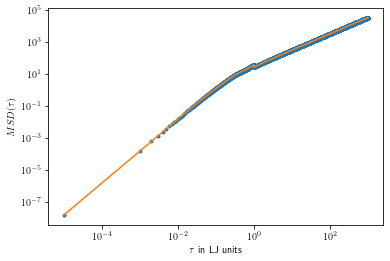

In [121]:
plt.loglog(t_steps,MSD_tau,".")
plt.loglog(t_steps,MSD_tau,"-")
plt.xlabel("$\\tau$ in LJ units")
plt.ylabel("$MSD(\\tau)$")

In [118]:
total_time_steps

100896.0